# Analyse du DataSet EdStats de la World Bank

## Import des modules

Ces différents modules sont nécessaires à l'analyse exploratoire menée dans le notebook

In [448]:
import pandas as pd
import missingno as ms
import numpy as np
import matplotlib.pyplot as plt

## Fichier EdStatsCountry.csv

Ce fichier renseigne à propos des pays présents dans l'étude de la World Bank

In [449]:
#chargement du fichier dans un dataframe pandas
df_country = pd.read_csv("EdStatsCountry.csv")

#affichage des entêtes de colonnes du df
df_country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [450]:
#taille du df
df_country.shape

(241, 32)

In [451]:
#affichage des 2 premières lignes
df_country.head(2)

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   

            IMF data dissemination standard  Latest population census  \
0                                       NaN                      2010   
1  General Data Dissemination System (GDDS)                      1979   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   

  Source of most recent Income and expenditure data  \
0                                               NaN   
1           Integrated household survey (IHS), 2008   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN              2012                          NaN   
1                    NaN              2012                         2000   

  Unnamed: 31  
0         NaN  
1         NaN  

[2 rows x 32 columns]

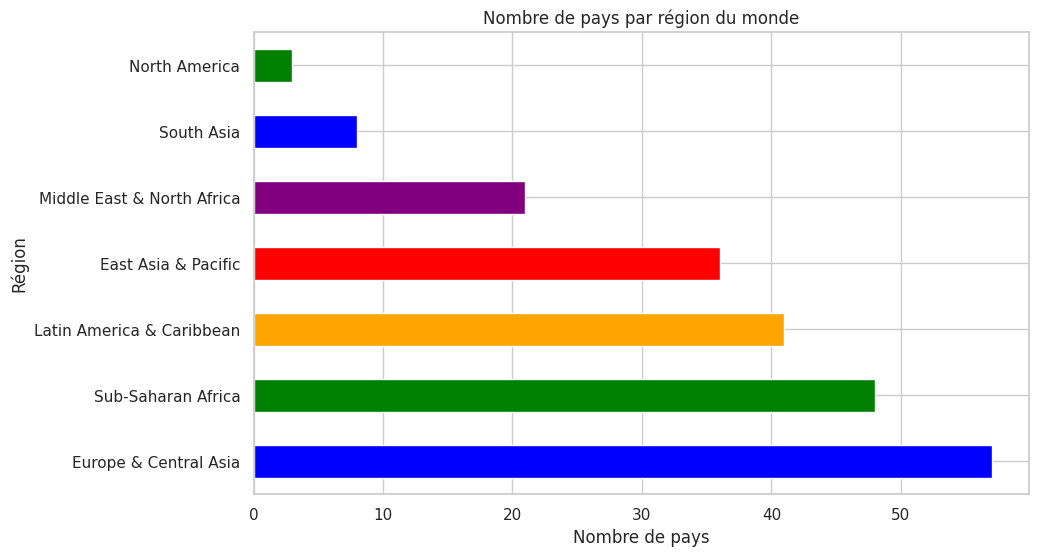

In [452]:
#identification des modalités et de leur effectif dans la colonne Region
region_counts = df_country.loc[:, 'Region'].value_counts()

#création du graphique en barres
plt.figure(figsize=(10, 6)) 

#utilisation de couleurs personnalisées pour chaque barre
colors = ['blue', 'green', 'orange', 'red', 'purple']

#tracé du diagramme en barres
region_counts.plot(kind='barh', color=colors)

#ajout de titres et d'étiquettes
plt.title('Nombre de pays par région du monde')
plt.ylabel('Région')
plt.xlabel('Nombre de pays')

#affichage du graphique
plt.show()

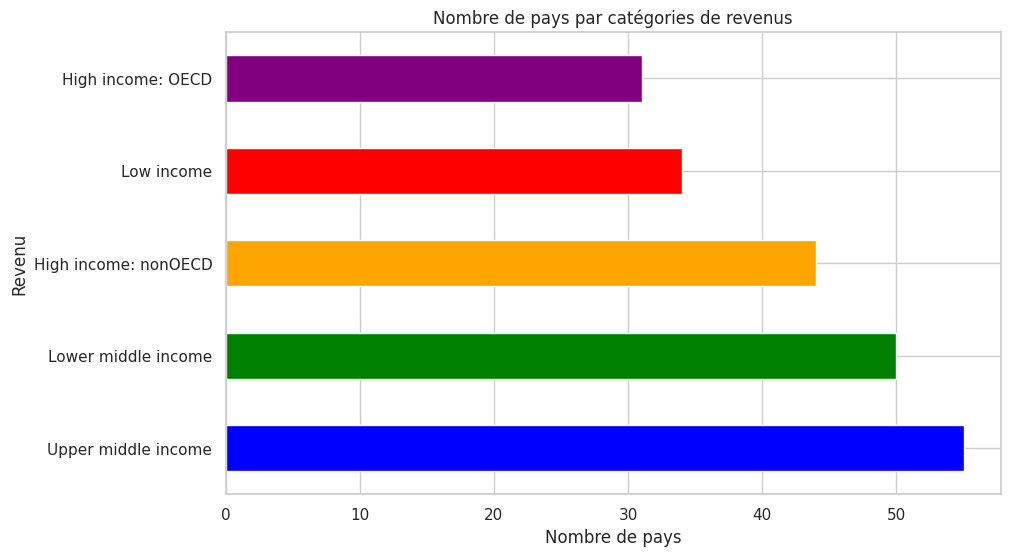

In [453]:
#identification des modalités et de leur effectif dans la colonne Income Group (Groupe de revenu)
income_counts = df_country['Income Group'].value_counts()

#création du graphique en barres
plt.figure(figsize=(10, 6)) 

#utilisation de couleurs personnalisées pour chaque barre
colors = ['blue', 'green', 'orange', 'red', 'purple']

#tracé du diagramme en barres
income_counts.plot(kind='barh', color=colors)

#ajout de titres et d'étiquettes
plt.title('Nombre de pays par catégories de revenus')
plt.ylabel('Revenu')
plt.xlabel('Nombre de pays')

#affichage du graphique
plt.show()

## Fichier EdStatsSeries.csv

Ce fichier renseigne à propos des séries de données présentes dans l'étude de la World Bank

In [454]:
#chargement du fichier dans un dataframe pandas
df_series = pd.read_csv('EdStatsSeries.csv')

#structure (nb lignes, nb colonnes) du df
df_series.shape

(3665, 21)

In [455]:
#affichage des 2 premières lignes du df
df_series.head(2)

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  

[2 rows x 21 columns]

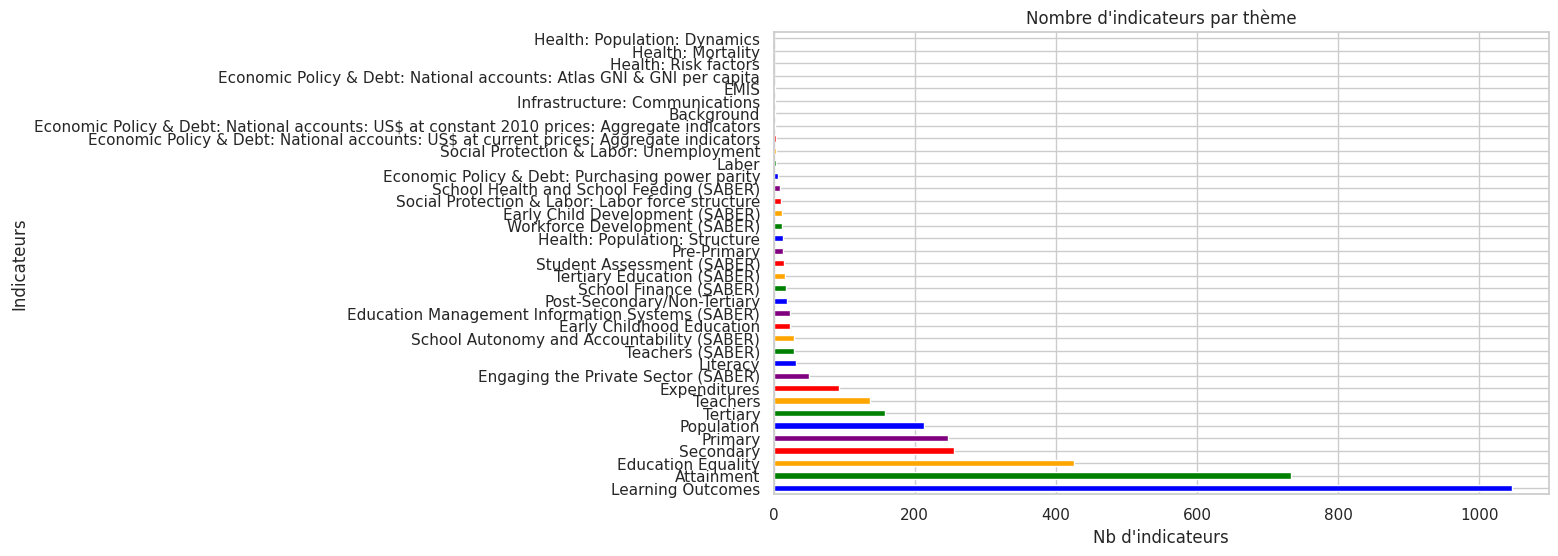

In [456]:
#identification des modalités et de leur effectif dans la colonne Topic (thème)
topic_counts = df_series['Topic'].value_counts()

#création du graphique en barres
plt.figure(figsize=(10, 6))  

#utilisation de couleurs personnalisées pour chaque barre
colors = ['blue', 'green', 'orange', 'red', 'purple']

#tracé du diagramme en barres
topic_counts.plot(kind='barh', color=colors)

#ajout de titres et d'étiquettes
plt.title("Nombre d'indicateurs par thème")
plt.xlabel("Nb d'indicateurs")
plt.ylabel('Indicateurs')

#affichage du graphique
plt.show()

## Fichier EdStatsCountry-Series.csv

Ce fichier donne des précisions supplémentaires quant à un indicateur pour un pays spécifique

In [457]:
#chargement du fichier dans un dataframe pandas
df_country_series = pd.read_csv('EdStatsCountry-Series.csv')

#entêtes de colonnes du df
df_country_series.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

In [458]:
#structure du df
df_country_series.shape

(613, 4)

In [459]:
#lignes concernant la France
df_country_series[df_country_series['CountryCode'] == 'FRA']

CountryCode         SeriesCode  \
166         FRA        SP.POP.GROW   
167         FRA  SP.POP.TOTL.MA.ZS   
168         FRA  SP.POP.TOTL.FE.ZS   
169         FRA        SP.POP.TOTL   
170         FRA  SP.POP.0014.TO.ZS   
171         FRA  SP.POP.1564.TO.ZS   

                                           DESCRIPTION  Unnamed: 3  
166  Data sources: Eurostat, United Nations World P...         NaN  
167  Including the four French overseas departments...         NaN  
168  Including the four French overseas departments...         NaN  
169  Data sources : Eurostat, United Nations World ...         NaN  
170  Including the four French overseas departments...         NaN  
171  Including the four French overseas departments...         NaN

Par exemple, on voit ci dessus que pour la France, le fichier EdStatsCountrySeries.csv renseigne une précision pour 6 indicateurs seulement. 

## Fichier EdStatsFootnotes.csv

Ce fichier donne des précisions supplémentaires quant à un pays pour un indicateur spécifique

In [460]:
#chargement du fichier dans un dataframe pandas
df_footnote = pd.read_csv('EdStatsFootNote.csv')

#affichage des entêtes de colonnes du df
df_footnote.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [461]:
#structure du df
df_footnote.shape

(643638, 5)

In [462]:
#affichage des 2 premières lignes du df
df_footnote.head(2)

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN

In [463]:
#transformation des valeurs de la colonne Year (string YR2003 => integer 2003, ou bien string yr2003 => integer 2003) 
df_footnote['Year'] = df_footnote['Year'].str.replace(r'(?i)yr', '', regex=True).astype(int)

#affichage du df
df_footnote

CountryCode      SeriesCode  Year  \
0              ABW  SE.PRE.ENRL.FE  2001   
1              ABW  SE.TER.TCHR.FE  2005   
2              ABW  SE.PRE.TCHR.FE  2000   
3              ABW  SE.SEC.ENRL.GC  2004   
4              ABW     SE.PRE.TCHR  2006   
...            ...             ...   ...   
643633         ZWE     SH.DYN.MORT  2007   
643634         ZWE     SH.DYN.MORT  2014   
643635         ZWE     SH.DYN.MORT  2015   
643636         ZWE     SH.DYN.MORT  2017   
643637         ZWE     SP.POP.GROW  2017   

                                   DESCRIPTION  Unnamed: 4  
0                          Country estimation.         NaN  
1                          Country estimation.         NaN  
2                          Country estimation.         NaN  
3                          Country estimation.         NaN  
4                          Country estimation.         NaN  
...                                        ...         ...  
643633       Uncertainty bound is 91.6 - 109.3         NaN  
643634          Uncertainty bound is 54.3 - 76         NaN  
643635        Uncertainty bound is 48.3 - 73.3         NaN  
643636  5-year average value between 0s and 5s         NaN  
643637  5-year average value between 0s and 5s         NaN  

[643638 rows x 5 columns]

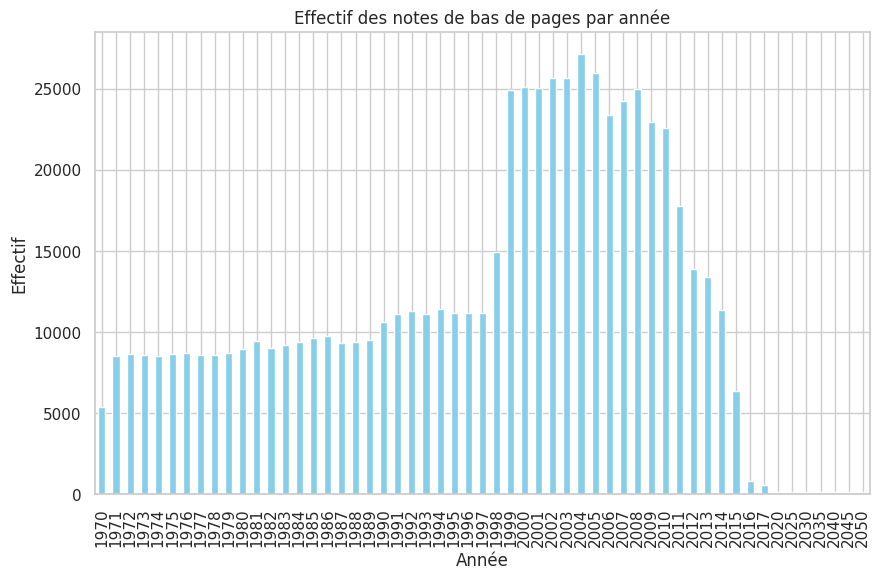

In [464]:
#décompte des effectifs de chaque valeurs dans la colonne Year
effectif_par_annee = df_footnote['Year'].value_counts()

#création du graphique en barres
plt.figure(figsize=(10, 6))

#tracé du diagramme en barres
effectif_par_annee.sort_index().plot(kind='bar', color='skyblue')

#ajout de titres et d'étiquettes
plt.title("Effectif des notes de bas de pages par année")
plt.xlabel('Année')
plt.ylabel('Effectif')

#affichage du graphique
plt.show()

## Fichier EdStatsData.csv

Le fichier suivant est le plus fourni des fichiers csv à notre disposition. 
C'est lui qui va nécessiter le travail le plus en profondeur. 
Nous allons aborder l'étude selon deux stratégies. 

### Stratégie 1

Etude des données par années

In [465]:
#chargement du fichier dans un dataframe pandas
df_data = pd.read_csv('EdStatsData.csv')

#structure du df
df_data.shape

(886930, 70)

<Axes: >

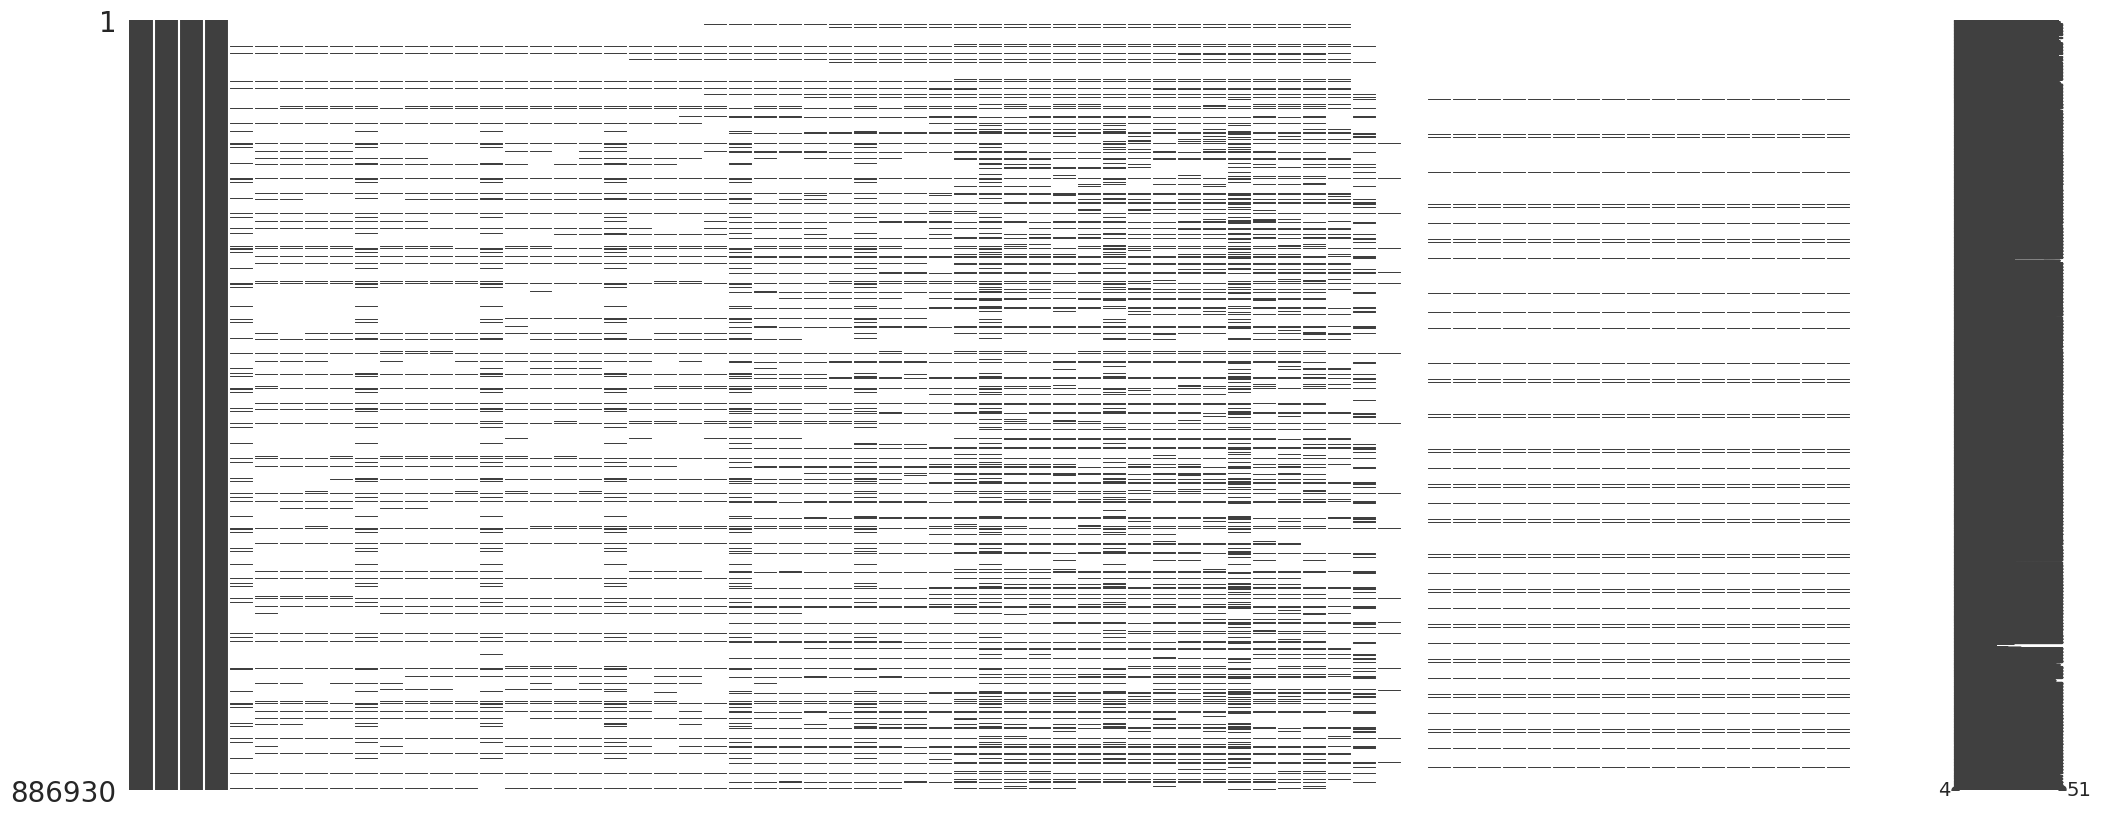

In [466]:
#création d'une matrice missingno pour visualiser les données présentes
ms.matrix(df_data)

il semble que des colonnes soient quasiment vides, vérifions le

In [467]:
df_data.head(2)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   

                                      Indicator Name Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...   UIS.NERA.2.F   NaN   

   1971  1972  1973  1974  1975  ...  2060  2065  2070  2075  2080  2085  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN          NaN  

[2 rows x 70 columns]

In [468]:
#compte du nombre de valeurs présentes par années
valeurs_par_annee = df_data.loc[:, '1970':'2100'].notna().sum(axis = 0)
for annee, nb_valeur in valeurs_par_annee.items():
    print (f"A propos de l'année {annee}, le df comporte {nb_valeur} valeurs")

A propos de l'année 1970, le df comporte 72288 valeurs
A propos de l'année 1971, le df comporte 35537 valeurs
A propos de l'année 1972, le df comporte 35619 valeurs
A propos de l'année 1973, le df comporte 35545 valeurs
A propos de l'année 1974, le df comporte 35730 valeurs
A propos de l'année 1975, le df comporte 87306 valeurs
A propos de l'année 1976, le df comporte 37483 valeurs
A propos de l'année 1977, le df comporte 37574 valeurs
A propos de l'année 1978, le df comporte 37576 valeurs
A propos de l'année 1979, le df comporte 36809 valeurs
A propos de l'année 1980, le df comporte 89122 valeurs
A propos de l'année 1981, le df comporte 38777 valeurs
A propos de l'année 1982, le df comporte 37511 valeurs
A propos de l'année 1983, le df comporte 38460 valeurs
A propos de l'année 1984, le df comporte 38606 valeurs
A propos de l'année 1985, le df comporte 90296 valeurs
A propos de l'année 1986, le df comporte 39372 valeurs
A propos de l'année 1987, le df comporte 38641 valeurs
A propos d

#### Graphique du nombre de valeurs selon l'année

Text(0, 0.5, 'Nombre de valeurs dans la colonne')

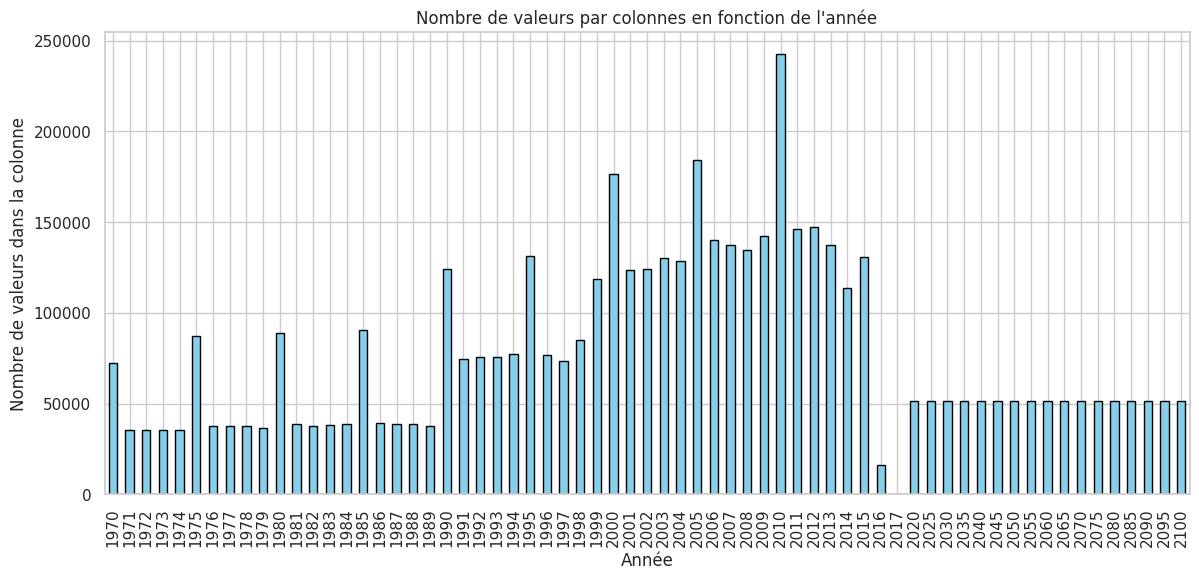

In [469]:
#régler la largeur
plt.figure(figsize=(14, 6))

#création du graphique en barres
valeurs_par_annee.plot.bar(color='skyblue', edgecolor='black')

plt.title("Nombre de valeurs par colonnes en fonction de l'année")
plt.xlabel('Année')
plt.ylabel('Nombre de valeurs dans la colonne')

In [470]:
df_data.shape

(886930, 70)

#### Exploration par ligne

In [471]:
#creation d'une serie qui compte les lignes sans données dans les colonnes de 1970 à 2100
serie_empty_lines = df_data.loc[:, '1970':'2100'].notna().sum(axis=1)==0

#calcul du nombre de lignes vides
nb_empty_lines = serie_empty_lines.sum()

#calcul du nombre de ligne en tout
nb_lines = df_data.shape[0]

#affichage de l'information
print(f"il y a {nb_empty_lines} lignes sans aucune donnée sur un total de {nb_lines}")

il y a 529525 lignes sans aucune donnée sur un total de 886930


#### Suppression des lignes sans données

<Axes: >

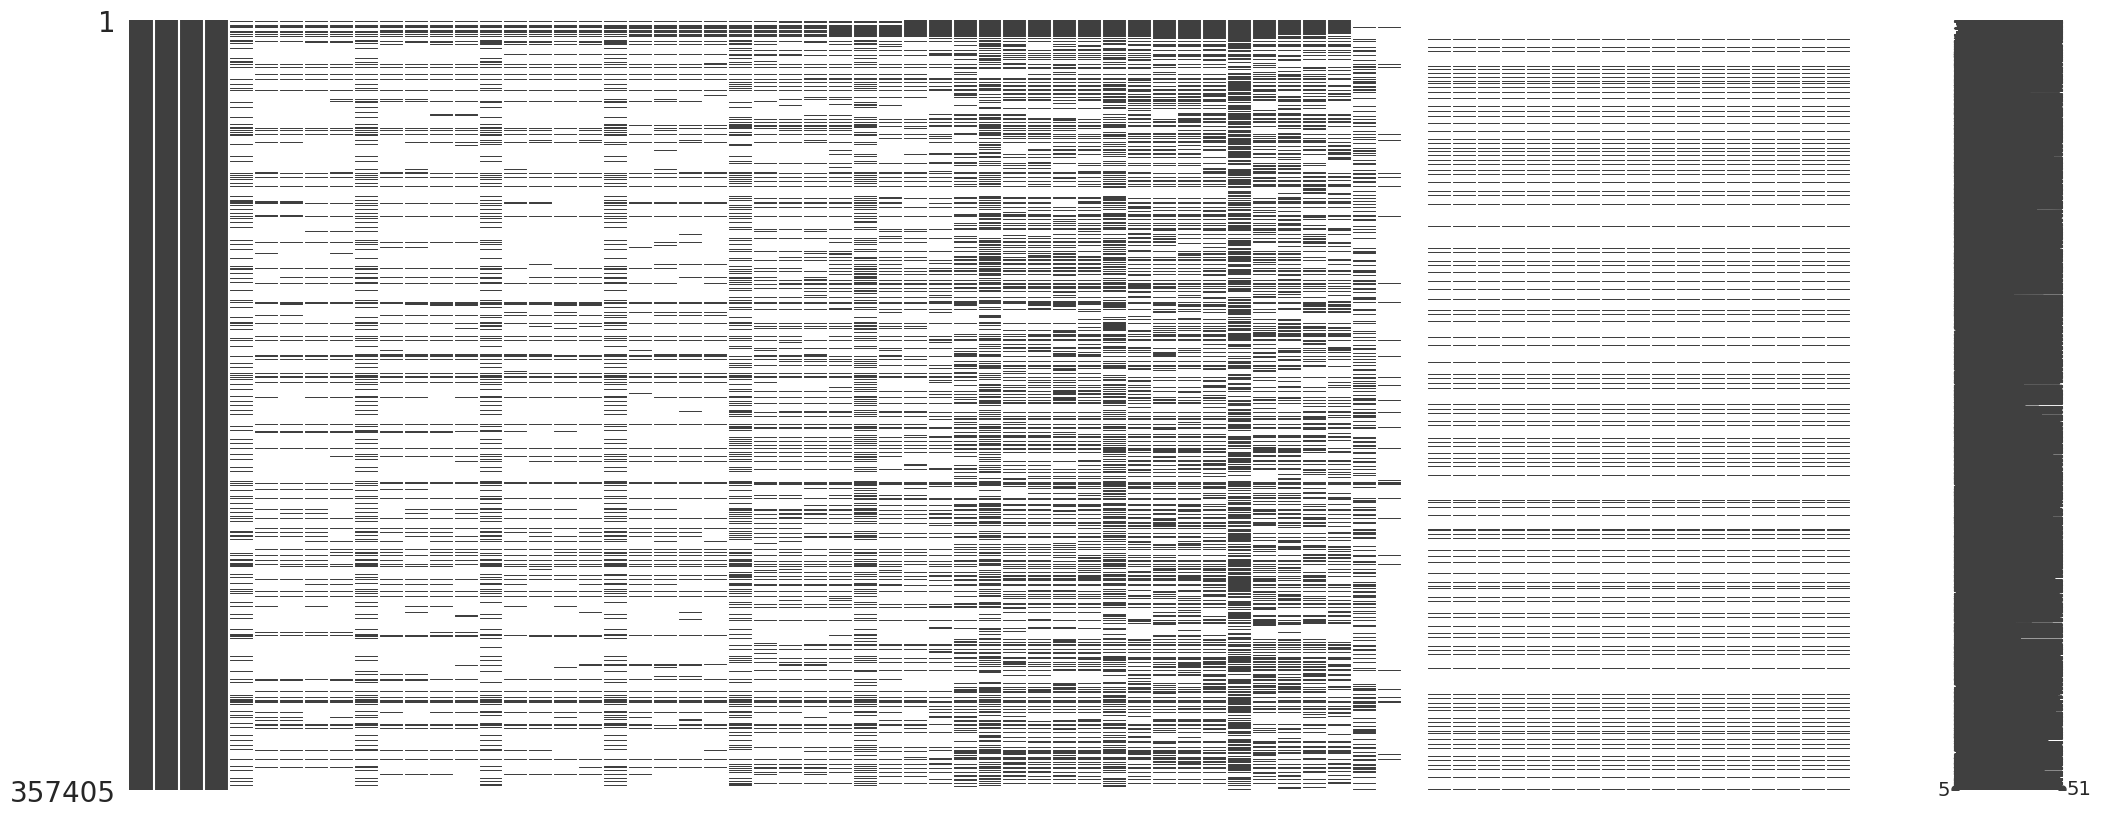

In [472]:
#reaffectation de df_data sans ses lignes vides
df_data = df_data.loc[~serie_empty_lines, :]

#affichage du schéma du df
ms.matrix(df_data)

#### Regroupement par plage quinquennale

Il semble que des périodes de 5 ans ressortent, regroupons les données dans des plages quinquennales

In [473]:
#création d'une liste de listes pour les années de 1970 à 2014
listes_periodes = []

for annee in range(1970, 2015, 5):
    periode = [str(annee + i) for i in range(5)]
    listes_periodes.append(periode)

print(listes_periodes)

[['1970', '1971', '1972', '1973', '1974'], ['1975', '1976', '1977', '1978', '1979'], ['1980', '1981', '1982', '1983', '1984'], ['1985', '1986', '1987', '1988', '1989'], ['1990', '1991', '1992', '1993', '1994'], ['1995', '1996', '1997', '1998', '1999'], ['2000', '2001', '2002', '2003', '2004'], ['2005', '2006', '2007', '2008', '2009'], ['2010', '2011', '2012', '2013', '2014']]


In [474]:
#moyennage des valeurs sur période quinquenale
#suppression des colonnes moyennées
for periode in listes_periodes :
    df_data[periode[0]] = df_data[periode].mean(axis=1)
    df_data.drop([periode[i] for i in range(1, 5)], axis = 1, inplace = True)


In [475]:
#traitement des colonnes résiduelles
df_data['2015'] = df_data[['2015', '2016', '2017']].mean(axis=1)
df_data.drop(['2016', '2017'], axis = 1, inplace = True)

In [476]:
#affichage des nouvelles données moyennnées
valeurs_par_annee = df_data.loc[:, '1970':'2100'].notna().sum(axis = 0)
for annee, nb_valeur in valeurs_par_annee.items():
    print (f"A propos de la période de 5 ans commençant par l'année  {annee}, le df comporte {nb_valeur} valeurs")

A propos de la période de 5 ans commençant par l'année  1970, le df comporte 95674 valeurs
A propos de la période de 5 ans commençant par l'année  1975, le df comporte 98057 valeurs
A propos de la période de 5 ans commençant par l'année  1980, le df comporte 100268 valeurs
A propos de la période de 5 ans commençant par l'année  1985, le df comporte 100656 valeurs
A propos de la période de 5 ans commençant par l'année  1990, le df comporte 144921 valeurs
A propos de la période de 5 ans commençant par l'année  1995, le df comporte 187266 valeurs
A propos de la période de 5 ans commençant par l'année  2000, le df comporte 219368 valeurs
A propos de la période de 5 ans commençant par l'année  2005, le df comporte 243362 valeurs
A propos de la période de 5 ans commençant par l'année  2010, le df comporte 309605 valeurs
A propos de la période de 5 ans commençant par l'année  2015, le df comporte 132987 valeurs
A propos de la période de 5 ans commençant par l'année  2020, le df comporte 51436

Text(0, 0.5, 'Nombre de valeurs dans la colonne')

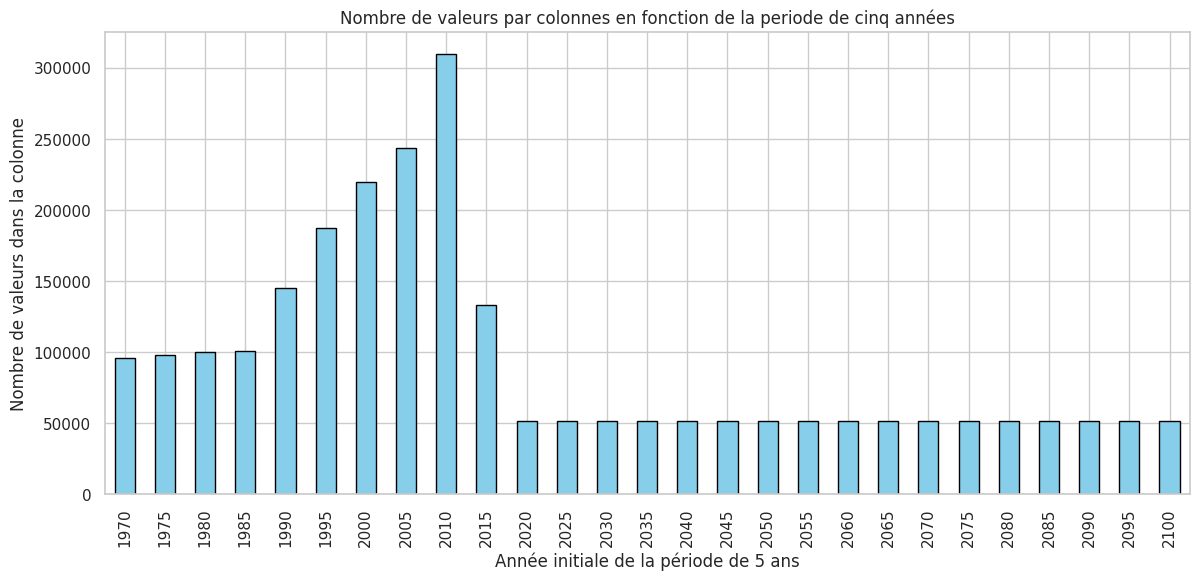

In [477]:
#réglage de la taille du graph
plt.figure(figsize=(14, 6))  

#création du graphique en barres
valeurs_par_annee.plot.bar(color='skyblue', edgecolor='black')

plt.title("Nombre de valeurs par colonnes en fonction de la periode de cinq années")
plt.xlabel('Année initiale de la période de 5 ans')
plt.ylabel('Nombre de valeurs dans la colonne')

### Stratégie 2

Etude des indicateurs par les données fournies

In [478]:
#chargement du fichier dans un dataframe pandas
df_data = pd.read_csv('EdStatsData.csv')

#structure du df
df_data.shape

(886930, 70)

In [479]:
df_data.head(2)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   

                                      Indicator Name Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...   UIS.NERA.2.F   NaN   

   1971  1972  1973  1974  1975  ...  2060  2065  2070  2075  2080  2085  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN          NaN  

[2 rows x 70 columns]

In [480]:
#affichage des informations
for colonne in df_data.columns:
    print(f"Dans la colonne {colonne}, il y a {df_data.loc[:, colonne].notna().sum()} valeurs présentes")

Dans la colonne Country Name, il y a 886930 valeurs présentes
Dans la colonne Country Code, il y a 886930 valeurs présentes
Dans la colonne Indicator Name, il y a 886930 valeurs présentes
Dans la colonne Indicator Code, il y a 886930 valeurs présentes
Dans la colonne 1970, il y a 72288 valeurs présentes
Dans la colonne 1971, il y a 35537 valeurs présentes
Dans la colonne 1972, il y a 35619 valeurs présentes
Dans la colonne 1973, il y a 35545 valeurs présentes
Dans la colonne 1974, il y a 35730 valeurs présentes
Dans la colonne 1975, il y a 87306 valeurs présentes
Dans la colonne 1976, il y a 37483 valeurs présentes
Dans la colonne 1977, il y a 37574 valeurs présentes
Dans la colonne 1978, il y a 37576 valeurs présentes
Dans la colonne 1979, il y a 36809 valeurs présentes
Dans la colonne 1980, il y a 89122 valeurs présentes
Dans la colonne 1981, il y a 38777 valeurs présentes
Dans la colonne 1982, il y a 37511 valeurs présentes
Dans la colonne 1983, il y a 38460 valeurs présentes
Dans l

In [481]:
#suppression des colonnes Unnamed: 69 et 2017
df_data.drop('Unnamed: 69', axis = 1, inplace = True)
df_data.drop('2017', axis = 1, inplace = True)
df_data.head(2)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   

                                      Indicator Name Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...   UIS.NERA.2.F   NaN   

   1971  1972  1973  1974  1975  ...  2055  2060  2065  2070  2075  2080  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2085  2090  2095  2100  
0   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN  

[2 rows x 68 columns]

In [482]:
#creation d'une serie qui contient true si les colonnes de 1970 à 2100 sont vides
filtre_ligne_vide = df_data.loc[:, '1970': '2100'].isna().sum(axis=1)==64

#suppression des lignes vides en utilisant le filtre
df_data = df_data[~filtre_ligne_vide] 

#désormais le dataframe ne contient plus de lignes vides

In [483]:
#compte du nombre de valeurs renseignées par ligne
serie_nombre_valeurs = df_data.loc[:, '1970' : '2100'].notna().sum(axis = 1).rename('Nb Valeurs')

df_pays_indic = df_data.loc[:, ['Country Code', 'Indicator Code']]

df = pd.concat([df_pays_indic, serie_nombre_valeurs], axis = 1)

df.head(2)

Country Code  Indicator Code  Nb Valeurs
4          ARB     SE.PRM.TENR          45
5          ARB  SE.PRM.TENR.FE          45

In [484]:
#calcul du nombre de pays par indicateur
Nb_pays_indic = df.groupby('Indicator Code')['Country Code'].nunique().rename('Nb de pays')

#calcul de la moyenne du nombre de valeurs par indicateur
Nb_moyen_valeur_indic = df.groupby('Indicator Code')['Nb Valeurs'].mean().rename('Nb de valeurs')


In [485]:
#affichage de la panda series résultante (nombre de pays par indicateurs)
Nb_pays_indic.tail(5)

Indicator Code
UIS.XUNIT.USCONST.3.FSGOV      127
UIS.XUNIT.USCONST.4.FSGOV       83
UIS.XUNIT.USCONST.56.FSGOV     147
XGDP.23.FSGOV.FDINSTADM.FFD    166
XGDP.56.FSGOV.FDINSTADM.FFD    164
Name: Nb de pays, dtype: int64

In [486]:
#affichage de la panda series résultante (nombre de valeurs - années - renseignées par indicateurs)
Nb_moyen_valeur_indic.tail(5)

Indicator Code
UIS.XUNIT.USCONST.3.FSGOV     7
UIS.XUNIT.USCONST.4.FSGOV     6
UIS.XUNIT.USCONST.56.FSGOV    8
XGDP.23.FSGOV.FDINSTADM.FFD   7
XGDP.56.FSGOV.FDINSTADM.FFD   7
Name: Nb de valeurs, dtype: float64

In [487]:
#concaténation des deux series précédentes
df_resultat = pd.concat([Nb_pays_indic, Nb_moyen_valeur_indic], axis=1)
df_resultat.describe()

Nb de pays  Nb de valeurs
count        3648           3648
mean           98              8
std            75              9
min             1              1
25%            19              1
50%            77              4
75%           167             13
max           240             47

In [488]:
#affichage du df résultant (nb de pays et nb de valeurs renseignées selon indicateurs)
df_resultat

Nb de pays  Nb de valeurs
Indicator Code                                        
BAR.NOED.1519.FE.ZS                 144              9
BAR.NOED.1519.ZS                    144              9
BAR.NOED.15UP.FE.ZS                 144              9
BAR.NOED.15UP.ZS                    144              9
BAR.NOED.2024.FE.ZS                 144              9
...                                 ...            ...
UIS.XUNIT.USCONST.3.FSGOV           127              7
UIS.XUNIT.USCONST.4.FSGOV            83              6
UIS.XUNIT.USCONST.56.FSGOV          147              8
XGDP.23.FSGOV.FDINSTADM.FFD         166              7
XGDP.56.FSGOV.FDINSTADM.FFD         164              7

[3648 rows x 2 columns]

In [489]:
#migration de la colonne des index vers une colonne indépendante et réindexation du df
df_resultat = df_resultat.reset_index()

#affichage du df (désormais sur 3 colonnes avec indexation numérique croissante)
df_resultat

Indicator Code  Nb de pays  Nb de valeurs
0             BAR.NOED.1519.FE.ZS         144              9
1                BAR.NOED.1519.ZS         144              9
2             BAR.NOED.15UP.FE.ZS         144              9
3                BAR.NOED.15UP.ZS         144              9
4             BAR.NOED.2024.FE.ZS         144              9
...                           ...         ...            ...
3643    UIS.XUNIT.USCONST.3.FSGOV         127              7
3644    UIS.XUNIT.USCONST.4.FSGOV          83              6
3645   UIS.XUNIT.USCONST.56.FSGOV         147              8
3646  XGDP.23.FSGOV.FDINSTADM.FFD         166              7
3647  XGDP.56.FSGOV.FDINSTADM.FFD         164              7

[3648 rows x 3 columns]

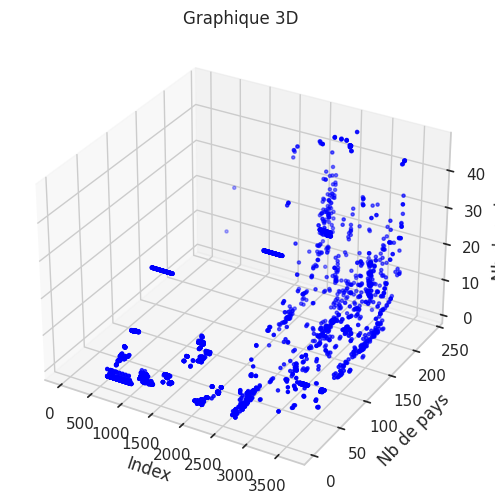

In [490]:
#copie df_resultat vers df pour tracé graph
df = df_resultat

#création de la figure et de l'axe 3D
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111, projection='3d')

#création du graphique en 3D
ax.scatter(range(len(df)), df['Nb de pays'], df['Nb de valeurs'], c='blue', marker='.')

#ajout des étiquettes
ax.set_xlabel('Index')
ax.set_ylabel('Nb de pays')
ax.set_zlabel('Nb de valeurs')
ax.set_title('Graphique 3D')


#affichage du graphique
plt.show()

**note** le graphique ci dessus est une tentative de visualisation non définitive. Plus loin viendront 2 graphiques exploitables

In [491]:
#affichage du df df pour vérification
df

Indicator Code  Nb de pays  Nb de valeurs
0             BAR.NOED.1519.FE.ZS         144              9
1                BAR.NOED.1519.ZS         144              9
2             BAR.NOED.15UP.FE.ZS         144              9
3                BAR.NOED.15UP.ZS         144              9
4             BAR.NOED.2024.FE.ZS         144              9
...                           ...         ...            ...
3643    UIS.XUNIT.USCONST.3.FSGOV         127              7
3644    UIS.XUNIT.USCONST.4.FSGOV          83              6
3645   UIS.XUNIT.USCONST.56.FSGOV         147              8
3646  XGDP.23.FSGOV.FDINSTADM.FFD         166              7
3647  XGDP.56.FSGOV.FDINSTADM.FFD         164              7

[3648 rows x 3 columns]

In [492]:
#description rapide
df['Nb de valeurs'].describe()

count   3648
mean       8
std        9
min        1
25%        1
50%        4
75%       13
max       47
Name: Nb de valeurs, dtype: float64

In [493]:
#description rapide
df['Nb de pays'].describe()

count   3648
mean      98
std       75
min        1
25%       19
50%       77
75%      167
max      240
Name: Nb de pays, dtype: float64

In [494]:
#réaffichage pour vérification
df_resultat

Indicator Code  Nb de pays  Nb de valeurs
0             BAR.NOED.1519.FE.ZS         144              9
1                BAR.NOED.1519.ZS         144              9
2             BAR.NOED.15UP.FE.ZS         144              9
3                BAR.NOED.15UP.ZS         144              9
4             BAR.NOED.2024.FE.ZS         144              9
...                           ...         ...            ...
3643    UIS.XUNIT.USCONST.3.FSGOV         127              7
3644    UIS.XUNIT.USCONST.4.FSGOV          83              6
3645   UIS.XUNIT.USCONST.56.FSGOV         147              8
3646  XGDP.23.FSGOV.FDINSTADM.FFD         166              7
3647  XGDP.56.FSGOV.FDINSTADM.FFD         164              7

[3648 rows x 3 columns]

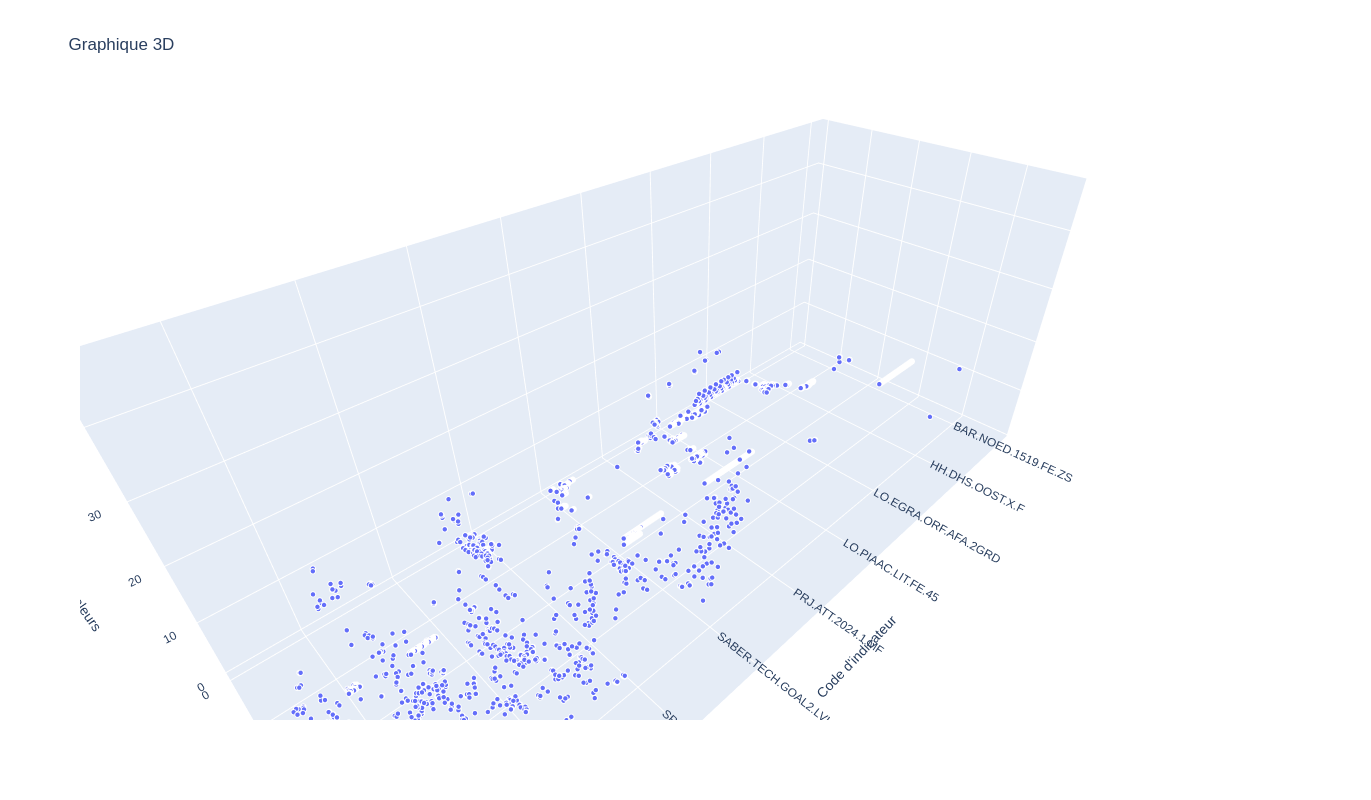

In [495]:
import plotly.express as px

#réaffectation
df = df_resultat

#taille constante des points
constant_size = 1  

#tracé du graphique 3D
fig = px.scatter_3d(df, x='Indicator Code', y='Nb de pays', z='Nb de valeurs', size_max = 5,
                    title='Graphique 3D',
                    labels={'Indicator Code': 'Code d\'indicateur', 'Nb de pays': 'Nombre de pays', 'Nb de valeurs': 'Nombre de valeurs'},
                    size=[constant_size]*len(df), 
                    opacity=1)  

#ajustement de la taille du graphique
fig.update_layout(height=800, width=1000, scene=dict(aspectmode='manual', aspectratio=dict(x=2.5, y=1, z=1)))

#affichage du graphique
fig.show()


**note** le graphique ci dessus est une tentative de visualisation non définitive. Plus loin viendront 2 graphiques exploitables

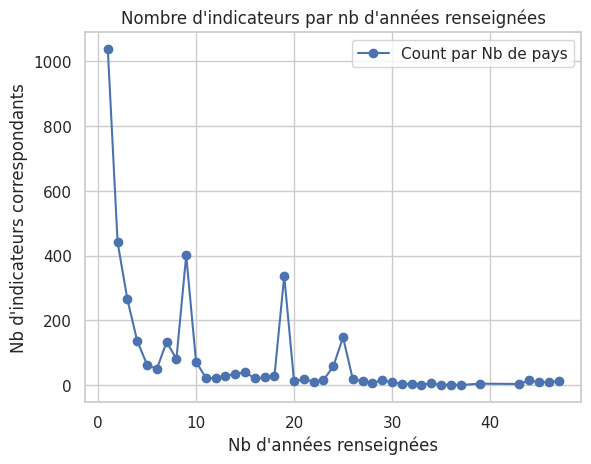

In [496]:
df = df_resultat.loc[:, 'Nb de valeurs'].round().value_counts().reset_index().sort_values('Nb de valeurs')


#créer un graphique
plt.plot(df['Nb de valeurs'], df['count'], marker='o', linestyle='-', color='b', label='Count par Nb de pays')

#ajouter des étiquettes
plt.title("Nombre d'indicateurs par nb d'années renseignées")
plt.xlabel("Nb d'années renseignées")
plt.ylabel("Nb d'indicateurs correspondants")
plt.legend()

#afficher le graphique
plt.show()

nous voyons ici que de nombreux indicateurs renseignent sur moins de 5 années, sur 9 années, sur 19 années ..
 - **je propose de ne tenir compte que des indicateurs qui renseignent sur plus de 4 années.** 

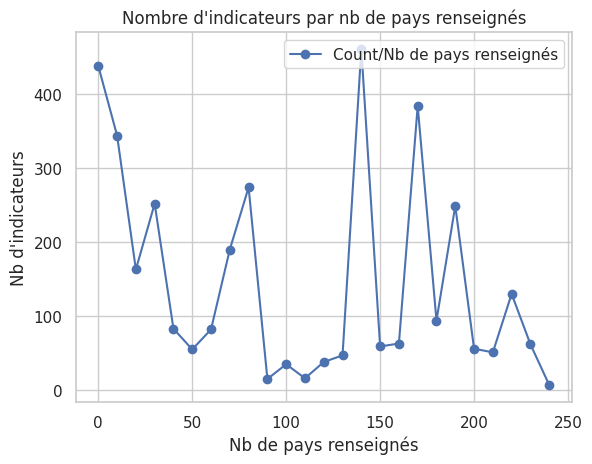

In [497]:
df = ((df_resultat.loc[:, 'Nb de pays']/10).round()*10).value_counts().reset_index().sort_values('Nb de pays')


#créer un graphique
plt.plot(df['Nb de pays'], df['count'], marker='o', linestyle='-', color='b', label='Count/Nb de pays renseignés')

#ajouter des étiquettes
plt.title("Nombre d'indicateurs par nb de pays renseignés")
plt.xlabel("Nb de pays renseignés")
plt.ylabel("Nb d'indicateurs")
plt.legend()

#afficher le graphique
plt.show()

Nous voyons ici que de nombreux indicateurs renseignent à propos d'un peu plus d'une centaine de pays. 
 - **Je propose de n'accepter que des indicateurs qui renseignent à propos de plus de 125 pays.**

## Filtrage des indicateurs

In [498]:
#condition de filtrage
condition = (df_resultat['Nb de pays'] > 125) & (df_resultat['Nb de valeurs'] > 4)

#appliquer le filtre avec loc
df_resultat_filtered = df_resultat.loc[condition]

#afficher le DataFrame résultant
df_resultat_filtered

Indicator Code  Nb de pays  Nb de valeurs
0             BAR.NOED.1519.FE.ZS         144              9
1                BAR.NOED.1519.ZS         144              9
2             BAR.NOED.15UP.FE.ZS         144              9
3                BAR.NOED.15UP.ZS         144              9
4             BAR.NOED.2024.FE.ZS         144              9
...                           ...         ...            ...
3642   UIS.XUNIT.USCONST.23.FSGOV         148              8
3643    UIS.XUNIT.USCONST.3.FSGOV         127              7
3645   UIS.XUNIT.USCONST.56.FSGOV         147              8
3646  XGDP.23.FSGOV.FDINSTADM.FFD         166              7
3647  XGDP.56.FSGOV.FDINSTADM.FFD         164              7

[1649 rows x 3 columns]

Nous avons ci dessus un df intitulé **df_resultat_filtered** 

Ce df contient des **Indicator Code** qui respectent les critères énoncés précedemment. 

Récupérons les valeurs **Indicator Name** dans le **df_data** pour procéder à une analyse sémantique des termes 

In [499]:
#utiliser isin() pour filtrer les valeurs
df_data_filtered = df_data[df_data['Indicator Code'].isin(df_resultat_filtered['Indicator Code'])]

#afficher le DataFrame résultant
for nom in df_data_filtered['Indicator Name'].unique():
    print(nom)

print(type(df_data_filtered['Indicator Name'].unique()))

Adjusted net enrolment rate, primary, both sexes (%)
Adjusted net enrolment rate, primary, female (%)
Adjusted net enrolment rate, primary, gender parity index (GPI)
Adjusted net enrolment rate, primary, male (%)
Adjusted net intake rate to Grade 1 of primary education, both sexes (%)
Adjusted net intake rate to Grade 1 of primary education, female (%)
Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)
Adjusted net intake rate to Grade 1 of primary education, male (%)
Adult illiterate population, 15+ years, % female
Adult illiterate population, 15+ years, both sexes (number)
Adult illiterate population, 15+ years, female (number)
Adult illiterate population, 15+ years, male (number)
Adult literacy rate, population 15+ years, both sexes (%)
Adult literacy rate, population 15+ years, female (%)
Adult literacy rate, population 15+ years, gender parity index (GPI)
Adult literacy rate, population 15+ years, male (%)
Cumulative drop-out rate to the last grade

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alexandre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


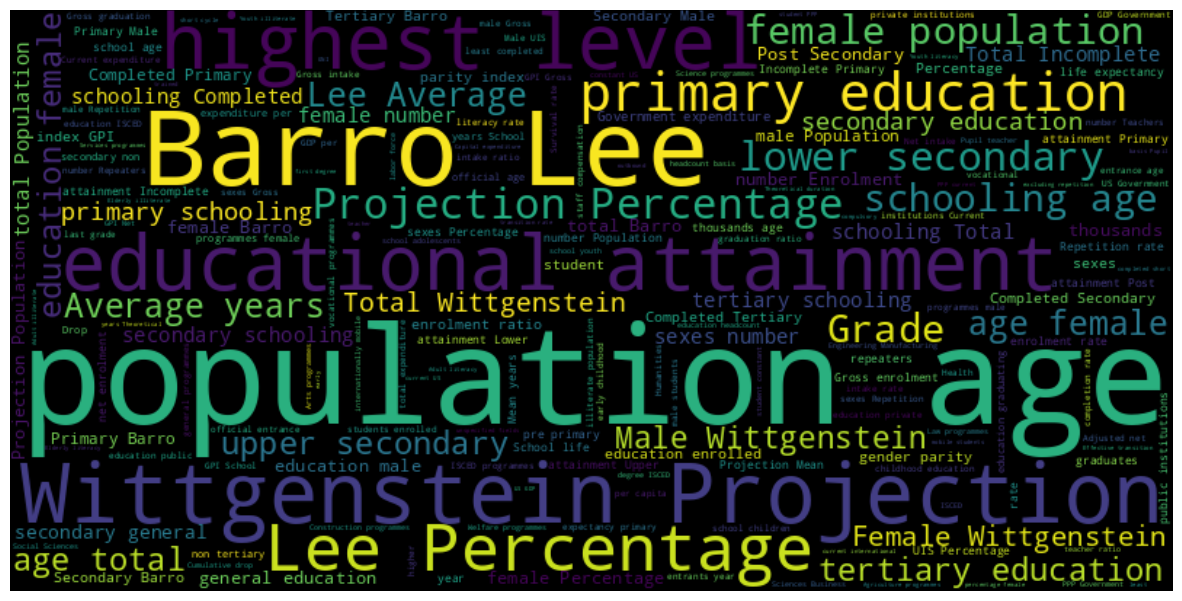

In [500]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk

#téléchargement des données nécessaires
nltk.download('stopwords')

#conversion du ndarray en liste
phrases = df_data_filtered['Indicator Name'].unique().tolist()  

#concaténation des phrases en un seul texte
texte_complet = ' '.join(phrases)

#création du nuage de mots
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(texte_complet)

#affichage du nuage de mots
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [501]:
df_data_filtered.head(2)

Country Name Country Code  \
4   Arab World          ARB   
5   Arab World          ARB   

                                      Indicator Name  Indicator Code  1970  \
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR    55   
5   Adjusted net enrolment rate, primary, female (%)  SE.PRM.TENR.FE    43   

   1971  1972  1973  1974  1975  ...  2055  2060  2065  2070  2075  2080  \
4    55    56    57    58    59  ...   NaN   NaN   NaN   NaN   NaN   NaN   
5    43    45    46    46    48  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2085  2090  2095  2100  
4   NaN   NaN   NaN   NaN  
5   NaN   NaN   NaN   NaN  

[2 rows x 68 columns]

In [502]:
selection_indicateurs = df_data_filtered.loc[:, ['Indicator Name', 'Indicator Code']].drop_duplicates()

In [503]:
selection_indicateurs = selection_indicateurs.reset_index(drop = True)

In [504]:
print(f"nombre d'indicateurs sélectionnés : {len(selection_indicateurs)} ")

nombre d'indicateurs sélectionnés : 1649 


## conclusion intermédiaire

Nous avons sélectionnés 1649 indicateurs selon les critères suivants : 

 - Chaque indicateur renseigne sur au moins 4 années
 - Chaque indicateur renseigne à propos de 125 pays

Ces indicateurs se trouvent dans la variable **selection_indicateurs**

In [505]:
for indicateur in selection_indicateurs['Indicator Name']:
    print(indicateur)

Adjusted net enrolment rate, primary, both sexes (%)
Adjusted net enrolment rate, primary, female (%)
Adjusted net enrolment rate, primary, gender parity index (GPI)
Adjusted net enrolment rate, primary, male (%)
Adjusted net intake rate to Grade 1 of primary education, both sexes (%)
Adjusted net intake rate to Grade 1 of primary education, female (%)
Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)
Adjusted net intake rate to Grade 1 of primary education, male (%)
Adult illiterate population, 15+ years, % female
Adult illiterate population, 15+ years, both sexes (number)
Adult illiterate population, 15+ years, female (number)
Adult illiterate population, 15+ years, male (number)
Adult literacy rate, population 15+ years, both sexes (%)
Adult literacy rate, population 15+ years, female (%)
Adult literacy rate, population 15+ years, gender parity index (GPI)
Adult literacy rate, population 15+ years, male (%)
Cumulative drop-out rate to the last grade

Choix initial d'indicateurs : 

GDP per capita;
Internet users (per 100 people);  
Personal computers (per 100 people);  
Population growth (annual %);  
Population of the official age for secondary education, both sexes (number);  
Population of the official age for tertiary education, both sexes (number);  
Population, total;  
Youth illiterate population, 15-24 years, both sexes (number);  
Youth literacy rate, population 15-24 years, both sexes (%);  
Barro-Lee: Average years of primary schooling, age 15-19, total;  
Barro-Lee: Average years of primary schooling, age 20-24, total;  
Barro-Lee: Percentage of population age 15-19 with primary schooling. Completed Primary;  
Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary;  
Barro-Lee: Percentage of population age 20-24 with primary schooling. Completed Primary;  
Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary;  
Barro-Lee: Population in thousands, age 15-19, total;  
Barro-Lee: Population in thousands, age 20-24, total;  
Current expenditure as % of total expenditure in primary public institutions (%);  
Current expenditure as % of total expenditure in public institutions (%);  
Current expenditure as % of total expenditure in secondary public institutions (%);  
Current expenditure as % of total expenditure in tertiary public institutions (%);  
Expenditure on education as % of total government expenditure (%);  
Capital expenditure as % of total expenditure in secondary public institutions (%);  
Population, ages 14-18, total;  
Government expenditure in educational institutions as % of GDP (%);  
Government expenditure per secondary student (constant US$);  
Government expenditure per tertiary student (PPP$');  
Percentage of graduates from tertiary education graduating from Engineering, Manufacturing and Construction programmes, both sexes (%);  
Percentage of graduates from tertiary education graduating from Science programmes, both sexes (%);


## Les indicateurs

In [506]:
#création d'une liste d'indicateurs selectionnés

liste_indicateurs = ["GDP per capita",
"Internet users (per 100 people)",
"Personal computers (per 100 people)",
"Population growth (annual %)",
"Population of the official age for secondary education, both sexes (number)",
"Population of the official age for tertiary education, both sexes (number)",
"Population, total",
"Youth illiterate population, 15-24 years, both sexes (number)",
"Youth literacy rate, population 15-24 years, both sexes (%)",
"Barro-Lee: Average years of primary schooling, age 15-19, total",
"Barro-Lee: Average years of primary schooling, age 20-24, total",
"Barro-Lee: Percentage of population age 15-19 with primary schooling. Completed Primary",
"Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary",
"Barro-Lee: Percentage of population age 20-24 with primary schooling. Completed Primary",
"Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary",
"Barro-Lee: Population in thousands, age 15-19, total",
"Barro-Lee: Population in thousands, age 20-24, total",
"Current expenditure as % of total expenditure in primary public institutions (%)",
"Current expenditure as % of total expenditure in public institutions (%)",
"Current expenditure as % of total expenditure in secondary public institutions (%)",
"Current expenditure as % of total expenditure in tertiary public institutions (%)",
"Expenditure on education as % of total government expenditure (%)",
"Capital expenditure as % of total expenditure in secondary public institutions (%)",
"Population, ages 14-18, total",
"Government expenditure in educational institutions as % of GDP (%)",
"Government expenditure per secondary student (constant US$)",
"Government expenditure per tertiary student (PPP$)",
"Percentage of graduates from tertiary education graduating from Engineering, Manufacturing and Construction programmes, both sexes (%)",
"Percentage of graduates from tertiary education graduating from Science programmes, both sexes (%)", 
"Population of the official age for secondary education, both sexes (number)",
"Population of the official age for tertiary education, both sexes (number)", 

]

##ajout "Population of the official age for secondary education, both sexes (number)",
## "Population of the official age for tertiary education, both sexes (number)", 


In [507]:
df_data_filtered

Country Name Country Code  \
4        Arab World          ARB   
5        Arab World          ARB   
6        Arab World          ARB   
7        Arab World          ARB   
12       Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
4       Adjusted net enrolment rate, primary, both sex...   
5        Adjusted net enrolment rate, primary, female (%)   
6       Adjusted net enrolment rate, primary, gender p...   
7          Adjusted net enrolment rate, primary, male (%)   
12      Adjusted net intake rate to Grade 1 of primary...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code  1970  1971  1972  1973  1974  1975  ...  2055  \
4                SE.PRM.TENR    55    55    56    57    58    59  ...   NaN   
5             SE.PRM.TENR.FE    43    43    45    46    46    48  ...   NaN   
6             UIS.NERA.1.GPI     1     1     1     1     1     1  ...   NaN   
7             SE.PRM.TENR.MA    66    66    67    68    69    70  ...   NaN   
12                UIS.NIRA.1    52    52    53    53    54    55  ...   NaN   
...                      ...   ...   ...   ...   ...   ...   ...  ...   ...   
886925      UIS.LP.AG15T24.M   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886926     SE.ADT.1524.LT.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886927  SE.ADT.1524.LT.FE.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886928  SE.ADT.1524.LT.FM.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886929  SE.ADT.1524.LT.MA.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

        2060  2065  2070  2075  2080  2085  2090  2095  2100  
4        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
7        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
12       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...      ...   ...   ...   ...   ...   ...   ...   ...   ...  
886925   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
886926   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
886927   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
886928   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
886929   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[284505 rows x 68 columns]

In [508]:
df_data_selection = df_data_filtered[df_data_filtered['Indicator Name'].isin(liste_indicateurs)]
valeurs_2005_2015 = df_data_selection.loc[:, '2005':'2015'].mean(axis = 1)

##modif '1995' en '2005' v2

df_indicateurs = df_data_selection.loc[:, 'Country Name' : 'Indicator Code']

df_indicateurs['Periode 2005 - 2015'] = valeurs_2005_2015

df_indicateurs

Country Name Country Code  \
1375     Arab World          ARB   
2084     Arab World          ARB   
2307     Arab World          ARB   
2323     Arab World          ARB   
2326     Arab World          ARB   
...             ...          ...   
885591     Zimbabwe          ZWE   
885741     Zimbabwe          ZWE   
885798     Zimbabwe          ZWE   
886923     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   

                                           Indicator Name     Indicator Code  \
1375                      Internet users (per 100 people)     IT.NET.USER.P2   
2084                  Personal computers (per 100 people)     IT.CMP.PCMP.P2   
2307                         Population growth (annual %)        SP.POP.GROW   
2323    Population of the official age for secondary e...     SP.SEC.TOTL.IN   
2326    Population of the official age for tertiary ed...     SP.TER.TOTL.IN   
...                                                   ...                ...   
885591  Population of the official age for tertiary ed...     SP.TER.TOTL.IN   
885741                      Population, ages 14-18, total  SP.POP.1418.TO.UN   
885798                                  Population, total        SP.POP.TOTL   
886923  Youth illiterate population, 15-24 years, both...     UIS.LP.AG15T24   
886926  Youth literacy rate, population 15-24 years, b...  SE.ADT.1524.LT.ZS   

        Periode 2005 - 2015  
1375                     23  
2084                      6  
2307                      2  
2323               43936205  
2326               34349314  
...                     ...  
885591              1586361  
885741              1703757  
885798             14199155  
886923               303360  
886926                   91  

[4789 rows x 5 columns]

In [509]:
print(df_indicateurs['Indicator Code'].value_counts())
print(df_indicateurs['Indicator Name'].value_counts())

Indicator Code
SP.POP.GROW                     240
SP.POP.TOTL                     240
IT.NET.USER.P2                  233
SP.TER.TOTL.IN                  227
SP.SEC.TOTL.IN                  226
IT.CMP.PCMP.P2                  218
SP.POP.1418.TO.UN               192
SE.ADT.1524.LT.ZS               184
SE.XPD.TOTL.GB.ZS               181
UIS.LP.AG15T24                  176
UIS.XGDP.FSGOV.FDINSTADM.FFD    170
SE.XPD.CUR.TOTL.ZS              166
UIS.XSPENDP.23.FDPUB.FNCUR      158
UIS.XSPENDP.1.FDPUB.FNCUR       156
UIS.XSPENDP.56.FDPUB.FNCUR      151
UIS.XUNIT.PPP.56.FSGOV          149
UIS.XUNIT.USCONST.23.FSGOV      148
UIS.XSPENDP.23.FDPUB.FNCAP      144
BAR.POP.1519                    144
BAR.POP.2024                    144
BAR.SEC.CMPT.2024.ZS            144
BAR.PRM.CMPT.2024.ZS            144
BAR.SEC.CMPT.1519.ZS            144
BAR.PRM.CMPT.1519.ZS            144
BAR.PRM.SCHL.2024               144
BAR.PRM.SCHL.1519               144
SE.TER.GRAD.EN.ZS               139
SE.TER.GRAD.S

In [510]:
df_indicateurs.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Periode 2005 - 2015'],
      dtype='object')

In [511]:
#création du nouveau DataFrame df_info
df_info = df_indicateurs.pivot(index='Country Name', columns='Indicator Name', values='Periode 2005 - 2015')
df_info_code = df_indicateurs.pivot(index='Country Name', columns='Indicator Code', values='Periode 2005 - 2015')

#réinitialisation de l'index pour avoir "Country Name" comme une colonne normale
df_info.reset_index(inplace=True)
df_info_code.reset_index(inplace=True)


#affichage du nouveau DataFrame
df_info_code

Indicator Code        Country Name  BAR.POP.1519  BAR.POP.2024  \
0                      Afghanistan          3502          2874   
1                          Albania           308           283   
2                          Algeria          3652          3688   
3                   American Samoa           NaN           NaN   
4                          Andorra           NaN           NaN   
..                             ...           ...           ...   
237             West Bank and Gaza           NaN           NaN   
238                          World           NaN           NaN   
239                    Yemen, Rep.          2642          2226   
240                         Zambia          1475          1252   
241                       Zimbabwe          1731          1616   

Indicator Code  BAR.PRM.CMPT.1519.ZS  BAR.PRM.CMPT.2024.ZS  BAR.PRM.SCHL.1519  \
0                                 17                    13                  3   
1                                  7                     2                  6   
2                                 38                    32                  5   
3                                NaN                   NaN                NaN   
4                                NaN                   NaN                NaN   
..                               ...                   ...                ...   
237                              NaN                   NaN                NaN   
238                              NaN                   NaN                NaN   
239                               18                    10                  4   
240                               28                    36                  6   
241                               33                    27                  7   

Indicator Code  BAR.PRM.SCHL.2024  BAR.SEC.CMPT.1519.ZS  BAR.SEC.CMPT.2024.ZS  \
0                               3                     9                    14   
1                               8                    28                    46   
2                               5                    17                    20   
3                             NaN                   NaN                   NaN   
4                             NaN                   NaN                   NaN   
..                            ...                   ...                   ...   
237                           NaN                   NaN                   NaN   
238                           NaN                   NaN                   NaN   
239                             3                    10                    17   
240                             6                     9                    14   
241                             7                     2                     5   

Indicator Code  IT.CMP.PCMP.P2  ...  SP.SEC.TOTL.IN  SP.TER.TOTL.IN  \
0                            0  ...         3951402         2617563   
1                            4  ...          424254          277065   
2                            1  ...         4620329         3763073   
3                          NaN  ...             NaN             NaN   
4                          NaN  ...             NaN             NaN   
..                         ...  ...             ...             ...   
237                          5  ...          816855          414859   
238                         14  ...       773585681       603286825   
239                          2  ...         3527940         2518379   
240                          1  ...         1586452         1341998   
241                          7  ...         2021352         1586361   

Indicator Code  UIS.LP.AG15T24  UIS.XGDP.FSGOV.FDINSTADM.FFD  \
0                      2947366                           NaN   
1                         5795                             4   
2                       551048                           NaN   
3                          NaN                           NaN   
4                            0                             2   
..                      

<Axes: >

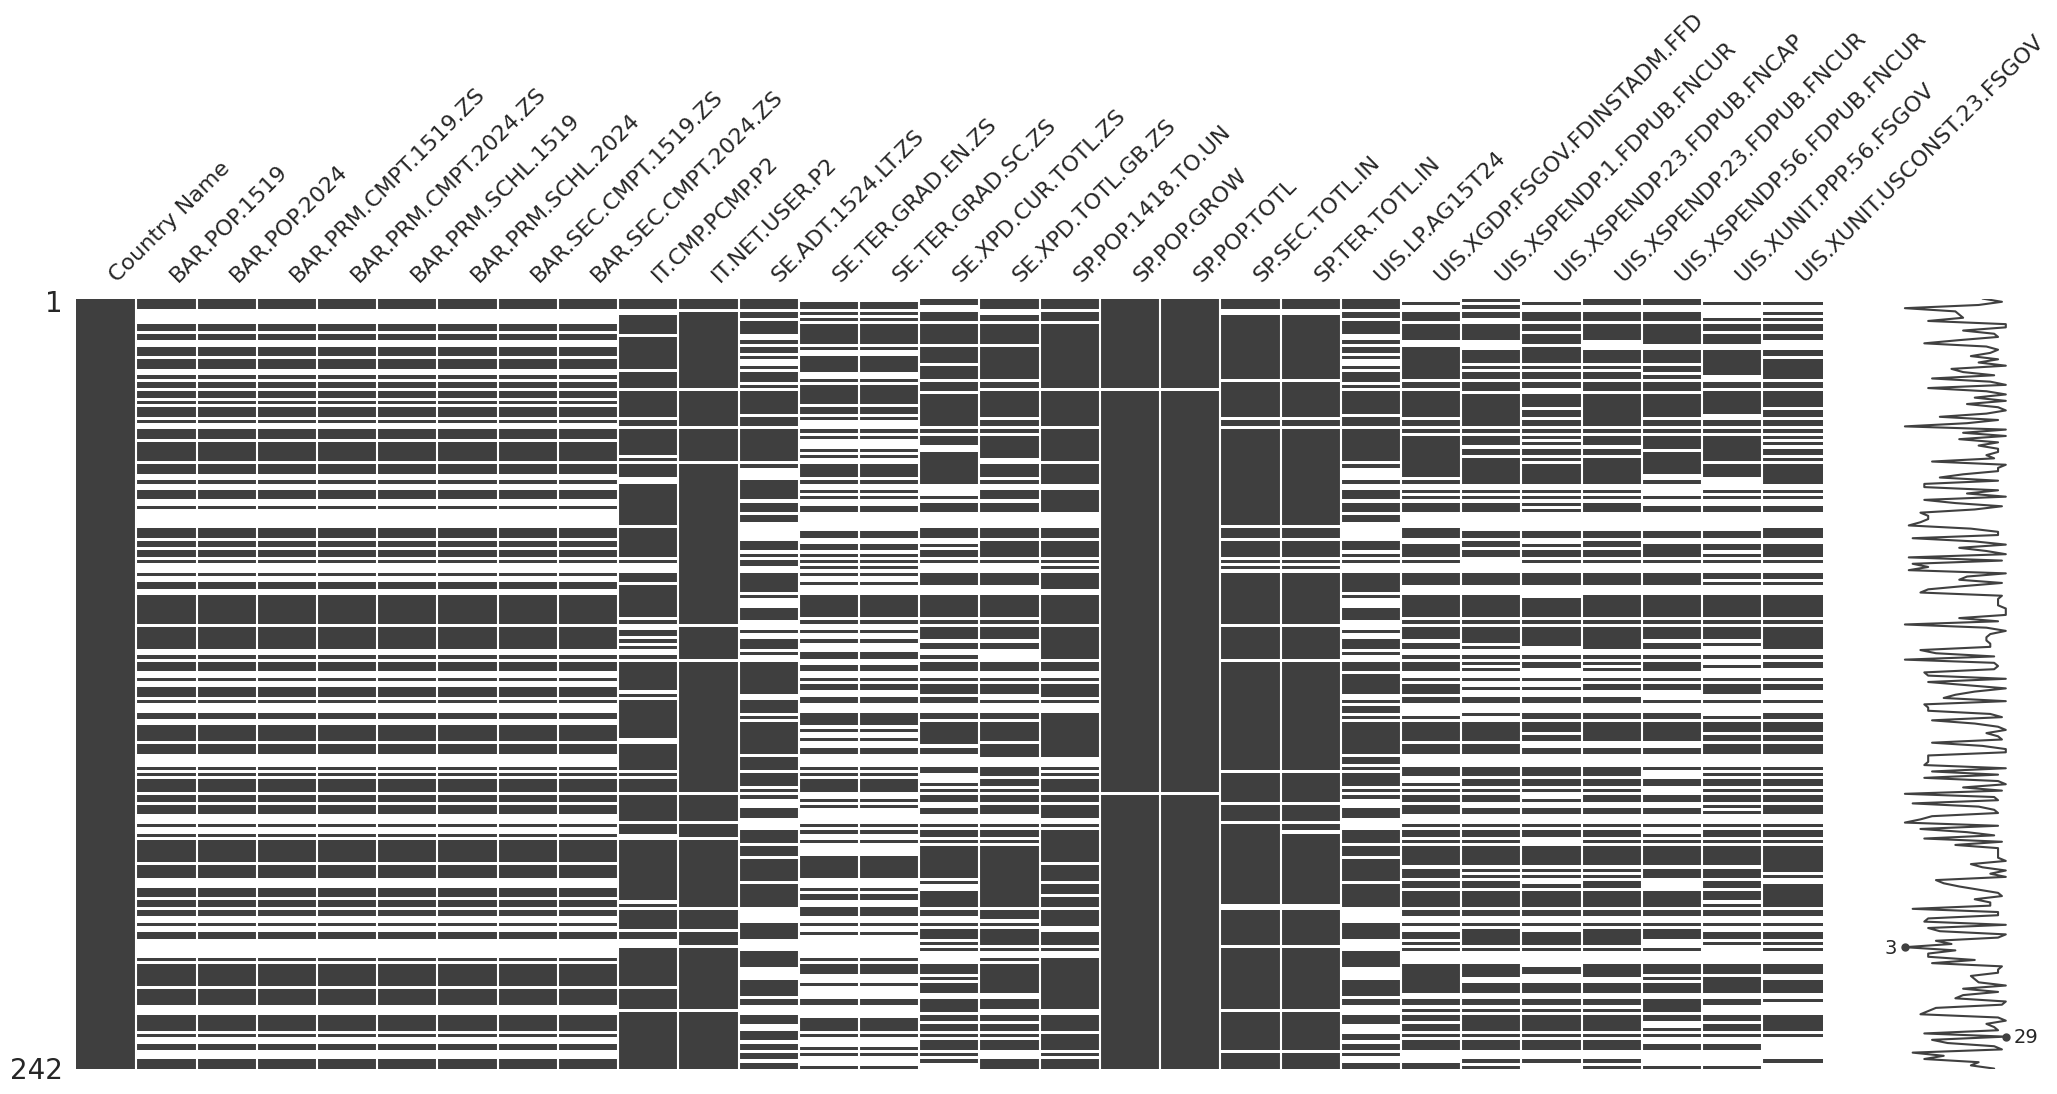

In [512]:
ms.matrix(df_info_code)

In [513]:
#compte du nombre d'indicateurs
nb_indic = len(df_info_code.notna().sum().sort_values())

#affichage du nombre d'indicateurs
print(f"Il y a {nb_indic} indicateurs sélectionnés")

Il y a 29 indicateurs sélectionnés


In [514]:
#tri des valeurs
df_info_code.notna().sum().sort_values()

Indicator Code
SE.TER.GRAD.SC.ZS               116
SE.TER.GRAD.EN.ZS               116
UIS.XUNIT.PPP.56.FSGOV          133
UIS.XSPENDP.23.FDPUB.FNCAP      134
UIS.XUNIT.USCONST.23.FSGOV      137
UIS.XSPENDP.56.FDPUB.FNCUR      138
BAR.SEC.CMPT.1519.ZS            144
BAR.SEC.CMPT.2024.ZS            144
BAR.PRM.SCHL.1519               144
BAR.PRM.CMPT.2024.ZS            144
BAR.PRM.CMPT.1519.ZS            144
BAR.POP.2024                    144
BAR.POP.1519                    144
BAR.PRM.SCHL.2024               144
UIS.XSPENDP.1.FDPUB.FNCUR       148
UIS.XSPENDP.23.FDPUB.FNCUR      152
UIS.LP.AG15T24                  152
SE.XPD.CUR.TOTL.ZS              154
UIS.XGDP.FSGOV.FDINSTADM.FFD    156
SE.ADT.1524.LT.ZS               160
SE.XPD.TOTL.GB.ZS               167
SP.POP.1418.TO.UN               191
IT.CMP.PCMP.P2                  199
SP.TER.TOTL.IN                  221
SP.SEC.TOTL.IN                  222
IT.NET.USER.P2                  229
SP.POP.TOTL                     240
SP.POP.GROW  

In [515]:
#tri des valeurs
df_info.notna().sum().sort_values()

Indicator Name
Percentage of graduates from tertiary education graduating from Engineering, Manufacturing and Construction programmes, both sexes (%)    116
Percentage of graduates from tertiary education graduating from Science programmes, both sexes (%)                                        116
Government expenditure per tertiary student (PPP$)                                                                                        133
Capital expenditure as % of total expenditure in secondary public institutions (%)                                                        134
Government expenditure per secondary student (constant US$)                                                                               137
Current expenditure as % of total expenditure in tertiary public institutions (%)                                                         138
Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary                                          

In [516]:
#affichage du dataframe contenant les pays, les indicateurs
df_info_code


Indicator Code        Country Name  BAR.POP.1519  BAR.POP.2024  \
0                      Afghanistan          3502          2874   
1                          Albania           308           283   
2                          Algeria          3652          3688   
3                   American Samoa           NaN           NaN   
4                          Andorra           NaN           NaN   
..                             ...           ...           ...   
237             West Bank and Gaza           NaN           NaN   
238                          World           NaN           NaN   
239                    Yemen, Rep.          2642          2226   
240                         Zambia          1475          1252   
241                       Zimbabwe          1731          1616   

Indicator Code  BAR.PRM.CMPT.1519.ZS  BAR.PRM.CMPT.2024.ZS  BAR.PRM.SCHL.1519  \
0                                 17                    13                  3   
1                                  7                     2                  6   
2                                 38                    32                  5   
3                                NaN                   NaN                NaN   
4                                NaN                   NaN                NaN   
..                               ...                   ...                ...   
237                              NaN                   NaN                NaN   
238                              NaN                   NaN                NaN   
239                               18                    10                  4   
240                               28                    36                  6   
241                               33                    27                  7   

Indicator Code  BAR.PRM.SCHL.2024  BAR.SEC.CMPT.1519.ZS  BAR.SEC.CMPT.2024.ZS  \
0                               3                     9                    14   
1                               8                    28                    46   
2                               5                    17                    20   
3                             NaN                   NaN                   NaN   
4                             NaN                   NaN                   NaN   
..                            ...                   ...                   ...   
237                           NaN                   NaN                   NaN   
238                           NaN                   NaN                   NaN   
239                             3                    10                    17   
240                             6                     9                    14   
241                             7                     2                     5   

Indicator Code  IT.CMP.PCMP.P2  ...  SP.SEC.TOTL.IN  SP.TER.TOTL.IN  \
0                            0  ...         3951402         2617563   
1                            4  ...          424254          277065   
2                            1  ...         4620329         3763073   
3                          NaN  ...             NaN             NaN   
4                          NaN  ...             NaN             NaN   
..                         ...  ...             ...             ...   
237                          5  ...          816855          414859   
238                         14  ...       773585681       603286825   
239                          2  ...         3527940         2518379   
240                          1  ...         1586452         1341998   
241                          7  ...         2021352         1586361   

Indicator Code  UIS.LP.AG15T24  UIS.XGDP.FSGOV.FDINSTADM.FFD  \
0                      2947366                           NaN   
1                         5795                             4   
2                       551048                           NaN   
3                          NaN                           NaN   
4                            0                             2   
..                      

In [517]:
#extraction des code pays
df_nom_code = df_data.loc[:, ['Country Name', 'Country Code']].drop_duplicates().reset_index(drop = True).sort_values('Country Name')

In [518]:
#ajout de la colonne code pays dans le df de travail
df_info = pd.merge(df_info, df_nom_code)

In [519]:
#verification rapide
df_info

Country Name  \
0           Afghanistan   
1               Albania   
2               Algeria   
3        American Samoa   
4               Andorra   
..                  ...   
237  West Bank and Gaza   
238               World   
239         Yemen, Rep.   
240              Zambia   
241            Zimbabwe   

     Barro-Lee: Average years of primary schooling, age 15-19, total  \
0                                                    3                 
1                                                    6                 
2                                                    5                 
3                                                  NaN                 
4                                                  NaN                 
..                                                 ...                 
237                                                NaN                 
238                                                NaN                 
239                                                  4                 
240                                                  6                 
241                                                  7                 

     Barro-Lee: Average years of primary schooling, age 20-24, total  \
0                                                    3                 
1                                                    8                 
2                                                    5                 
3                                                  NaN                 
4                                                  NaN                 
..                                                 ...                 
237                                                NaN                 
238                                                NaN                 
239                                                  3                 
240                                                  6                 
241                                                  7                 

     Barro-Lee: Percentage of population age 15-19 with primary schooling. Completed Primary  \
0                                                   17                                         
1                                                    7                                         
2                                                   38                                         
3                                                  NaN                                         
4                                                  NaN                                         
..                                                 ...                                         
237                                                NaN                                         
238                                                NaN                                         
239                                                 18                                         
240                                                 28                                         
241                                                 33                                         

     Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary  \
0                                                    9                                             
1                                                   28                                             
2                                                   17                                             
3                                                  NaN                                             
4                                                  NaN                                             
..                                                 ...                                             
237                                                NaN                                             
238

In [520]:
#extraction de l'information Income Group
df_code_region_income = df_country.loc[: , ['Country Code', 'Region', 'Income Group']].sort_values('Country Code')

In [521]:
#ajout des infos income group au df de travail
df_info = pd.merge(df_info, df_code_region_income)

In [522]:
#vérification rapide
df_info.head()

Country Name  \
0     Afghanistan   
1         Albania   
2         Algeria   
3  American Samoa   
4         Andorra   

   Barro-Lee: Average years of primary schooling, age 15-19, total  \
0                                                  3                 
1                                                  6                 
2                                                  5                 
3                                                NaN                 
4                                                NaN                 

   Barro-Lee: Average years of primary schooling, age 20-24, total  \
0                                                  3                 
1                                                  8                 
2                                                  5                 
3                                                NaN                 
4                                                NaN                 

   Barro-Lee: Percentage of population age 15-19 with primary schooling. Completed Primary  \
0                                                 17                                         
1                                                  7                                         
2                                                 38                                         
3                                                NaN                                         
4                                                NaN                                         

   Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary  \
0                                                  9                                             
1                                                 28                                             
2                                                 17                                             
3                                                NaN                                             
4                                                NaN                                             

   Barro-Lee: Percentage of population age 20-24 with primary schooling. Completed Primary  \
0                                                 13                                         
1                                                  2                                         
2                                                 32                                         
3                                                NaN                                         
4                                                NaN                                         

   Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary  \
0                                                 14                                             
1                                                 46                                             
2                                                 20                                             
3                                                NaN                                             
4                                                NaN                                             

   Barro-Lee: Population in thousands, age 15-19, total  \
0                                               3502      
1                                                308      
2                                               3652      
3                                                NaN      
4                                                NaN      

   Barro-Lee: Population in thousands, age 20-24, total  \
0                                               2874      
1                                                283      
2                                               3688      
3                                                NaN      
4                                                NaN      

   Capital expendi

In [523]:
#création liste nom de colonnes
cols = list(df_info.columns)

#déplacement des trois dernières colonnes après la première colonne
new_order = cols[:1] + cols[-3:] + cols[1:-3]
df_info = df_info[new_order]

In [524]:
#verif rapide
df_info

Country Name Country Code                      Region  \
0           Afghanistan          AFG                  South Asia   
1               Albania          ALB       Europe & Central Asia   
2               Algeria          DZA  Middle East & North Africa   
3        American Samoa          ASM         East Asia & Pacific   
4               Andorra          AND       Europe & Central Asia   
..                  ...          ...                         ...   
236  West Bank and Gaza          PSE  Middle East & North Africa   
237               World          WLD                         NaN   
238         Yemen, Rep.          YEM  Middle East & North Africa   
239              Zambia          ZMB          Sub-Saharan Africa   
240            Zimbabwe          ZWE          Sub-Saharan Africa   

             Income Group  \
0              Low income   
1     Upper middle income   
2     Upper middle income   
3     Upper middle income   
4    High income: nonOECD   
..                    ...   
236   Lower middle income   
237                   NaN   
238   Lower middle income   
239   Lower middle income   
240            Low income   

     Barro-Lee: Average years of primary schooling, age 15-19, total  \
0                                                    3                 
1                                                    6                 
2                                                    5                 
3                                                  NaN                 
4                                                  NaN                 
..                                                 ...                 
236                                                NaN                 
237                                                NaN                 
238                                                  4                 
239                                                  6                 
240                                                  7                 

     Barro-Lee: Average years of primary schooling, age 20-24, total  \
0                                                    3                 
1                                                    8                 
2                                                    5                 
3                                                  NaN                 
4                                                  NaN                 
..                                                 ...                 
236                                                NaN                 
237                                                NaN                 
238                                                  3                 
239                                                  6                 
240                                                  7                 

     Barro-Lee: Percentage of population age 15-19 with primary schooling. Completed Primary  \
0                                                   17                                         
1                                                    7                                         
2                                                   38                                         
3                                                  NaN                                         
4                                                  NaN                                         
..                                                 ...                                         
236                                                NaN                                         
237                                                NaN                                         
238                                                 18                                         
239                                                 28                                         
240                                                 33     

<Axes: >

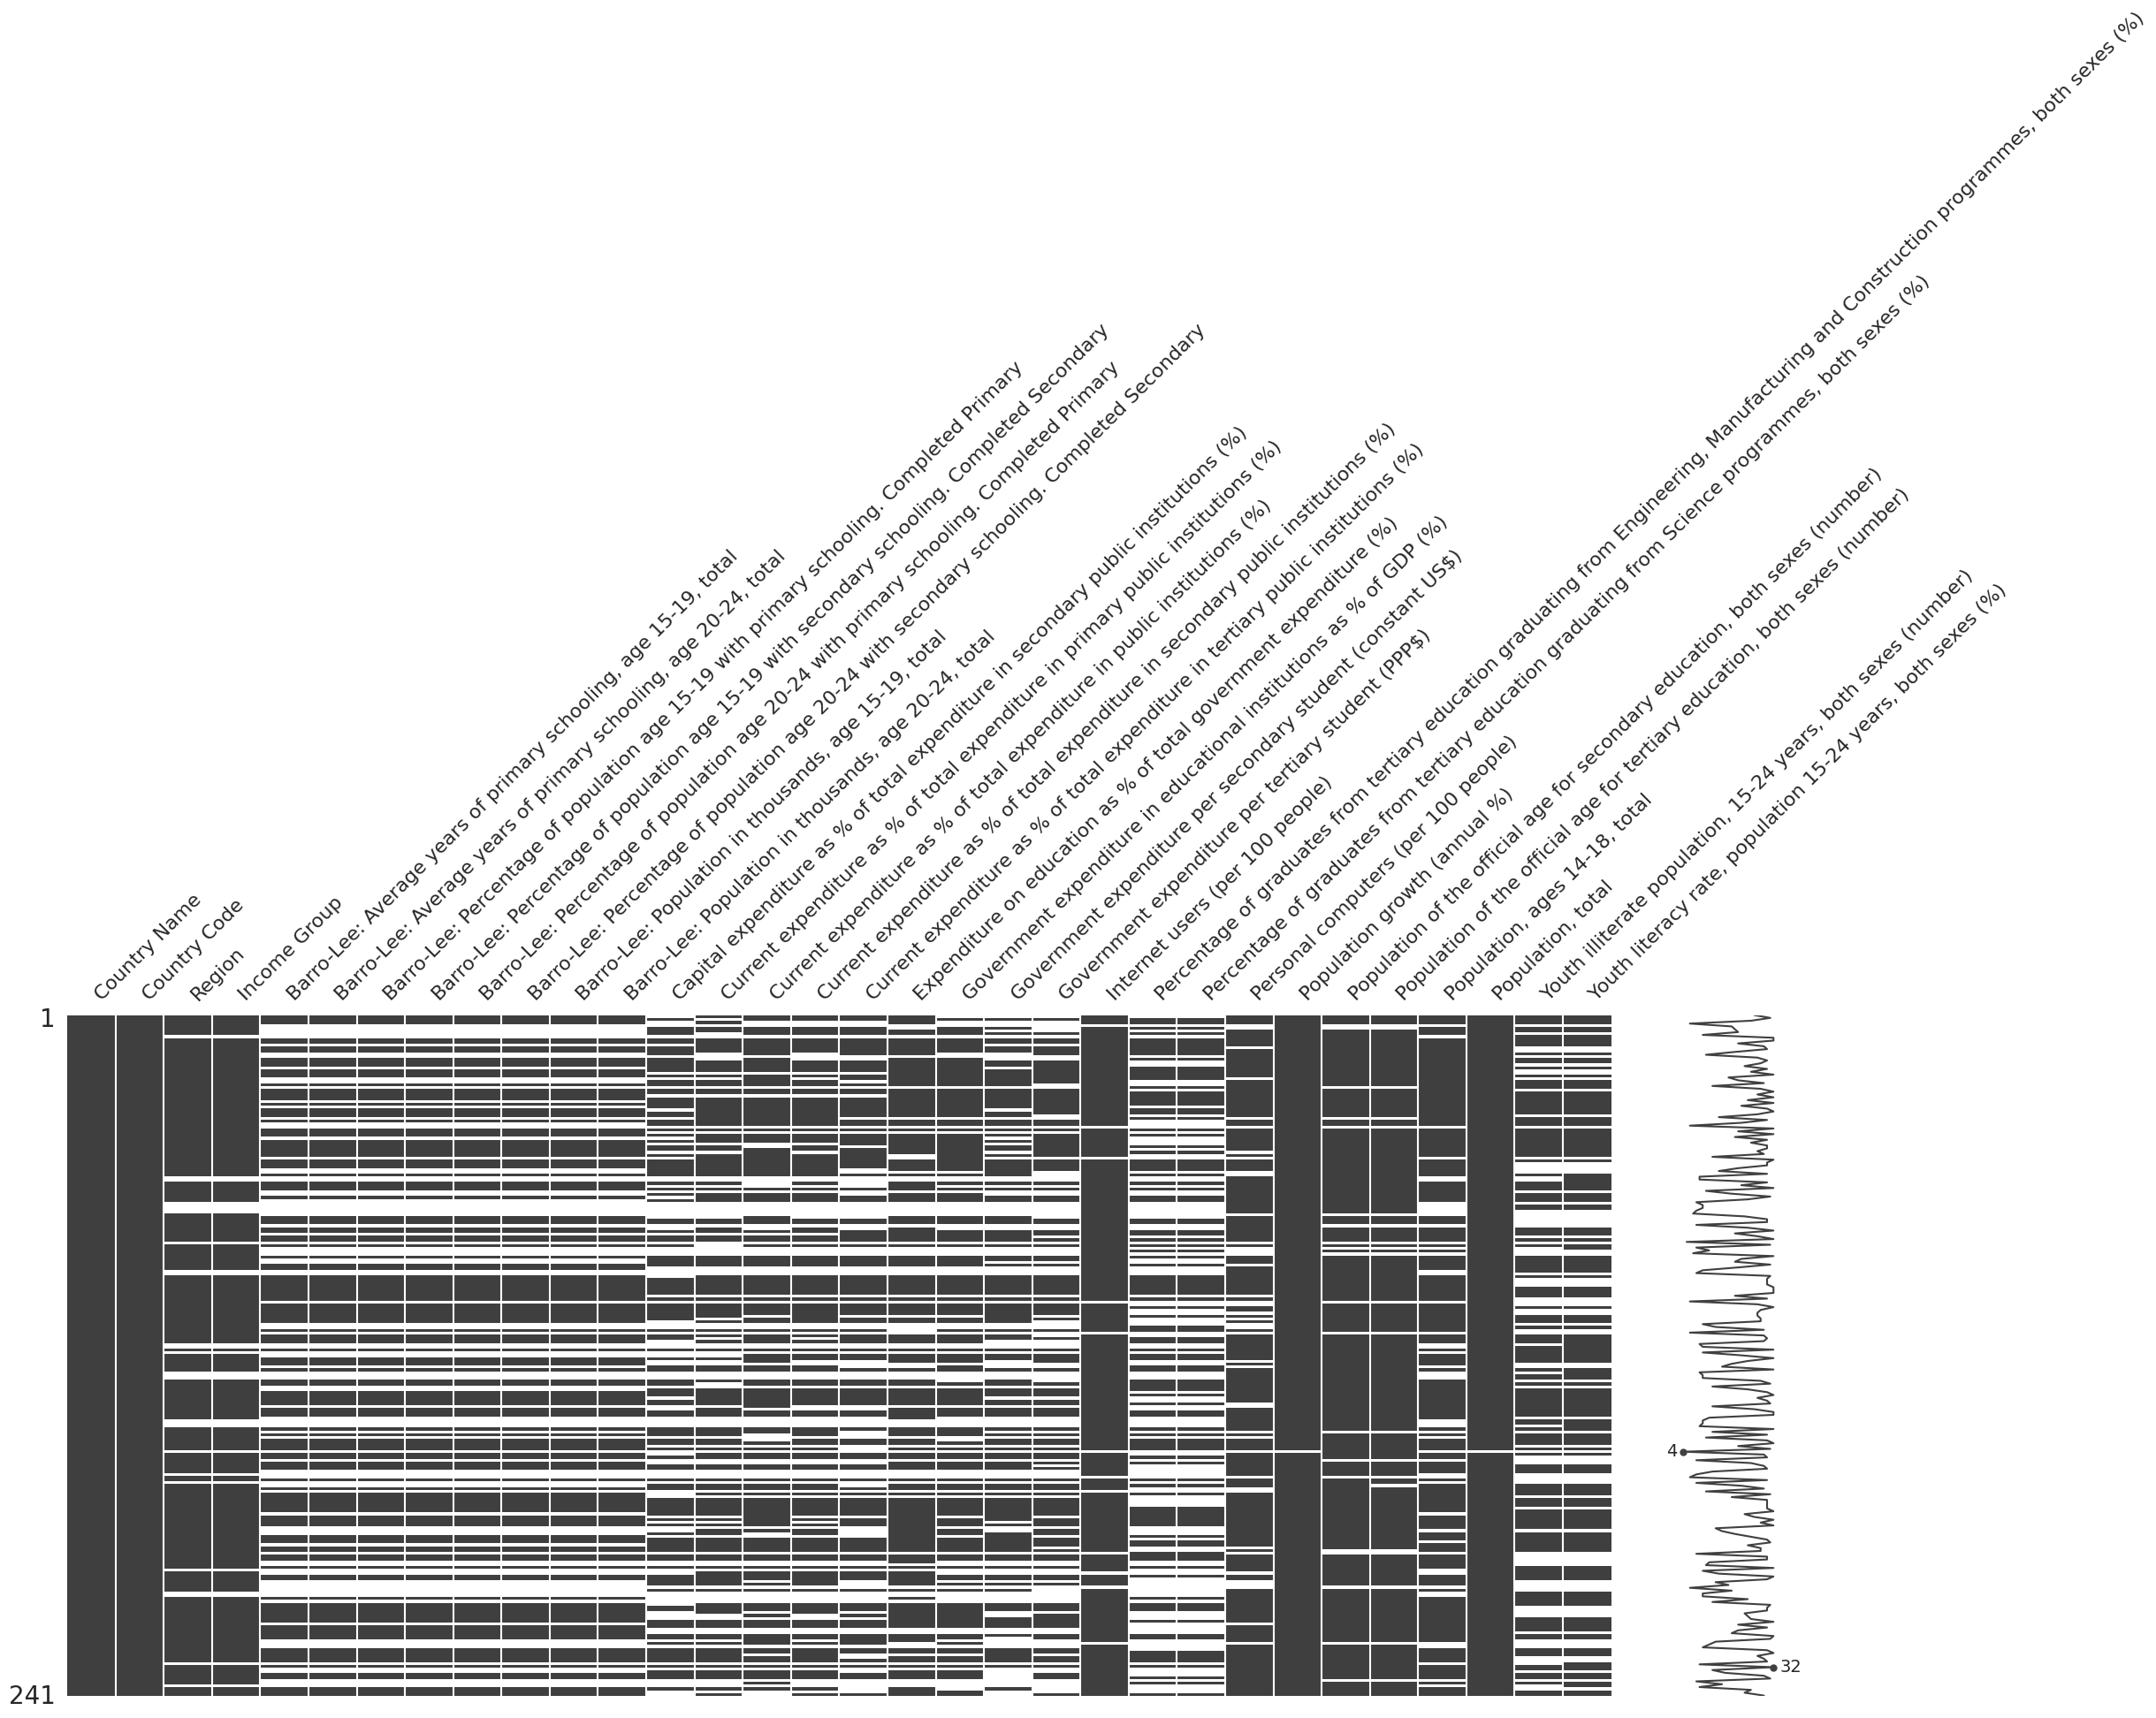

In [525]:
#affichage matrice missingno
ms.matrix(df_info)

In [526]:
#export en csv pour vérification auprès de Mostafa
df_info.to_csv('Projet2_Rogues_alex.csv')

In [527]:
#Détection des lignes qui renseignent sur une région plutot que sur un pays
df_info[df_info['Region'].isna()]

Country Name Country Code Region  \
7                                           Arab World          ARB    NaN   
57                                 East Asia & Pacific          EAS    NaN   
58         East Asia & Pacific (excluding high income)          EAP    NaN   
66                                           Euro area          EMU    NaN   
67                               Europe & Central Asia          ECS    NaN   
68       Europe & Central Asia (excluding high income)          ECA    NaN   
69                                      European Union          EUU    NaN   
80                                           Gibraltar          GIB    NaN   
90              Heavily indebted poor countries (HIPC)          HPC    NaN   
91                                         High income          HIC    NaN   
116                          Latin America & Caribbean          LCN    NaN   
117  Latin America & Caribbean (excluding high income)          LAC    NaN   
119       Least developed countries: UN classification          LDC    NaN   
126                                Low & middle income          LMY    NaN   
127                                         Low income          LIC    NaN   
128                                Lower middle income          LMC    NaN   
143                         Middle East & North Africa          MEA    NaN   
144  Middle East & North Africa (excluding high inc...          MNA    NaN   
145                                      Middle income          MIC    NaN   
154                                              Nauru          NRU    NaN   
162                                      North America          NAC    NaN   
165                                       OECD members          OED    NaN   
196                                         South Asia          SAS    NaN   
204                                 Sub-Saharan Africa          SSF    NaN   
205         Sub-Saharan Africa (excluding high income)          SSA    NaN   
229                                Upper middle income          UMC    NaN   
237                                              World          WLD    NaN   

    Income Group  \
7            NaN   
57           NaN   
58           NaN   
66           NaN   
67           NaN   
68           NaN   
69           NaN   
80           NaN   
90           NaN   
91           NaN   
116          NaN   
117          NaN   
119          NaN   
126          NaN   
127          NaN   
128          NaN   
143          NaN   
144          NaN   
145          NaN   
154          NaN   
162          NaN   
165          NaN   
196          NaN   
204          NaN   
205          NaN   
229          NaN   
237          NaN   

     Barro-Lee: Average years of primary schooling, age 15-19, total  \
7                                                  NaN                 
57                                                 NaN                 
58                                                 NaN                 
66                                                 NaN                 
67                                                 NaN                 
68                                                 NaN                 
69                                                 NaN                 
80                                                 NaN                 
90                                                 NaN                 
91                                                 NaN                 
116                                                NaN                 
117                                                NaN                 
119                                                NaN                 
126                                                NaN                 
127                                                NaN                 
128                                                NaN                 
143                                                NaN                 


In [528]:
#suppression des lignes contenant une région plutôt qu'un pays
df_info = df_info.dropna(subset=['Region']).copy()
df_info

Country Name Country Code                      Region  \
0              Afghanistan          AFG                  South Asia   
1                  Albania          ALB       Europe & Central Asia   
2                  Algeria          DZA  Middle East & North Africa   
3           American Samoa          ASM         East Asia & Pacific   
4                  Andorra          AND       Europe & Central Asia   
..                     ...          ...                         ...   
235  Virgin Islands (U.S.)          VIR   Latin America & Caribbean   
236     West Bank and Gaza          PSE  Middle East & North Africa   
238            Yemen, Rep.          YEM  Middle East & North Africa   
239                 Zambia          ZMB          Sub-Saharan Africa   
240               Zimbabwe          ZWE          Sub-Saharan Africa   

             Income Group  \
0              Low income   
1     Upper middle income   
2     Upper middle income   
3     Upper middle income   
4    High income: nonOECD   
..                    ...   
235  High income: nonOECD   
236   Lower middle income   
238   Lower middle income   
239   Lower middle income   
240            Low income   

     Barro-Lee: Average years of primary schooling, age 15-19, total  \
0                                                    3                 
1                                                    6                 
2                                                    5                 
3                                                  NaN                 
4                                                  NaN                 
..                                                 ...                 
235                                                NaN                 
236                                                NaN                 
238                                                  4                 
239                                                  6                 
240                                                  7                 

     Barro-Lee: Average years of primary schooling, age 20-24, total  \
0                                                    3                 
1                                                    8                 
2                                                    5                 
3                                                  NaN                 
4                                                  NaN                 
..                                                 ...                 
235                                                NaN                 
236                                                NaN                 
238                                                  3                 
239                                                  6                 
240                                                  7                 

     Barro-Lee: Percentage of population age 15-19 with primary schooling. Completed Primary  \
0                                                   17                                         
1                                                    7                                         
2                                                   38                                         
3                                                  NaN                                         
4                                                  NaN                                         
..                                                 ...                                         
235                                                NaN                                         
236                                                NaN                                         
238                                                 18                                         
239                                                 28                                         
240                       

In [529]:
#création liste d'indicateur
indic = df_info.columns[4:].to_list()

#selection des colonnes du df_info selon les indicateurs
df_info_indic = df_info.loc[:, indic]

#affichage rapide
df_info_indic

Barro-Lee: Average years of primary schooling, age 15-19, total  \
0                                                    3                 
1                                                    6                 
2                                                    5                 
3                                                  NaN                 
4                                                  NaN                 
..                                                 ...                 
235                                                NaN                 
236                                                NaN                 
238                                                  4                 
239                                                  6                 
240                                                  7                 

     Barro-Lee: Average years of primary schooling, age 20-24, total  \
0                                                    3                 
1                                                    8                 
2                                                    5                 
3                                                  NaN                 
4                                                  NaN                 
..                                                 ...                 
235                                                NaN                 
236                                                NaN                 
238                                                  3                 
239                                                  6                 
240                                                  7                 

     Barro-Lee: Percentage of population age 15-19 with primary schooling. Completed Primary  \
0                                                   17                                         
1                                                    7                                         
2                                                   38                                         
3                                                  NaN                                         
4                                                  NaN                                         
..                                                 ...                                         
235                                                NaN                                         
236                                                NaN                                         
238                                                 18                                         
239                                                 28                                         
240                                                 33                                         

     Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary  \
0                                                    9                                             
1                                                   28                                             
2                                                   17                                             
3                                                  NaN                                             
4                                                  NaN                                             
..                                                 ...                                             
235                                                NaN                                             
236                                                NaN                                             
238                                                 10                                             
239                                                  9                                             
240                   

In [530]:
df_info.loc[:, 'Youth illiterate population, 15-24 years, both sexes (number)'].isna().sum()

75

## Verification des outliers valeurs aberrantes

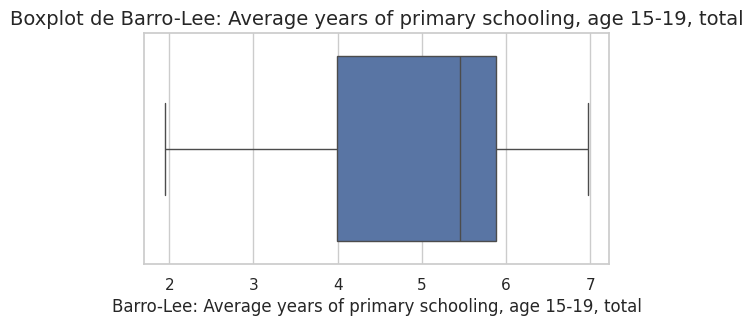

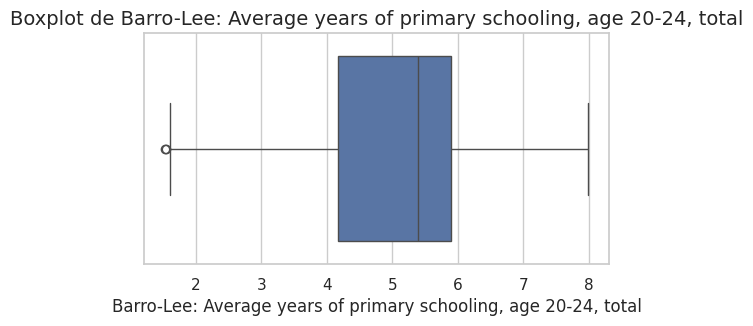

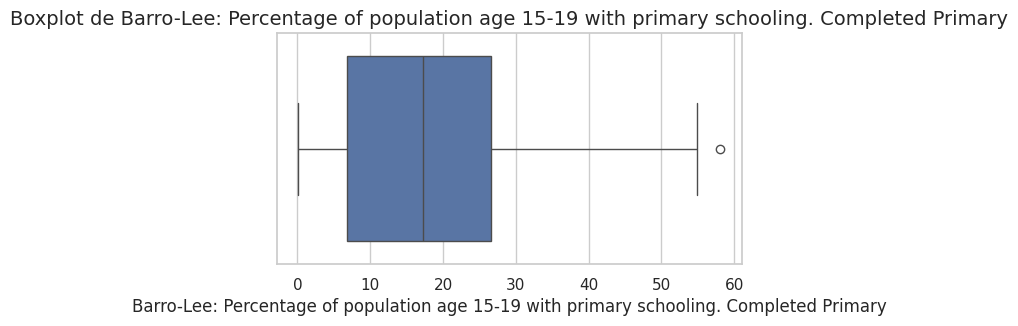

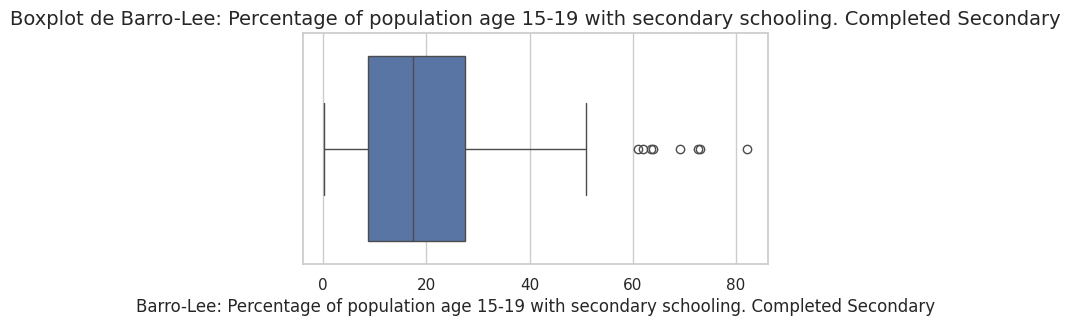

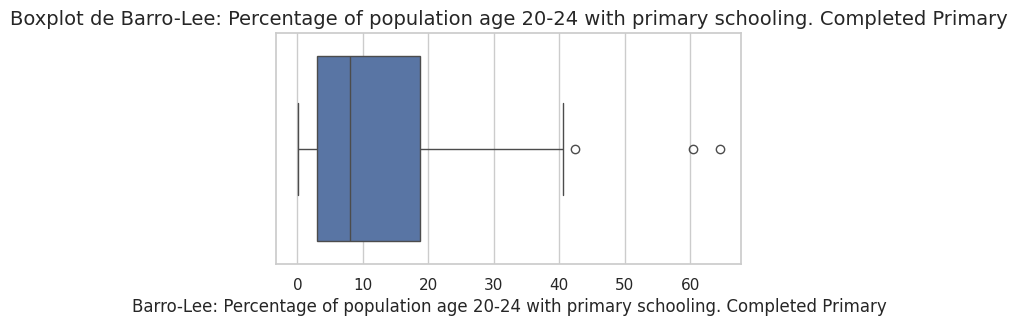

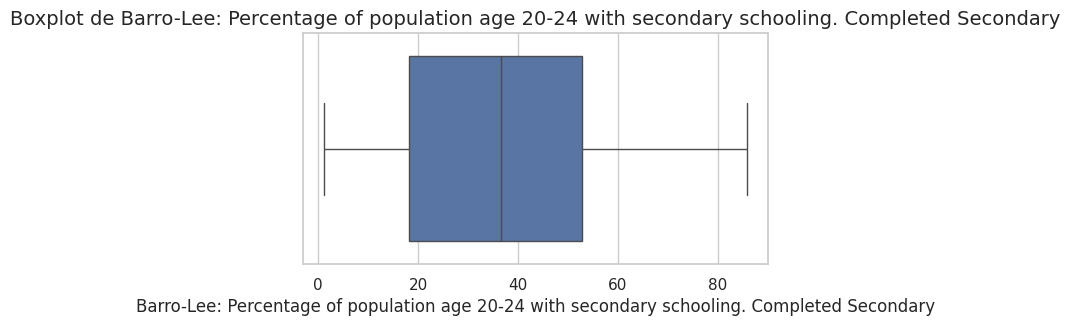

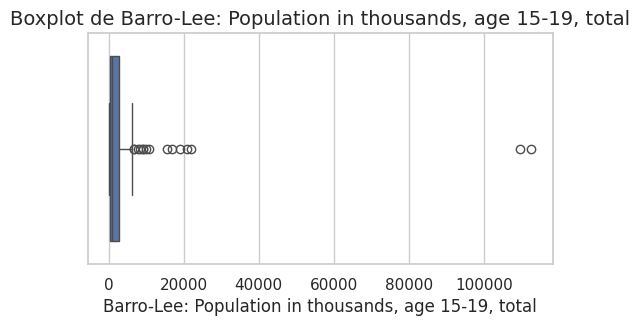

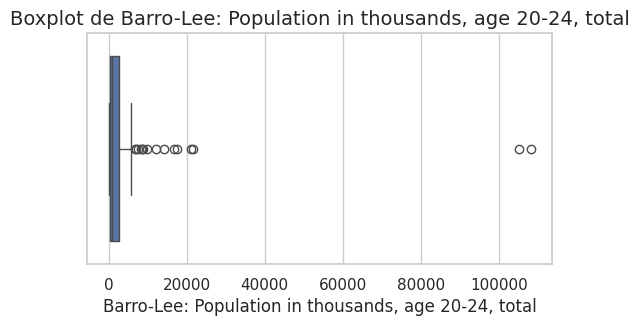

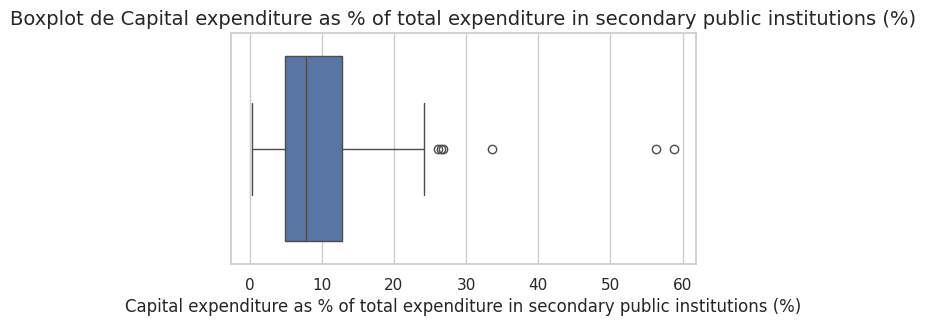

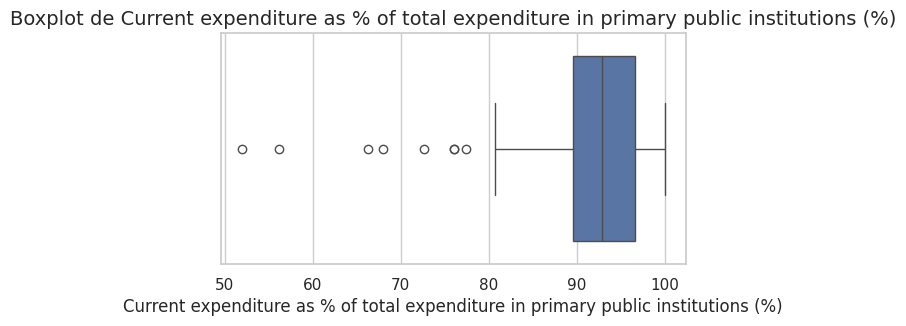

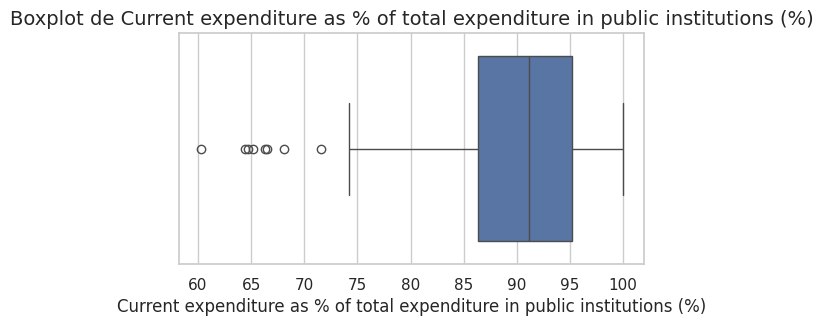

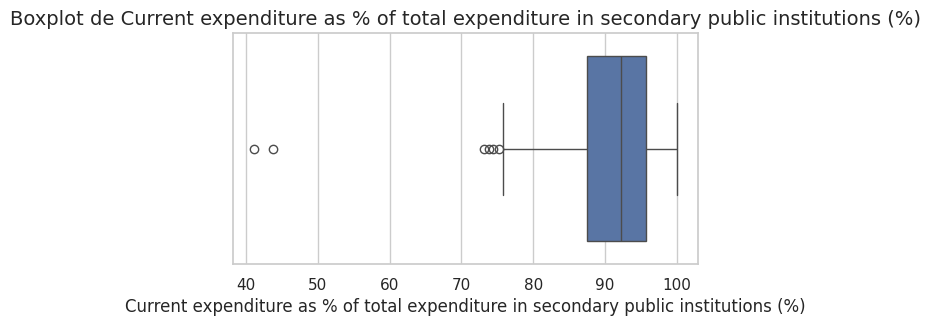

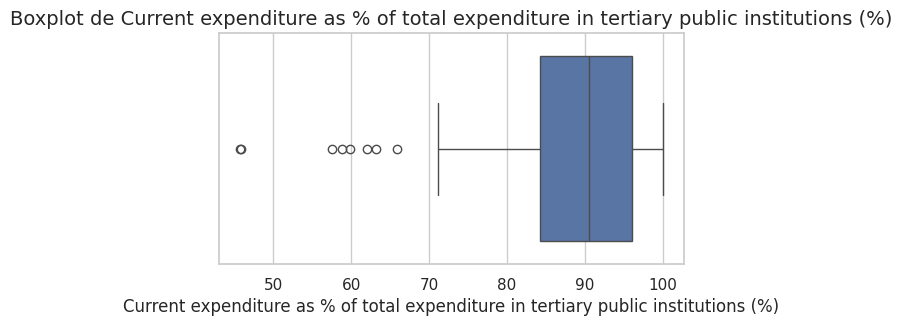

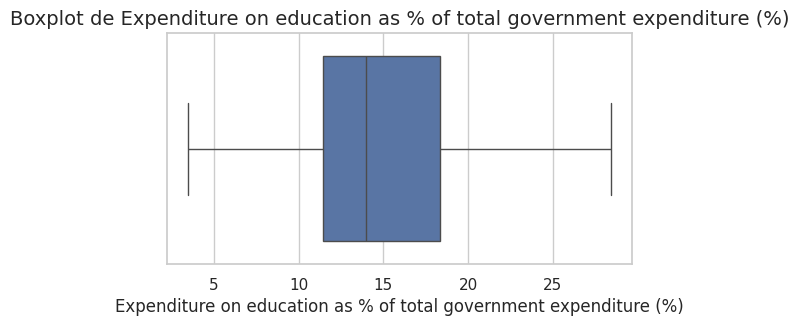

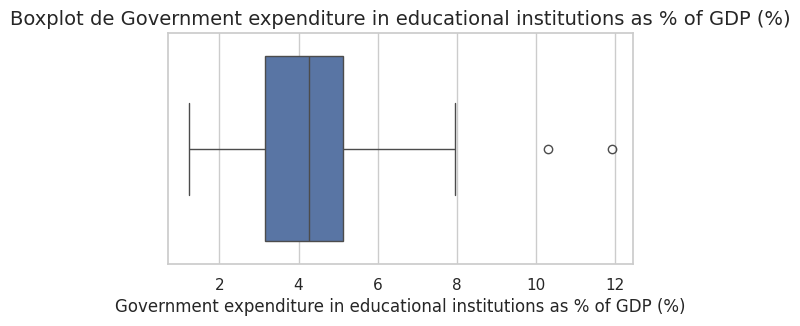

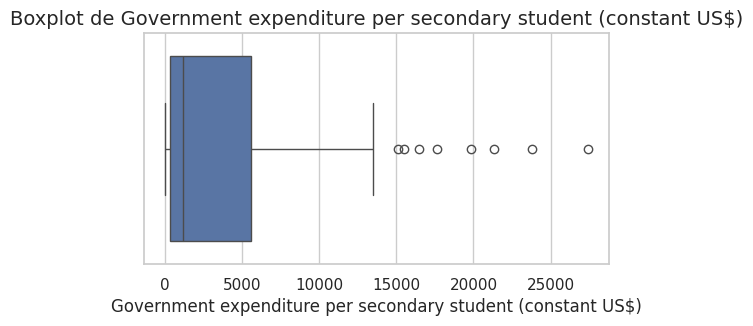

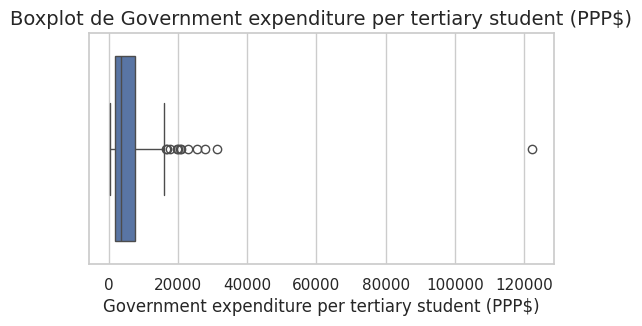

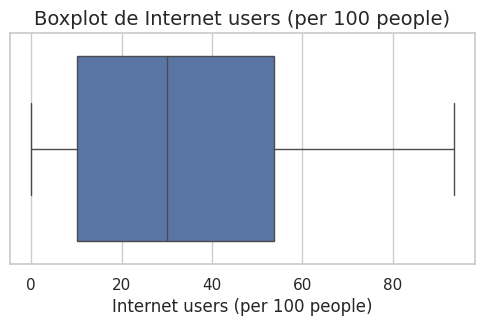

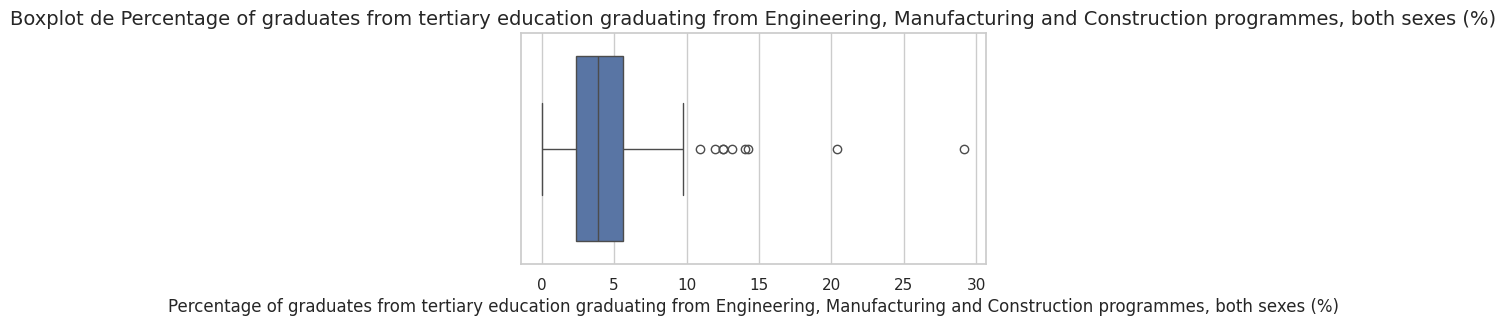

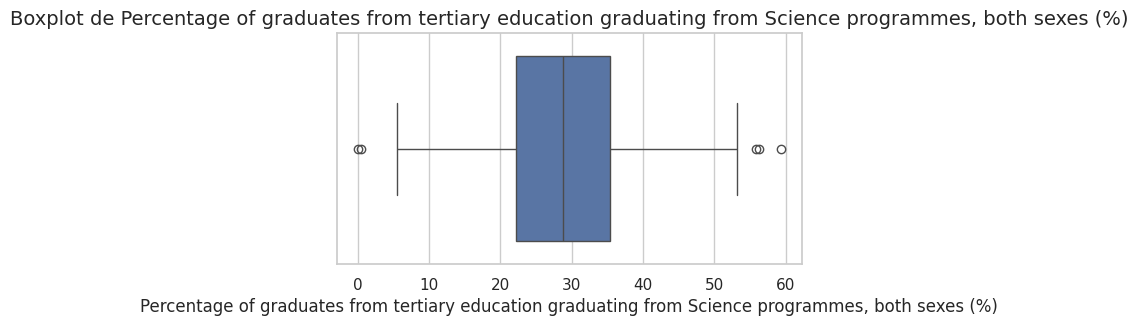

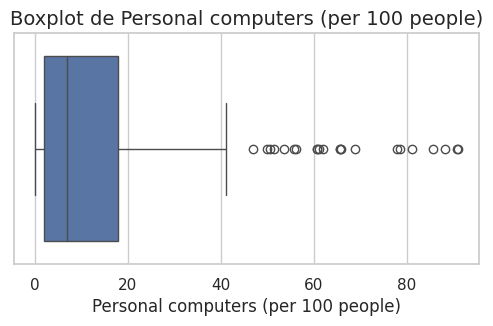

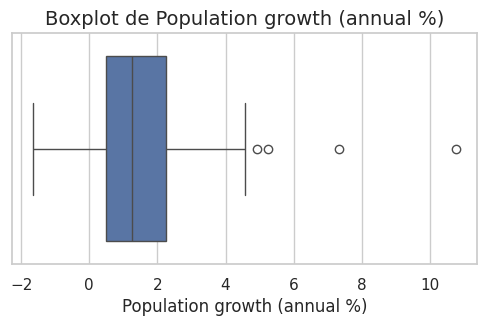

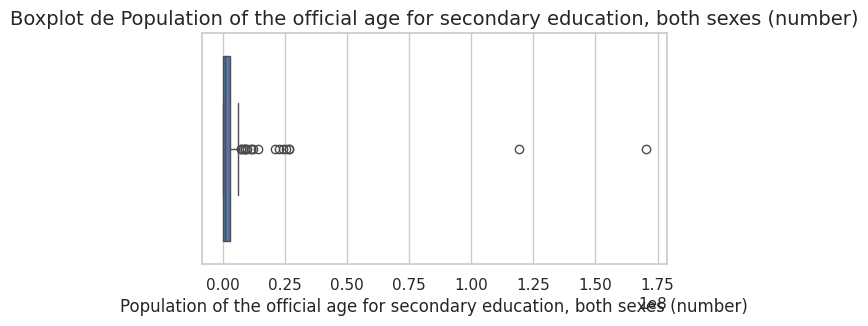

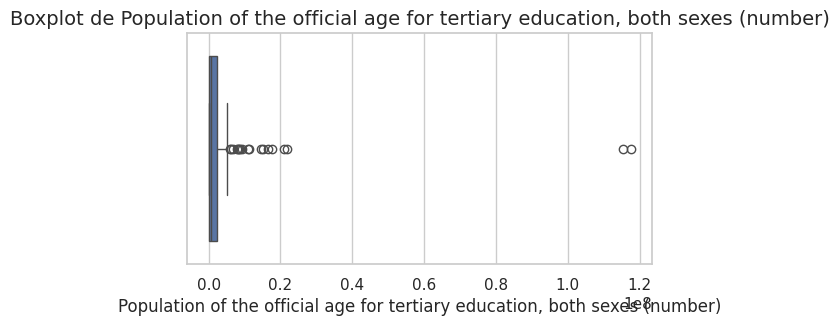

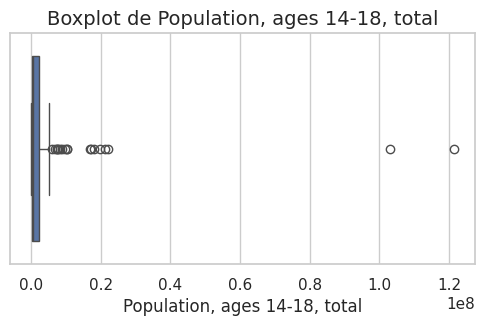

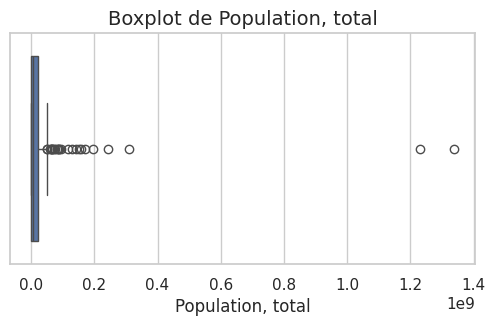

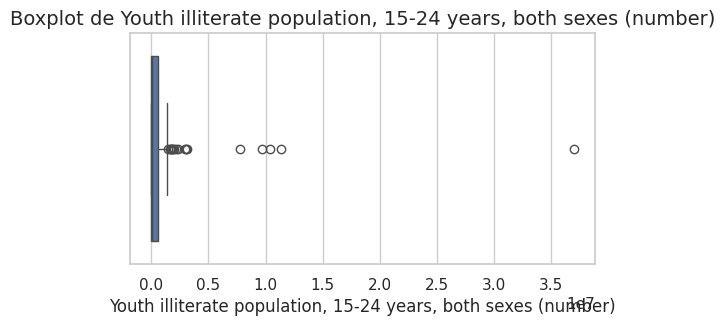

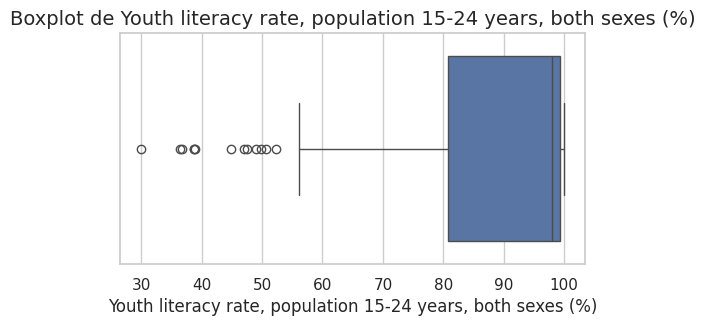

In [531]:
import seaborn as sns

liste_indics = df_info.columns.to_list()[4:]

for indic in liste_indics:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_info.loc[:, indic])
    plt.title(f"Boxplot de {indic}", fontdict={'fontsize': 14})
    plt.show()


**Sélection d'indicateurs**

Barro-Lee: Average years of primary schooling, age 15-19, total

Barro-Lee: Average years of primary schooling, age 20-24, total

Barro-Lee: Population in thousands, age 15-19, total

Barro-Lee: Population in thousands, age 20-24, total

Percentage of population age 20-24 with secondary schooling. Completed

Capital expenditure as % of total expenditure in secondary public institutions

Current expenditure as % of total expenditure in primary public institutions

Expenditure on education as % of total government expenditure (%)

Internet users (per 100 people)

Personal computers (per 100 people)

Population growth (annual %)

Population, total

Youth literacy rate, population 15-24, both sexes (%)

### Indicateur *Population, total*

In [532]:
#définir le format d'affichage des nombres flottants
pd.options.display.float_format = '{:.0f}'.format


pays_habitants = df_info.loc[:, ['Country Name', "Population, total"]].sort_values(by='Population, total', ascending=False)

pays_habitants

Country Name  Population, total
41                      China         1337630909
96                      India         1229086611
228             United States          308788011
97                  Indonesia          242498199
27                     Brazil          196678113
..                        ...                ...
182                San Marino              31123
222  Turks and Caicos Islands              30800
202  St. Martin (French part)              29722
168                     Palau              20521
223                    Tuvalu              10527

[214 rows x 2 columns]

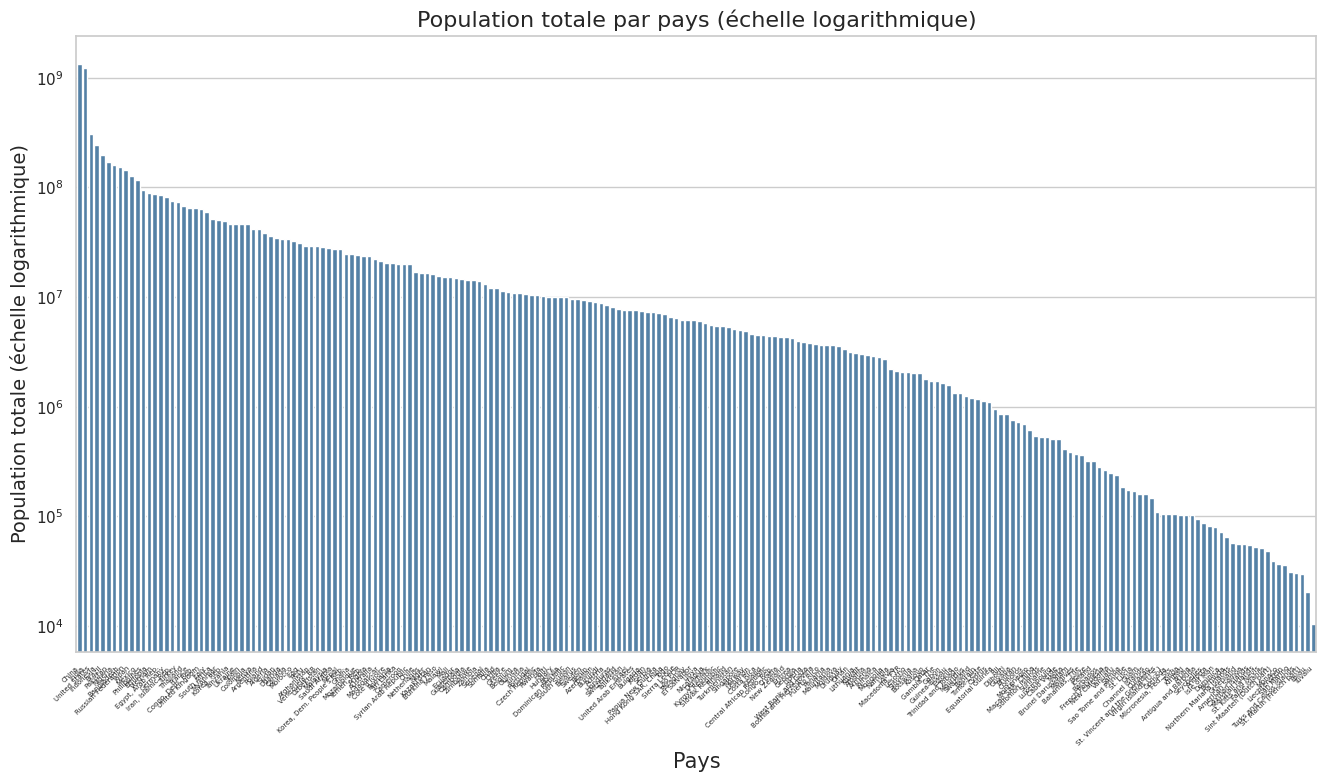

In [533]:
#tri du dataframe en fonction de la colonne 'Population, total' de manière décroissante
pays_habitants = pays_habitants.sort_values(by='Population, total', ascending=False)

#configuration du style de seaborn
sns.set(style="whitegrid")

#tracé du graphique à barres avec seaborn et échelle logarithmique sur l'axe y
plt.figure(figsize=(16, 8))
barplot = sns.barplot(x='Country Name', y='Population, total', data=pays_habitants, color='steelblue')

#utilisation d'une échelle logarithmique sur l'axe y
plt.yscale("log")

#rotation des étiquettes sur l'axe x pour une meilleure lisibilité
barplot.set_xticks(barplot.get_xticks())
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right', fontsize=5)

# ajout de titres et d'étiquettes
plt.title('Population totale par pays (échelle logarithmique)', fontsize=16)
plt.xlabel('Pays', fontsize=15)
plt.ylabel('Population totale (échelle logarithmique)', fontsize=14)

# Affichage du graphique
plt.show()

In [534]:
pays_habitants.describe()

Population, total
count                214
mean            32282458
std            128429538
min                10527
25%               854254
50%              6129723
75%             20502150
max           1337630909

### Indicateurs *Barro-Lee: Population in thousands, age 15-19, total* & *Barro-Lee: Population in thousands, age 20-24, total*

In [535]:
population_15_24 = df_info.loc[:, ['Country Name', "Barro-Lee: Population in thousands, age 15-19, total", "Barro-Lee: Population in thousands, age 20-24, total"]]

population_15_24 = population_15_24.dropna(subset=['Barro-Lee: Population in thousands, age 15-19, total', 'Barro-Lee: Population in thousands, age 20-24, total'], how='all')

population_15_24['Population 15-24'] = population_15_24[['Barro-Lee: Population in thousands, age 15-19, total', 'Barro-Lee: Population in thousands, age 20-24, total']].sum(axis=1)

population_15_24 = population_15_24.drop(['Barro-Lee: Population in thousands, age 15-19, total', 'Barro-Lee: Population in thousands, age 20-24, total'], axis=1)

population_15_24 = population_15_24.sort_values(by='Population 15-24', ascending = False)

population_15_24

Country Name  Population 15-24
41           China            217972
96           India            217956
228  United States             43597
97       Indonesia             41880
167       Pakistan             35623
..             ...               ...
137          Malta                58
129     Luxembourg                54
95         Iceland                44
17        Barbados                40
217          Tonga                21

[144 rows x 2 columns]

### Indicateur *Internet users (per 100 people)*

In [536]:
df_info

Country Name Country Code                      Region  \
0              Afghanistan          AFG                  South Asia   
1                  Albania          ALB       Europe & Central Asia   
2                  Algeria          DZA  Middle East & North Africa   
3           American Samoa          ASM         East Asia & Pacific   
4                  Andorra          AND       Europe & Central Asia   
..                     ...          ...                         ...   
235  Virgin Islands (U.S.)          VIR   Latin America & Caribbean   
236     West Bank and Gaza          PSE  Middle East & North Africa   
238            Yemen, Rep.          YEM  Middle East & North Africa   
239                 Zambia          ZMB          Sub-Saharan Africa   
240               Zimbabwe          ZWE          Sub-Saharan Africa   

             Income Group  \
0              Low income   
1     Upper middle income   
2     Upper middle income   
3     Upper middle income   
4    High income: nonOECD   
..                    ...   
235  High income: nonOECD   
236   Lower middle income   
238   Lower middle income   
239   Lower middle income   
240            Low income   

     Barro-Lee: Average years of primary schooling, age 15-19, total  \
0                                                    3                 
1                                                    6                 
2                                                    5                 
3                                                  NaN                 
4                                                  NaN                 
..                                                 ...                 
235                                                NaN                 
236                                                NaN                 
238                                                  4                 
239                                                  6                 
240                                                  7                 

     Barro-Lee: Average years of primary schooling, age 20-24, total  \
0                                                    3                 
1                                                    8                 
2                                                    5                 
3                                                  NaN                 
4                                                  NaN                 
..                                                 ...                 
235                                                NaN                 
236                                                NaN                 
238                                                  3                 
239                                                  6                 
240                                                  7                 

     Barro-Lee: Percentage of population age 15-19 with primary schooling. Completed Primary  \
0                                                   17                                         
1                                                    7                                         
2                                                   38                                         
3                                                  NaN                                         
4                                                  NaN                                         
..                                                 ...                                         
235                                                NaN                                         
236                                                NaN                                         
238                                                 18                                         
239                                                 28                                         
240                       

In [537]:
internet_users = df_info.loc[:, ['Country Name', "Internet users (per 100 people)"]]

internet_users = internet_users.dropna(subset=['Internet users (per 100 people)'], how='all')

internet_users = internet_users.sort_values(by='Internet users (per 100 people)', ascending = False)

internet_users.head(40)

Country Name  Internet users (per 100 people)
95                Iceland                               93
164                Norway                               91
209                Sweden                               90
53                Denmark                               89
156           Netherlands                               89
129            Luxembourg                               86
72                Finland                               85
22                Bermuda                               85
227        United Kingdom                               82
111           Korea, Rep.                               82
210           Switzerland                               82
70          Faroe Islands                               80
35                 Canada                               80
124         Liechtenstein                               80
78                Germany                               80
105                 Japan                               79
158           New Zealand                               78
4                 Andorra                               76
147                Monaco                               76
11              Australia                               76
12                Austria                               74
64                Estonia                               74
19                Belgium                               73
228         United States                               72
73                 France                               71
189             Singapore                               71
226  United Arab Emirates                               71
93   Hong Kong SAR, China                               70
191       Slovak Republic                               70
100               Ireland                               68
118                Latvia                               66
17               Barbados                               65
198                 Spain                               64
192              Slovenia                               64
52         Czech Republic                               64
82              Greenland                               63
36         Cayman Islands                               63
94                Hungary                               62
15                Bahrain                               62
177                 Qatar                               60

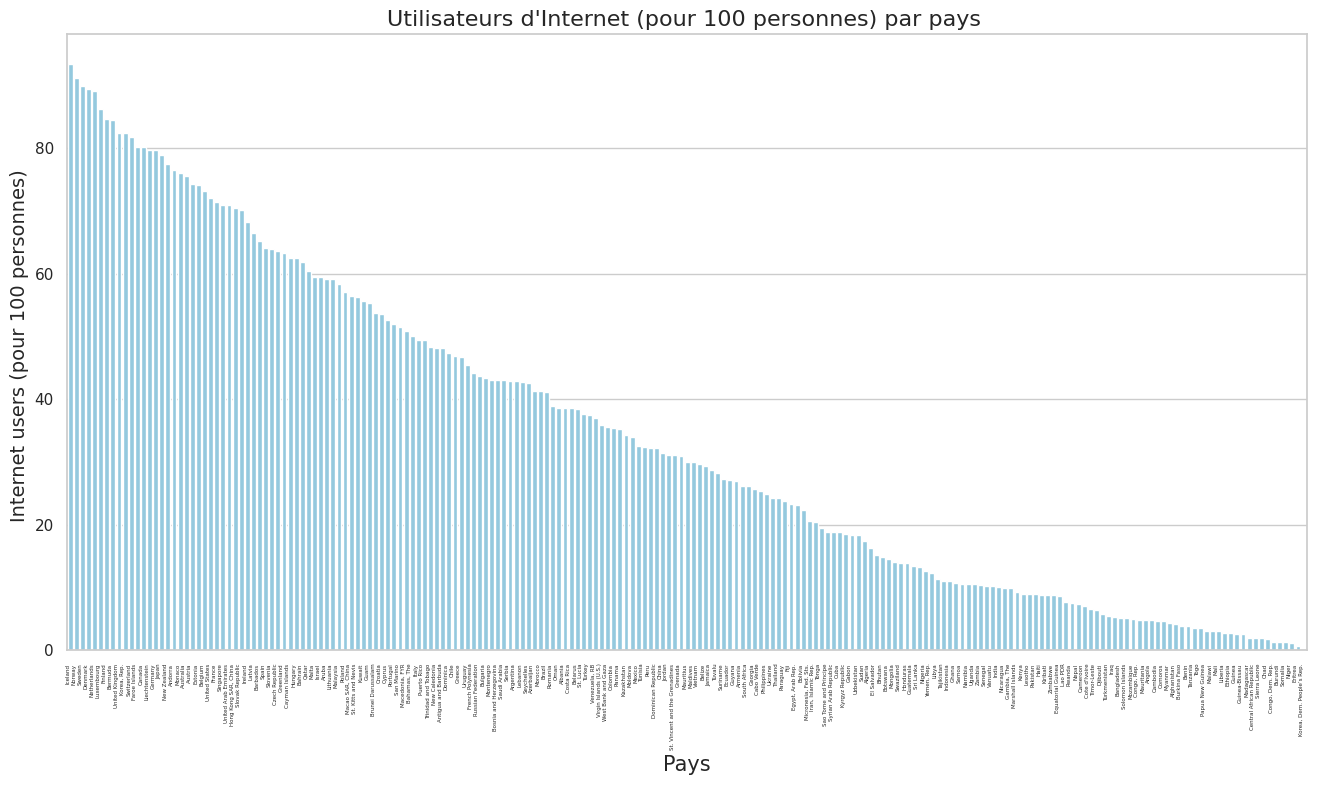

In [538]:
#tri du dataframe en fonction de la colonne 'Internet users (per 100 people)' de manière décroissante
internet_users = internet_users.sort_values(by='Internet users (per 100 people)', ascending=False)

#configuration du style de seaborn
sns.set(style="whitegrid")

#tracé du graphique à barres avec seaborn et échelle logarithmique sur l'axe y
plt.figure(figsize=(16, 8))
barplot = sns.barplot(x='Country Name', y='Internet users (per 100 people)', data=internet_users, color='skyblue')


#rotation des étiquettes sur l'axe x pour une meilleure lisibilité
barplot.set_xticks(barplot.get_xticks())
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, ha='right', fontsize=4)

#ajout de titres et d'étiquettes
plt.title('Utilisateurs d\'Internet (pour 100 personnes) par pays ', fontsize=16)
plt.xlabel('Pays', fontsize=15)
plt.ylabel('Internet users (pour 100 personnes) ', fontsize=14)

#affichage du graphique
plt.show()

### Indicateur *Personal computer (per 100 people)*

In [539]:
personal_computer = df_info.loc[:, ['Country Name', "Personal computers (per 100 people)"]]

personal_computer = personal_computer.dropna(subset=['Personal computers (per 100 people)'], how='all')

personal_computer = personal_computer.sort_values(by='Personal computers (per 100 people)', ascending = False)

personal_computer.head(40)

Country Name  Personal computers (per 100 people)
35                 Canada                                   91
210           Switzerland                                   91
156           Netherlands                                   88
209                Sweden                                   86
182            San Marino                                   81
228         United States                                   79
227        United Kingdom                                   78
189             Singapore                                   69
93   Hong Kong SAR, China                                   66
129            Luxembourg                                   66
53                Denmark                                   66
78                Germany                                   62
164                Norway                                   61
73                 France                                   61
12                Austria                                   61
111           Korea, Rep.                                   56
100               Ireland                                   56
15                Bahrain                                   54
158           New Zealand                                   51
95                Iceland                                   51
72                Finland                                   50
191       Slovak Republic                                   47
192              Slovenia                                   41
64                Estonia                                   38
19                Belgium                                   38
184          Saudi Arabia                                   37
130      Macao SAR, China                                   37
103                 Italy                                   37
198                 Spain                                   34
118                Latvia                                   30
51                 Cyprus                                   29
131        Macedonia, FYR                                   28
52         Czech Republic                                   27
226  United Arab Emirates                                   27
113                Kuwait                                   26
46             Costa Rica                                   23
134              Malaysia                                   22
125             Lithuania                                   22
186                Serbia                                   21
148              Mongolia                                   20

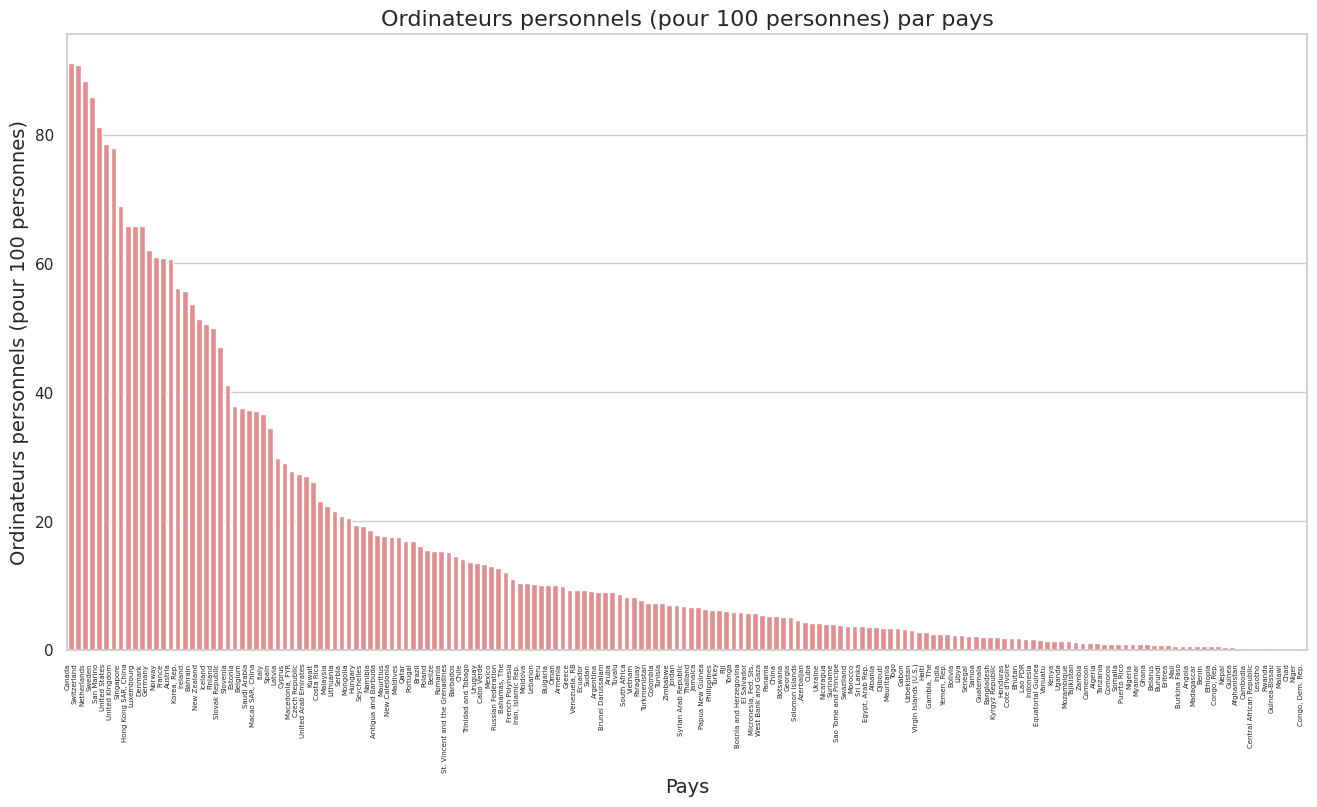

In [540]:
#tri du dataframe en fonction de la colonne 'Personal computer (per 100 people)' de manière décroissante
personal_computer = personal_computer.sort_values(by='Personal computers (per 100 people)', ascending=False)

#configuration du style de seaborn
sns.set(style="whitegrid")

#tracé du graphique à barres avec seaborn
plt.figure(figsize=(16, 8))
barplot = sns.barplot(x='Country Name', y='Personal computers (per 100 people)', data=personal_computer, color='lightcoral')

#rotation des étiquettes sur l'axe x pour une meilleure lisibilité
barplot.set_xticks(barplot.get_xticks())
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, ha='right', fontsize=5)

#ajout de titres et d'étiquettes
plt.title('Ordinateurs personnels (pour 100 personnes) par pays', fontsize=16)
plt.xlabel('Pays', fontsize=14)
plt.ylabel('Ordinateurs personnels (pour 100 personnes)', fontsize=14)

#affichage du graphique
plt.show()

### Indicateur *Youth literacy rate, population 15-24 years, both sexes (%)*

In [541]:
literacy_15_24 = df_info.loc[:, ['Country Name', "Youth literacy rate, population 15-24 years, both sexes (%)"]]

literacy_15_24 = literacy_15_24.dropna(subset=['Youth literacy rate, population 15-24 years, both sexes (%)'], how='all')

literacy_15_24 = literacy_15_24.sort_values(by='Youth literacy rate, population 15-24 years, both sexes (%)', ascending = False)

literacy_15_24.tail(60)

Country Name  \
92                   Honduras   
226      United Arab Emirates   
88                     Guyana   
208                 Swaziland   
85                  Guatemala   
2                     Algeria   
153                   Namibia   
240                  Zimbabwe   
75                      Gabon   
183     Sao Tome and Principe   
60           Egypt, Arab Rep.   
33                   Cambodia   
159                 Nicaragua   
63                    Eritrea   
79                      Ghana   
224                    Uganda   
121                   Lesotho   
155                     Nepal   
108                     Kenya   
96                      India   
150                   Morocco   
213                  Tanzania   
34                   Cameroon   
45                Congo, Rep.   
23                     Bhutan   
216                      Togo   
180                    Rwanda   
215               Timor-Leste   
115                   Lao PDR   
5                      Angola   
239                    Zambia   
44           Congo, Dem. Rep.   
133                    Malawi   
89                      Haiti   
43                    Comoros   
132                Madagascar   
31                    Burundi   
167                  Pakistan   
151                Mozambique   
161                   Nigeria   
206                     Sudan   
16                 Bangladesh   
76                Gambia, The   
87              Guinea-Bissau   
185                   Senegal   
188              Sierra Leone   
139                Mauritania   
99                       Iraq   
47              Cote d'Ivoire   
65                   Ethiopia   
122                   Liberia   
21                      Benin   
0                 Afghanistan   
136                      Mali   
86                     Guinea   
38                       Chad   
30               Burkina Faso   
197               South Sudan   
37   Central African Republic   
160                     Niger   

     Youth literacy rate, population 15-24 years, both sexes (%)  
92                                                  95            
226                                                 95            
88                                                  95            
208                                                 94            
85                                                  93            
2                                                   93            
153                                                 91            
240                                                 91            
75                                                  89            
183                                                 88            
60                                                  88            
33                                                  87            
159                                                 87            
63                                                  87            
79                                                  86            
224                                                 85            
121                                                 85            
155                                                 85            
108                                                 84            
96                                                  84            
150                                                 83            
213                                                 82            
34                                                  82            
45                                                  81            
23                                                  81            
216                                                 81            
180                                                 80            
215                                                 80            
115                                                 78      

### Indicateur *Expenditure on education as % of total government expenditure (%)*

In [542]:
education_expenditure = df_info.loc[:, ['Country Name', "Expenditure on education as % of total government expenditure (%)"]]

education_expenditure = education_expenditure.dropna(subset=['Expenditure on education as % of total government expenditure (%)'], how='all')

education_expenditure = education_expenditure.sort_values(by='Expenditure on education as % of total government expenditure (%)', ascending = False)

education_expenditure.head(60)

Country Name  \
121                         Lesotho   
65                         Ethiopia   
219                         Tunisia   
79                            Ghana   
153                         Namibia   
26                         Botswana   
240                        Zimbabwe   
159                       Nicaragua   
46                       Costa Rica   
185                         Senegal   
20                           Belize   
47                    Cote d'Ivoire   
176                     Puerto Rico   
208                       Swaziland   
85                        Guatemala   
232                         Vanuatu   
93             Hong Kong SAR, China   
221                    Turkmenistan   
10                            Aruba   
142           Micronesia, Fed. Sts.   
108                           Kenya   
21                            Benin   
171                        Paraguay   
146                         Moldova   
184                    Saudi Arabia   
151                      Mozambique   
43                          Comoros   
54                         Djibouti   
24                          Bolivia   
98               Iran, Islamic Rep.   
155                           Nepal   
214                        Thailand   
211            Syrian Arab Republic   
189                       Singapore   
141                          Mexico   
92                         Honduras   
195                    South Africa   
203  St. Vincent and the Grenadines   
193                 Solomon Islands   
160                           Niger   
104                         Jamaica   
134                        Malaysia   
216                            Togo   
45                      Congo, Rep.   
30                     Burkina Faso   
132                      Madagascar   
213                        Tanzania   
114                 Kyrgyz Republic   
34                         Cameroon   
40                            Chile   
136                            Mali   
234                         Vietnam   
158                     New Zealand   
150                         Morocco   
71                             Fiji   
133                          Malawi   
97                        Indonesia   
23                           Bhutan   
32                       Cabo Verde   
61                      El Salvador   

     Expenditure on education as % of total government expenditure (%)  
121                                                 28                  
65                                                  27                  
219                                                 25                  
79                                                  25                  
153                                                 24                  
26                                                  24                  
240                                                 24                  
159                                                 23                  
46                                                  22                  
185                                                 22                  
20                                                  22                  
47                                                  22                  
176                                                 22                  
208                                                 21                  
85                                                  21                  
232                                                 21                  
93                                                  21                  
221                                                 21                  
10                                                  21                  
142                                                 21                  
108                                                 21                  
21                                   

### Indicateur *Population growth (annual %)*

In [543]:
population_growth = df_info.loc[:, ['Country Name', "Population growth (annual %)"]]

population_growth = population_growth.dropna(subset=['Population growth (annual %)'], how='all')

population_growth = population_growth.sort_values(by='Population growth (annual %)', ascending = False)

population_growth.tail(60)

Country Name  Population growth (annual %)
111                     Korea, Rep.                             1
217                           Tonga                             1
41                            China                             1
112                          Kosovo                             1
10                            Aruba                             1
12                          Austria                             0
214                        Thailand                             0
218             Trinidad and Tobago                             0
103                           Italy                             0
104                         Jamaica                             0
211            Syrian Arab Republic                             0
61                      El Salvador                             0
53                          Denmark                             0
72                          Finland                             0
17                         Barbados                             0
83                          Grenada                             0
156                     Netherlands                             0
55                         Dominica                             0
52                   Czech Republic                             0
140                       Mauritius                             0
192                        Slovenia                             0
230                         Uruguay                             0
22                          Bermuda                             0
84                             Guam                             0
4                           Andorra                             0
88                           Guyana                             0
138                Marshall Islands                             0
49                             Cuba                             0
70                    Faroe Islands                             0
149                      Montenegro                             0
131                  Macedonia, FYR                             0
191                 Slovak Republic                             0
203  St. Vincent and the Grenadines                             0
179              Russian Federation                             0
105                           Japan                            -0
174                          Poland                            -0
78                          Germany                            -0
175                        Portugal                            -0
81                           Greece                            -0
146                         Moldova                            -0
82                        Greenland                            -0
142           Micronesia, Fed. Sts.                            -0
18                          Belarus                            -0
48                          Croatia                            -0
94                          Hungary                            -0
9                           Armenia                            -0
64                          Estonia                            -0
235           Virgin Islands (U.S.)                            -0
1                           Albania                            -0
225                         Ukraine                            -0
186                          Serbia                            -0
3                    American Samoa                            -1
25           Bosnia and Herzegovina                            -1
29                         Bulgaria                            -1
178                         Romania                            -1
176                     Puerto Rico                            -1
77                          Georgia                            -1
118                          Latvia                            -1
125                       Lithuania                            -1
163        Northern Mariana Islands                            

### Indicateur étudiants

*Population of the official age for secondary education, both sexes (number)*

*Population of the official age for tertiary education, both sexes (number)*

In [544]:
population_official_15_24 = df_info.loc[:, ['Country Name', "Population of the official age for secondary education, both sexes (number)", "Population of the official age for tertiary education, both sexes (number)"]]

population_official_15_24 = population_official_15_24.dropna(subset=['Population of the official age for secondary education, both sexes (number)', 'Population of the official age for tertiary education, both sexes (number)'], how='all')

population_official_15_24['Population officiel 15-24'] = population_official_15_24[['Population of the official age for secondary education, both sexes (number)', 'Population of the official age for tertiary education, both sexes (number)']].sum(axis=1)

population_official_15_24 = population_official_15_24.drop(['Population of the official age for secondary education, both sexes (number)', 'Population of the official age for tertiary education, both sexes (number)'], axis=1)

population_official_15_24 = population_official_15_24.sort_values(by='Population officiel 15-24', ascending = False)

population_official_15_24




Country Name  Population officiel 15-24
96                 India                  285473535
41                 China                  236830529
97             Indonesia                   47565774
228        United States                   47275754
167             Pakistan                   44427925
..                   ...                        ...
200  St. Kitts and Nevis                       9067
124        Liechtenstein                       5159
182           San Marino                       3958
168                Palau                       3420
223               Tuvalu                       2528

[195 rows x 2 columns]

### Indicateur *Percentage of population age 20-24 with secondary schooling. Completed*

In [545]:
df_info

Country Name Country Code                      Region  \
0              Afghanistan          AFG                  South Asia   
1                  Albania          ALB       Europe & Central Asia   
2                  Algeria          DZA  Middle East & North Africa   
3           American Samoa          ASM         East Asia & Pacific   
4                  Andorra          AND       Europe & Central Asia   
..                     ...          ...                         ...   
235  Virgin Islands (U.S.)          VIR   Latin America & Caribbean   
236     West Bank and Gaza          PSE  Middle East & North Africa   
238            Yemen, Rep.          YEM  Middle East & North Africa   
239                 Zambia          ZMB          Sub-Saharan Africa   
240               Zimbabwe          ZWE          Sub-Saharan Africa   

             Income Group  \
0              Low income   
1     Upper middle income   
2     Upper middle income   
3     Upper middle income   
4    High income: nonOECD   
..                    ...   
235  High income: nonOECD   
236   Lower middle income   
238   Lower middle income   
239   Lower middle income   
240            Low income   

     Barro-Lee: Average years of primary schooling, age 15-19, total  \
0                                                    3                 
1                                                    6                 
2                                                    5                 
3                                                  NaN                 
4                                                  NaN                 
..                                                 ...                 
235                                                NaN                 
236                                                NaN                 
238                                                  4                 
239                                                  6                 
240                                                  7                 

     Barro-Lee: Average years of primary schooling, age 20-24, total  \
0                                                    3                 
1                                                    8                 
2                                                    5                 
3                                                  NaN                 
4                                                  NaN                 
..                                                 ...                 
235                                                NaN                 
236                                                NaN                 
238                                                  3                 
239                                                  6                 
240                                                  7                 

     Barro-Lee: Percentage of population age 15-19 with primary schooling. Completed Primary  \
0                                                   17                                         
1                                                    7                                         
2                                                   38                                         
3                                                  NaN                                         
4                                                  NaN                                         
..                                                 ...                                         
235                                                NaN                                         
236                                                NaN                                         
238                                                 18                                         
239                                                 28                                         
240                       

In [546]:
secondaire_complet = df_info.loc[:, ['Country Name', "Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary"]]

secondaire_complet = secondaire_complet.dropna(subset=['Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary'], how='all')

secondaire_complet = secondaire_complet.sort_values(by='Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary', ascending = False)

secondaire_complet.head(60)

Country Name  \
52         Czech Republic   
125             Lithuania   
186                Serbia   
102                Israel   
11              Australia   
192              Slovenia   
12                Austria   
209                Sweden   
72                Finland   
114       Kyrgyz Republic   
103                 Italy   
81                 Greece   
78                Germany   
107            Kazakhstan   
94                Hungary   
48                Croatia   
174                Poland   
40                  Chile   
191       Slovak Republic   
212            Tajikistan   
218   Trinidad and Tobago   
178               Romania   
195          South Africa   
71                   Fiji   
19                Belgium   
156           Netherlands   
29               Bulgaria   
189             Singapore   
146               Moldova   
64                Estonia   
73                 France   
210           Switzerland   
51                 Cyprus   
140             Mauritius   
227        United Kingdom   
184          Saudi Arabia   
130      Macao SAR, China   
100               Ireland   
171              Paraguay   
53                Denmark   
164                Norway   
129            Luxembourg   
8               Argentina   
172                  Peru   
35                 Canada   
226  United Arab Emirates   
42               Colombia   
9                 Armenia   
93   Hong Kong SAR, China   
217                 Tonga   
104               Jamaica   
88                 Guyana   
1                 Albania   
175              Portugal   
27                 Brazil   
134              Malaysia   
15                Bahrain   
56     Dominican Republic   
20                 Belize   
233         Venezuela, RB   

     Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary  
52                                                  86                                            
125                                                 74                                            
186                                                 74                                            
102                                                 74                                            
11                                                  74                                            
192                                                 74                                            
12                                                  72                                            
209                                                 72                                            
72                                                  71                                            
114                                                 70                                            
103                                                 69                                            
81                                                  68                                            
78                                                  68                                            
107                                                 67                                            
94                                                  67                                            
48                                                  66                                            
174                                                 65                                            
40                                                  64                                            
191                                                 64                                            
212                                                 63                                            
218                                                 63                                            
178                                                 62           

In [547]:
##merge des df indics

df_indics = pd.merge(pays_habitants, population_official_15_24, on= 'Country Name', how='outer')
df_indics = pd.merge(df_indics,  internet_users, on = "Country Name", how='outer')
df_indics = pd.merge(df_indics,  personal_computer, on = "Country Name", how='outer')
df_indics = pd.merge(df_indics,  literacy_15_24, on = "Country Name", how='outer')
df_indics = pd.merge(df_indics,  population_growth, on = "Country Name", how='outer')
df_indics = pd.merge(df_indics,  secondaire_complet, on = "Country Name", how='outer')
df_indics = pd.merge(df_indics, education_expenditure, on = "Country Name", how='outer')
df_indics.isna().sum(axis = 0)

Country Name                                                                                    0
Population, total                                                                               0
Population officiel 15-24                                                                      19
Internet users (per 100 people)                                                                11
Personal computers (per 100 people)                                                            40
Youth literacy rate, population 15-24 years, both sexes (%)                                    74
Population growth (annual %)                                                                    0
Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary    70
Expenditure on education as % of total government expenditure (%)                              47
dtype: int64

In [548]:
df_indics.columns

Index(['Country Name', 'Population, total', 'Population officiel 15-24',
       'Internet users (per 100 people)',
       'Personal computers (per 100 people)',
       'Youth literacy rate, population 15-24 years, both sexes (%)',
       'Population growth (annual %)',
       'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary',
       'Expenditure on education as % of total government expenditure (%)'],
      dtype='object')

In [549]:
mat_corr = df_indics.loc[: , ['Population, total', 'Population officiel 15-24',
       'Internet users (per 100 people)',
       'Personal computers (per 100 people)',
       'Youth literacy rate, population 15-24 years, both sexes (%)',
       'Population growth (annual %)', 
       'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary', 
       'Expenditure on education as % of total government expenditure (%)']].corr()

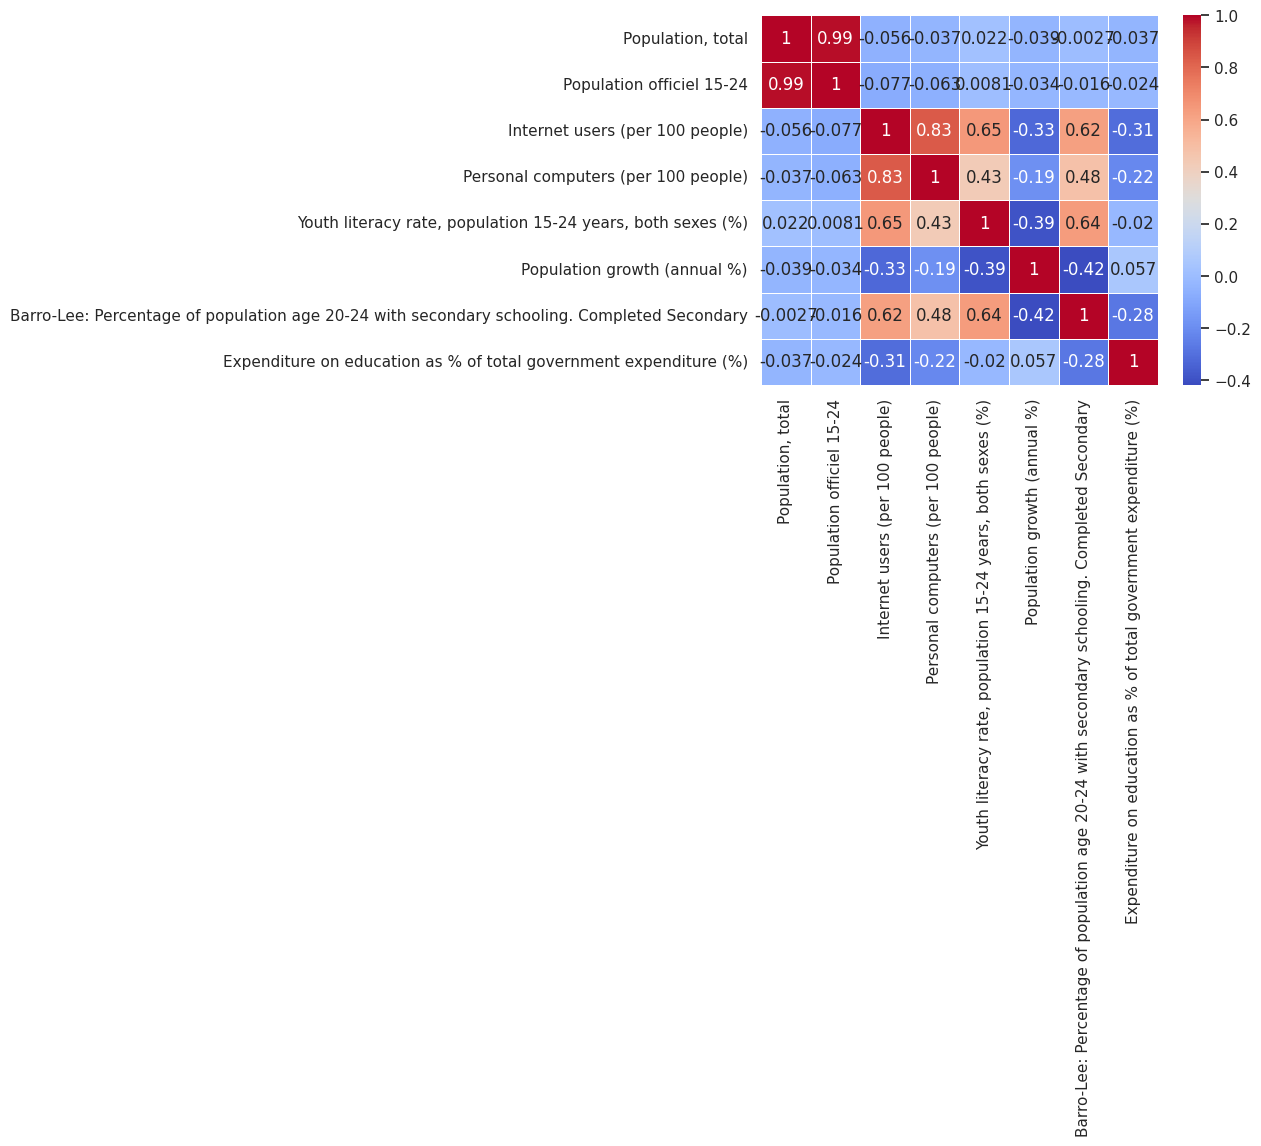

In [550]:
import seaborn as sns
import matplotlib.pyplot as plt

#créer une heatmap de la matrice de corrélation
sns.heatmap(mat_corr, annot=True, cmap='coolwarm', linewidths=.5)

#afficher la heatmap
plt.show()

### Création du df final df_indics

In [551]:
df_info

Country Name Country Code                      Region  \
0              Afghanistan          AFG                  South Asia   
1                  Albania          ALB       Europe & Central Asia   
2                  Algeria          DZA  Middle East & North Africa   
3           American Samoa          ASM         East Asia & Pacific   
4                  Andorra          AND       Europe & Central Asia   
..                     ...          ...                         ...   
235  Virgin Islands (U.S.)          VIR   Latin America & Caribbean   
236     West Bank and Gaza          PSE  Middle East & North Africa   
238            Yemen, Rep.          YEM  Middle East & North Africa   
239                 Zambia          ZMB          Sub-Saharan Africa   
240               Zimbabwe          ZWE          Sub-Saharan Africa   

             Income Group  \
0              Low income   
1     Upper middle income   
2     Upper middle income   
3     Upper middle income   
4    High income: nonOECD   
..                    ...   
235  High income: nonOECD   
236   Lower middle income   
238   Lower middle income   
239   Lower middle income   
240            Low income   

     Barro-Lee: Average years of primary schooling, age 15-19, total  \
0                                                    3                 
1                                                    6                 
2                                                    5                 
3                                                  NaN                 
4                                                  NaN                 
..                                                 ...                 
235                                                NaN                 
236                                                NaN                 
238                                                  4                 
239                                                  6                 
240                                                  7                 

     Barro-Lee: Average years of primary schooling, age 20-24, total  \
0                                                    3                 
1                                                    8                 
2                                                    5                 
3                                                  NaN                 
4                                                  NaN                 
..                                                 ...                 
235                                                NaN                 
236                                                NaN                 
238                                                  3                 
239                                                  6                 
240                                                  7                 

     Barro-Lee: Percentage of population age 15-19 with primary schooling. Completed Primary  \
0                                                   17                                         
1                                                    7                                         
2                                                   38                                         
3                                                  NaN                                         
4                                                  NaN                                         
..                                                 ...                                         
235                                                NaN                                         
236                                                NaN                                         
238                                                 18                                         
239                                                 28                                         
240                       

In [552]:
df_indics

Country Name  Population, total  Population officiel 15-24  \
0                       China         1337630909                  236830529   
1                       India         1229086611                  285473535   
2               United States          308788011                   47275754   
3                   Indonesia          242498199                   47565774   
4                      Brazil          196678113                   40833210   
..                        ...                ...                        ...   
209                San Marino              31123                       3958   
210  Turks and Caicos Islands              30800                        NaN   
211  St. Martin (French part)              29722                        NaN   
212                     Palau              20521                       3420   
213                    Tuvalu              10527                       2528   

     Internet users (per 100 people)  Personal computers (per 100 people)  \
0                                 31                                    5   
1                                 10                                    2   
2                                 72                                   79   
3                                 11                                    2   
4                                 41                                   16   
..                               ...                                  ...   
209                               52                                   81   
210                              NaN                                  NaN   
211                              NaN                                  NaN   
212                              NaN                                  NaN   
213                               28                                    9   

     Youth literacy rate, population 15-24 years, both sexes (%)  \
0                                                  100             
1                                                   84             
2                                                  NaN             
3                                                   99             
4                                                   98             
..                                                 ...             
209                                                NaN             
210                                                NaN             
211                                                NaN             
212                                                 99             
213                                                NaN             

     Population growth (annual %)  \
0                               1   
1                               1   
2                               1   
3                               1   
4                               1   
..                            ...   
209                             1   
210                             3   
211                             1   
212                             1   
213                             1   

     Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary  \
0                                                   41                                             
1                                                   36                                             
2                                                   37                                             
3                                                   35                                             
4                                                   45                                             
..                                                 ...                                             
209                                                NaN                                             
210                                                NaN                           

In [553]:
df_base = df_info.loc[:, ['Country Name', 'Country Code', 'Region', 'Income Group']]
df_base.head(2)

Country Name Country Code                 Region         Income Group
0  Afghanistan          AFG             South Asia           Low income
1      Albania          ALB  Europe & Central Asia  Upper middle income

In [554]:
#fusion du df_indics et du df_base afin de rajouter les codes pays, région et income group
df_indics = df_indics.merge(df_base[['Country Name', 'Country Code', 'Region', 'Income Group']],
                            on='Country Name', how='left')
df_indics.head(3)

Country Name  Population, total  Population officiel 15-24  \
0          China         1337630909                  236830529   
1          India         1229086611                  285473535   
2  United States          308788011                   47275754   

   Internet users (per 100 people)  Personal computers (per 100 people)  \
0                               31                                    5   
1                               10                                    2   
2                               72                                   79   

   Youth literacy rate, population 15-24 years, both sexes (%)  \
0                                                100             
1                                                 84             
2                                                NaN             

   Population growth (annual %)  \
0                             1   
1                             1   
2                             1   

   Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary  \
0                                                 41                                             
1                                                 36                                             
2                                                 37                                             

   Expenditure on education as % of total government expenditure (%)  \
0                                                NaN                   
1                                                 13                   
2                                                 14                   

  Country Code               Region         Income Group  
0          CHN  East Asia & Pacific  Upper middle income  
1          IND           South Asia  Lower middle income  
2          USA        North America    High income: OECD

In [555]:
#déplacement des 3 dernières colonnes après la colonne Country Name
df_indics = df_indics[['Country Name', 'Country Code', 'Region', 'Income Group'] + [col for col in df_indics.columns if col not in ['Country Name', 'Country Code', 'Region', 'Income Group']]]
df_indics.head(2)

Country Name Country Code               Region         Income Group  \
0        China          CHN  East Asia & Pacific  Upper middle income   
1        India          IND           South Asia  Lower middle income   

   Population, total  Population officiel 15-24  \
0         1337630909                  236830529   
1         1229086611                  285473535   

   Internet users (per 100 people)  Personal computers (per 100 people)  \
0                               31                                    5   
1                               10                                    2   

   Youth literacy rate, population 15-24 years, both sexes (%)  \
0                                                100             
1                                                 84             

   Population growth (annual %)  \
0                             1   
1                             1   

   Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary  \
0                                                 41                                             
1                                                 36                                             

   Expenditure on education as % of total government expenditure (%)  
0                                                NaN                  
1                                                 13

In [556]:
df_indics.describe()

Population, total  Population officiel 15-24  \
count                214                        195   
mean            32282458                    7046402   
std            128429538                   27300726   
min                10527                       2528   
25%               854254                     303303   
50%              6129723                    1355371   
75%             20502150                    5188103   
max           1337630909                  285473535   

       Internet users (per 100 people)  Personal computers (per 100 people)  \
count                              203                                  174   
mean                                34                                   16   
std                                 26                                   22   
min                                  0                                    0   
25%                                 10                                    2   
50%                                 30                                    7   
75%                                 54                                   18   
max                                 93                                   91   

       Youth literacy rate, population 15-24 years, both sexes (%)  \
count                                                140             
mean                                                  87             
std                                                   18             
min                                                   30             
25%                                                   81             
50%                                                   98             
75%                                                   99             
max                                                  100             

       Population growth (annual %)  \
count                           214   
mean                              1   
std                               1   
min                              -2   
25%                               0   
50%                               1   
75%                               2   
max                              11   

       Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary  \
count                                                144                                             
mean                                                  37                                             
std                                                   21                                             
min                                                    1                                             
25%                                                   18                                             
50%                                                   37                                             
75%                                                   53                                             
max                                                   86                                             

       Expenditure on education as % of total government expenditure (%)  
count                                                167                  
mean                                                  15                  
std                                                    5                  
min                                                    3                  
25%                                                   11                  
50%                                                   14                  
75%                                                   18                  
max                                                   28

In [557]:
df_indics.head(20)

Country Name Country Code                      Region  \
0                China          CHN         East Asia & Pacific   
1                India          IND                  South Asia   
2        United States          USA               North America   
3            Indonesia          IDN         East Asia & Pacific   
4               Brazil          BRA   Latin America & Caribbean   
5             Pakistan          PAK                  South Asia   
6              Nigeria          NGA          Sub-Saharan Africa   
7           Bangladesh          BGD                  South Asia   
8   Russian Federation          RUS       Europe & Central Asia   
9                Japan          JPN         East Asia & Pacific   
10              Mexico          MEX   Latin America & Caribbean   
11         Philippines          PHL         East Asia & Pacific   
12            Ethiopia          ETH          Sub-Saharan Africa   
13             Vietnam          VNM         East Asia & Pacific   
14    Egypt, Arab Rep.          EGY  Middle East & North Africa   
15             Germany          DEU       Europe & Central Asia   
16  Iran, Islamic Rep.          IRN  Middle East & North Africa   
17              Turkey          TUR       Europe & Central Asia   
18            Thailand          THA         East Asia & Pacific   
19              France          FRA       Europe & Central Asia   

            Income Group  Population, total  Population officiel 15-24  \
0    Upper middle income         1337630909                  236830529   
1    Lower middle income         1229086611                  285473535   
2      High income: OECD          308788011                   47275754   
3    Lower middle income          242498199                   47565774   
4    Upper middle income          196678113                   40833210   
5    Lower middle income          171029651                   44427925   
6    Lower middle income          159176758                   35503943   
7             Low income          152287668                   37624033   
8   High income: nonOECD          143212388                   22345440   
9      High income: OECD          127739273                   13929809   
10   Upper middle income          117223070                   24849102   
11   Lower middle income           93865521                   17336325   
12            Low income           87954588                   19951607   
13   Lower middle income           86988109                   20044606   
14   Lower middle income           84646359                   18015968   
15     High income: OECD           81537918                   12148455   
16   Upper middle income           74721230                   17521878   
17   Upper middle income           72676271                   15272672   
18   Upper middle income           67152112                   10688869   
19     High income: OECD           64989424                    9221361   

    Internet users (per 100 people)  Personal computers (per 100 people)  \
0                                31                                    5   
1                                10                                    2   
2                                72                                   79   
3                                11                                    2   
4                                41                                   16   
5                                 9                                  NaN   
6                                13                                    1   
7                                 5                                    2   
8                                44                                   13   
9                                79                                  NaN   
10                               33                                   13   
11                               25                                    6   
12                                3                        

In [558]:
df_indics.columns.to_list()

['Country Name',
 'Country Code',
 'Region',
 'Income Group',
 'Population, total',
 'Population officiel 15-24',
 'Internet users (per 100 people)',
 'Personal computers (per 100 people)',
 'Youth literacy rate, population 15-24 years, both sexes (%)',
 'Population growth (annual %)',
 'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary',
 'Expenditure on education as % of total government expenditure (%)']

## Traitement des valeurs manquantes

In [559]:
#remplacement des valeurs NaN par la moyenne par groupe identique selon critère Region et Income Group

#liste des colonnes quantitatives avec des valeurs manquantes
colonnes_quantitatives = [
    'Population, total',
    'Population officiel 15-24',
    'Internet users (per 100 people)',
    'Personal computers (per 100 people)',
    'Youth literacy rate, population 15-24 years, both sexes (%)',
    'Population growth (annual %)',
    'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary', 
    'Expenditure on education as % of total government expenditure (%)'
]

#remplacement des valeurs NaN par la moyenne par groupe pour chaque colonne
for colonne in colonnes_quantitatives:
    df_indics[colonne] = df_indics.groupby(['Region', 'Income Group'])[colonne].transform(lambda x: x.fillna(x.mean()))
    #impression du nombre de valeurs manquantes par colonnes
    print(df_indics.loc[:, colonne].isna().sum())


0
0
0
2
10
0
2
2


In [560]:
df_indics.columns.to_list()

['Country Name',
 'Country Code',
 'Region',
 'Income Group',
 'Population, total',
 'Population officiel 15-24',
 'Internet users (per 100 people)',
 'Personal computers (per 100 people)',
 'Youth literacy rate, population 15-24 years, both sexes (%)',
 'Population growth (annual %)',
 'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary',
 'Expenditure on education as % of total government expenditure (%)']

In [561]:
df_indics

Country Name Country Code                     Region  \
0                       China          CHN        East Asia & Pacific   
1                       India          IND                 South Asia   
2               United States          USA              North America   
3                   Indonesia          IDN        East Asia & Pacific   
4                      Brazil          BRA  Latin America & Caribbean   
..                        ...          ...                        ...   
209                San Marino          SMR      Europe & Central Asia   
210  Turks and Caicos Islands          TCA  Latin America & Caribbean   
211  St. Martin (French part)          MAF  Latin America & Caribbean   
212                     Palau          PLW        East Asia & Pacific   
213                    Tuvalu          TUV        East Asia & Pacific   

             Income Group  Population, total  Population officiel 15-24  \
0     Upper middle income         1337630909                  236830529   
1     Lower middle income         1229086611                  285473535   
2       High income: OECD          308788011                   47275754   
3     Lower middle income          242498199                   47565774   
4     Upper middle income          196678113                   40833210   
..                    ...                ...                        ...   
209  High income: nonOECD              31123                       3958   
210  High income: nonOECD              30800                     176215   
211  High income: nonOECD              29722                     176215   
212   Upper middle income              20521                       3420   
213   Upper middle income              10527                       2528   

     Internet users (per 100 people)  Personal computers (per 100 people)  \
0                                 31                                    5   
1                                 10                                    2   
2                                 72                                   79   
3                                 11                                    2   
4                                 41                                   16   
..                               ...                                  ...   
209                               52                                   81   
210                               52                                   11   
211                               52                                   11   
212                               28                                    9   
213                               28                                    9   

     Youth literacy rate, population 15-24 years, both sexes (%)  \
0                                                  100             
1                                                   84             
2                                                  NaN             
3                                                   99             
4                                                   98             
..                                                 ...             
209                                                100             
210                                                 99             
211                                                 99             
212                                                 99             
213                                                 99             

     Population growth (annual %)  \
0                               1   
1                               1   
2                               1   
3                               1   
4                               1   
..                            ...   
209                             1   
210                             3   
211                             1   
212                             1   
213                             1   

     Barro-Lee: Percentage of population age 20-24 w

In [562]:
#remplacement valeur nan présente dans une colonne par la moyenne de la colonne afin d'obtenir un score synthétique sans impact 

#extraction liste nom de colonnes
df_indics.columns.to_list()

#sélection des colonnes à traiter
colonnes_a_traiter = [
    'Population, total',
    'Population officiel 15-24',
    'Internet users (per 100 people)',
    'Personal computers (per 100 people)',
    'Youth literacy rate, population 15-24 years, both sexes (%)',
    'Population growth (annual %)',
    'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary', 
    'Expenditure on education as % of total government expenditure (%)'
]

#remplacement des valeurs NaN par la moyenne de chaque colonne
for colonne in colonnes_a_traiter:
    moyenne_colonne = df_indics[colonne].mean()
    df_indics[colonne].fillna(moyenne_colonne, inplace=True)

#affichage du dataframe mis à jour
df_indics

Country Name Country Code                     Region  \
0                       China          CHN        East Asia & Pacific   
1                       India          IND                 South Asia   
2               United States          USA              North America   
3                   Indonesia          IDN        East Asia & Pacific   
4                      Brazil          BRA  Latin America & Caribbean   
..                        ...          ...                        ...   
209                San Marino          SMR      Europe & Central Asia   
210  Turks and Caicos Islands          TCA  Latin America & Caribbean   
211  St. Martin (French part)          MAF  Latin America & Caribbean   
212                     Palau          PLW        East Asia & Pacific   
213                    Tuvalu          TUV        East Asia & Pacific   

             Income Group  Population, total  Population officiel 15-24  \
0     Upper middle income         1337630909                  236830529   
1     Lower middle income         1229086611                  285473535   
2       High income: OECD          308788011                   47275754   
3     Lower middle income          242498199                   47565774   
4     Upper middle income          196678113                   40833210   
..                    ...                ...                        ...   
209  High income: nonOECD              31123                       3958   
210  High income: nonOECD              30800                     176215   
211  High income: nonOECD              29722                     176215   
212   Upper middle income              20521                       3420   
213   Upper middle income              10527                       2528   

     Internet users (per 100 people)  Personal computers (per 100 people)  \
0                                 31                                    5   
1                                 10                                    2   
2                                 72                                   79   
3                                 11                                    2   
4                                 41                                   16   
..                               ...                                  ...   
209                               52                                   81   
210                               52                                   11   
211                               52                                   11   
212                               28                                    9   
213                               28                                    9   

     Youth literacy rate, population 15-24 years, both sexes (%)  \
0                                                  100             
1                                                   84             
2                                                   90             
3                                                   99             
4                                                   98             
..                                                 ...             
209                                                100             
210                                                 99             
211                                                 99             
212                                                 99             
213                                                 99             

     Population growth (annual %)  \
0                               1   
1                               1   
2                               1   
3                               1   
4                               1   
..                            ...   
209                             1   
210                             3   
211                             1   
212                             1   
213                             1   

     Barro-Lee: Percentage of population age 20-24 w

In [563]:
#extraction de la liste des colonnes du df
liste_col = df_indics.columns.to_list()

#sélection des colonnes intéressantes
liste_col = liste_col[4:]

#pour chaque colonnes intéressantes
for col in liste_col:
    #calculer le nombre de valeurs manquantes dans la colonne
    nb_val_manq = df_indics.loc[:,col].isna().sum()
    #afficher le nombre de valeurs manquantes dans la colonne
    print(f"Il y a {nb_val_manq} valeurs manquantes dans la colonne de l'indicateur '{col}'")




Il y a 0 valeurs manquantes dans la colonne de l'indicateur 'Population, total'
Il y a 0 valeurs manquantes dans la colonne de l'indicateur 'Population officiel 15-24'
Il y a 0 valeurs manquantes dans la colonne de l'indicateur 'Internet users (per 100 people)'
Il y a 0 valeurs manquantes dans la colonne de l'indicateur 'Personal computers (per 100 people)'
Il y a 0 valeurs manquantes dans la colonne de l'indicateur 'Youth literacy rate, population 15-24 years, both sexes (%)'
Il y a 0 valeurs manquantes dans la colonne de l'indicateur 'Population growth (annual %)'
Il y a 0 valeurs manquantes dans la colonne de l'indicateur 'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary'
Il y a 0 valeurs manquantes dans la colonne de l'indicateur 'Expenditure on education as % of total government expenditure (%)'


## Etat des lieux avant scoring

Nous nous retrouvons désormais avec un dataframe pandas intitulé *df_indics* qui contient une liste de pays, leur codage sur 3 lettres, la région et le groupe de revenu auxquels ils appartiennent d'une part, et d'autre part une valeur significative ou neutre pour 7 indicateurs. 

Il convient de passer à l'étape suivante, consistant à attribuer un score à chaque pays, sur la base de la valeur renseignée, pour chaque indicateur, en prenant garde à ce que ce score soit représentatif quant à l'impact métier de l'étude. 

Je rappelle que nous avons des indicateurs fortement corrélés :

 - Population, total et Population officiel 15-24

ainsi que

 - Internet users (per 100 people) et Personal computer (per 100 people)

Les autres indicateurs sont peu ou pas corrélés. 

Néanmoins on peut penser à combiner les informations apportées par ces deux indicateurs : 

 - Youth literacy rate, population 15-24 years, both sexes (%)
 - Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary

Enfin, il nous restera deux indicateurs indépendants : 

 - Population growth (annual %)
 - Expenditure on education as % of total government expenditure (%)

Réfléchissons désormais au scoring, et aux intitulés métiers des catégories

In [564]:
deciles = [i / 10 for i in range(1, 10)]
df_indics.describe(percentiles=deciles)

Population, total  Population officiel 15-24  \
count                214                        214   
mean            32282458                    6704812   
std            128429538                   26159010   
min                10527                       2528   
10%               102175                      55324   
20%               405328                     176215   
30%              1643675                     392502   
40%              3687239                     819924   
50%              6129723                    1339485   
60%              9570513                    2297827   
70%             15101867                    3432828   
80%             28332767                    5928333   
90%             61718359                   10619796   
max           1337630909                  285473535   

       Internet users (per 100 people)  Personal computers (per 100 people)  \
count                              214                                  214   
mean                                35                                   16   
std                                 26                                   21   
min                                  0                                    0   
10%                                  4                                    1   
20%                                  9                                    2   
30%                                 13                                    3   
40%                                 23                                    6   
50%                                 31                                    9   
60%                                 41                                   11   
70%                                 49                                   16   
80%                                 59                                   29   
90%                                 74                                   50   
max                                 93                                   91   

       Youth literacy rate, population 15-24 years, both sexes (%)  \
count                                                214             
mean                                                  90             
std                                                   16             
min                                                   30             
10%                                                   67             
20%                                                   85             
30%                                                   90             
40%                                                   97             
50%                                                   98             
60%                                                   99             
70%                                                   99             
80%                                                  100             
90%                                                  100             
max                                                  100             

       Population growth (annual %)  \
count                           214   
mean                              1   
std                               1   
min                              -2   
10%                              -0   
20%                               0   
30%                               1   
40%                               1   
50%                               1   
60%                               2   
70%                               2   
80%                               3   
90%                               3   
max                              11   

       Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary  \
count                                                214                                             
mean                                                  37                                             
std                                                 

In [565]:
#scoring population selon proportion au millionième logarithmique pour aller de 0 à 12 sans trop avantager les poids lourds


df_0indic = df_indics.loc[:, 'Country Name' : 'Income Group']
df_0indic

score_pop = df_indics['Population, total']

tot_hab = score_pop.sum()

score_pop = np.log(score_pop/tot_hab*1000000)

score_pop.head(50)

df_1indic = df_0indic
df_1indic['Population'] = score_pop

df_1indic

Country Name Country Code                     Region  \
0                       China          CHN        East Asia & Pacific   
1                       India          IND                 South Asia   
2               United States          USA              North America   
3                   Indonesia          IDN        East Asia & Pacific   
4                      Brazil          BRA  Latin America & Caribbean   
..                        ...          ...                        ...   
209                San Marino          SMR      Europe & Central Asia   
210  Turks and Caicos Islands          TCA  Latin America & Caribbean   
211  St. Martin (French part)          MAF  Latin America & Caribbean   
212                     Palau          PLW        East Asia & Pacific   
213                    Tuvalu          TUV        East Asia & Pacific   

             Income Group  Population  
0     Upper middle income          12  
1     Lower middle income          12  
2       High income: OECD          11  
3     Lower middle income          10  
4     Upper middle income          10  
..                    ...         ...  
209  High income: nonOECD           2  
210  High income: nonOECD           1  
211  High income: nonOECD           1  
212   Upper middle income           1  
213   Upper middle income           0  

[214 rows x 5 columns]

In [566]:
df_1indic.describe()

Population
count         214
mean            6
std             2
min             0
25%             5
50%             7
75%             8
max            12

In [567]:
#Internet users (per 100 people)

score_tech = df_indics['Internet users (per 100 people)']

score_tech = pd.qcut(score_tech, q=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[0, 1, 2, 3, 4])

df_2indics = pd.concat([df_1indic, score_tech], axis=1)

df_2indics.columns = ['Country Name', 'Country Code', 'Region', 'Income Group', 'Population',
       'Technologie']

df_2indics

Country Name Country Code                     Region  \
0                       China          CHN        East Asia & Pacific   
1                       India          IND                 South Asia   
2               United States          USA              North America   
3                   Indonesia          IDN        East Asia & Pacific   
4                      Brazil          BRA  Latin America & Caribbean   
..                        ...          ...                        ...   
209                San Marino          SMR      Europe & Central Asia   
210  Turks and Caicos Islands          TCA  Latin America & Caribbean   
211  St. Martin (French part)          MAF  Latin America & Caribbean   
212                     Palau          PLW        East Asia & Pacific   
213                    Tuvalu          TUV        East Asia & Pacific   

             Income Group  Population Technologie  
0     Upper middle income          12           2  
1     Lower middle income          12           1  
2       High income: OECD          11           4  
3     Lower middle income          10           1  
4     Upper middle income          10           3  
..                    ...         ...         ...  
209  High income: nonOECD           2           3  
210  High income: nonOECD           1           3  
211  High income: nonOECD           1           3  
212   Upper middle income           1           2  
213   Upper middle income           0           2  

[214 rows x 6 columns]

In [568]:
#alphabétisme et capacité scolaire

literacy = df_indics['Youth literacy rate, population 15-24 years, both sexes (%)']
secondary = df_indics['Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary']
education = ((literacy*secondary))
score_edu = pd.qcut(education, q=[0, 1/7, 2/7, 3/7, 4/7, 5/7, 6/7, 1], labels=[0, 1, 2, 3, 4, 5, 6])

df_3indics = pd.concat([df_2indics, score_edu], axis=1)

df_3indics.columns = ['Country Name', 'Country Code', 'Region', 'Income Group', 'Population','Technologie', 'Education']

df_3indics

Country Name Country Code                     Region  \
0                       China          CHN        East Asia & Pacific   
1                       India          IND                 South Asia   
2               United States          USA              North America   
3                   Indonesia          IDN        East Asia & Pacific   
4                      Brazil          BRA  Latin America & Caribbean   
..                        ...          ...                        ...   
209                San Marino          SMR      Europe & Central Asia   
210  Turks and Caicos Islands          TCA  Latin America & Caribbean   
211  St. Martin (French part)          MAF  Latin America & Caribbean   
212                     Palau          PLW        East Asia & Pacific   
213                    Tuvalu          TUV        East Asia & Pacific   

             Income Group  Population Technologie Education  
0     Upper middle income          12           2         4  
1     Lower middle income          12           1         2  
2       High income: OECD          11           4         3  
3     Lower middle income          10           1         3  
4     Upper middle income          10           3         4  
..                    ...         ...         ...       ...  
209  High income: nonOECD           2           3         5  
210  High income: nonOECD           1           3         3  
211  High income: nonOECD           1           3         3  
212   Upper middle income           1           2         4  
213   Upper middle income           0           2         4  

[214 rows x 7 columns]

In [569]:
#dépenses et croissance

growth = df_indics['Population growth (annual %)']
expenditure = df_indics['Expenditure on education as % of total government expenditure (%)']
future = ((expenditure*growth))

score_future = pd.qcut(future, q=[0, 0.25, 0.5, 0.75, 1], labels=[0, 1, 2, 3])

df_4indics = pd.concat([df_3indics, score_future], axis=1)

df_4indics.columns = ['Country Name', 'Country Code', 'Region', 'Income Group', 'Population','Technologie', 'Education', 'Perspectives']

df_4indics


Country Name Country Code                     Region  \
0                       China          CHN        East Asia & Pacific   
1                       India          IND                 South Asia   
2               United States          USA              North America   
3                   Indonesia          IDN        East Asia & Pacific   
4                      Brazil          BRA  Latin America & Caribbean   
..                        ...          ...                        ...   
209                San Marino          SMR      Europe & Central Asia   
210  Turks and Caicos Islands          TCA  Latin America & Caribbean   
211  St. Martin (French part)          MAF  Latin America & Caribbean   
212                     Palau          PLW        East Asia & Pacific   
213                    Tuvalu          TUV        East Asia & Pacific   

             Income Group  Population Technologie Education Perspectives  
0     Upper middle income          12           2         4            1  
1     Lower middle income          12           1         2            1  
2       High income: OECD          11           4         3            1  
3     Lower middle income          10           1         3            2  
4     Upper middle income          10           3         4            1  
..                    ...         ...         ...       ...          ...  
209  High income: nonOECD           2           3         5            1  
210  High income: nonOECD           1           3         3            3  
211  High income: nonOECD           1           3         3            2  
212   Upper middle income           1           2         4            1  
213   Upper middle income           0           2         4            1  

[214 rows x 8 columns]

## Scoring

 - Population 12 points
 - Technologie 4 points
 - Education 6 points
 - Perspectives 3 points

In [570]:
df_4indics.columns

Index(['Country Name', 'Country Code', 'Region', 'Income Group', 'Population',
       'Technologie', 'Education', 'Perspectives'],
      dtype='object')

In [571]:
df_4indics['Total'] = df_4indics[['Population', 'Technologie', 'Education', 'Perspectives']].sum(axis=1)
df_4indics_sorted = df_4indics.sort_values(by='Total', ascending=False)

In [572]:
df_4indics_sorted.head(60)

Country Name Country Code                      Region  \
51                Australia          AUS         East Asia & Pacific   
15                  Germany          DEU       Europe & Central Asia   
44             Saudi Arabia          SAU  Middle East & North Africa   
0                     China          CHN         East Asia & Pacific   
21           United Kingdom          GBR       Europe & Central Asia   
23             South Africa          ZAF          Sub-Saharan Africa   
2             United States          USA               North America   
114               Singapore          SGP         East Asia & Pacific   
75                  Belgium          BEL       Europe & Central Asia   
4                    Brazil          BRA   Latin America & Caribbean   
87                   Sweden          SWE       Europe & Central Asia   
19                   France          FRA       Europe & Central Asia   
22                    Italy          ITA       Europe & Central Asia   
95                   Israel          ISR  Middle East & North Africa   
96     United Arab Emirates          ARE  Middle East & North Africa   
58                    Chile          CHL   Latin America & Caribbean   
28                    Spain          ESP       Europe & Central Asia   
59              Netherlands          NLD       Europe & Central Asia   
31                Argentina          ARG   Latin America & Caribbean   
32                   Poland          POL       Europe & Central Asia   
36                   Canada          CAN               North America   
39                     Peru          PER   Latin America & Caribbean   
79           Czech Republic          CZE       Europe & Central Asia   
43                 Malaysia          MYS         East Asia & Pacific   
82                  Hungary          HUN       Europe & Central Asia   
89               Azerbaijan          AZE       Europe & Central Asia   
91                  Austria          AUT       Europe & Central Asia   
93              Switzerland          CHE       Europe & Central Asia   
9                     Japan          JPN         East Asia & Pacific   
61               Kazakhstan          KAZ       Europe & Central Asia   
111         Slovak Republic          SVK       Europe & Central Asia   
112                 Finland          FIN       Europe & Central Asia   
115                  Norway          NOR       Europe & Central Asia   
118                 Ireland          IRL       Europe & Central Asia   
3                 Indonesia          IDN         East Asia & Pacific   
74                   Greece          GRC       Europe & Central Asia   
41            Venezuela, RB          VEN   Latin America & Caribbean   
42               Uzbekistan          UZB       Europe & Central Asia   
17                   Turkey          TUR       Europe & Central Asia   
155                 Bahrain          BHR  Middle East & North Africa   
1                     India          IND                  South Asia   
54                  Romania          ROU       Europe & Central Asia   
98                   Jordan          JOR  Middle East & North Africa   
99                   Serbia          SRB       Europe & Central Asia   
101    Hong Kong SAR, China          HKG         East Asia & Pacific   
25              Korea, Rep.          KOR         East Asia & Pacific   
105                Paraguay          PRY   Latin America & Caribbean   
29                 Colombia          COL   Latin America & Caribbean   
10                   Mexico          MEX   Latin America & Caribbean   
109                 Denmark          DNK       Europe & Central Asia   
144                Slovenia          SVN       Europe & Central Asia   
110         Kyrgyz Republic          KGZ       Europe & Central Asia   
11              Philippines          PHL         East Asia & Pacific   
121                 Croatia          HRV       Europe & Central Asia   
13                  Vietnam          VNM         East A

In [573]:
high_income_oecd = df_4indics_sorted[df_4indics_sorted['Income Group'] == 'High income: OECD']
high_income_oecd

Country Name Country Code                      Region  \
51         Australia          AUS         East Asia & Pacific   
15           Germany          DEU       Europe & Central Asia   
21    United Kingdom          GBR       Europe & Central Asia   
2      United States          USA               North America   
75           Belgium          BEL       Europe & Central Asia   
87            Sweden          SWE       Europe & Central Asia   
19            France          FRA       Europe & Central Asia   
22             Italy          ITA       Europe & Central Asia   
95            Israel          ISR  Middle East & North Africa   
58             Chile          CHL   Latin America & Caribbean   
28             Spain          ESP       Europe & Central Asia   
59       Netherlands          NLD       Europe & Central Asia   
32            Poland          POL       Europe & Central Asia   
36            Canada          CAN               North America   
79    Czech Republic          CZE       Europe & Central Asia   
91           Austria          AUT       Europe & Central Asia   
93       Switzerland          CHE       Europe & Central Asia   
9              Japan          JPN         East Asia & Pacific   
111  Slovak Republic          SVK       Europe & Central Asia   
112          Finland          FIN       Europe & Central Asia   
115           Norway          NOR       Europe & Central Asia   
118          Ireland          IRL       Europe & Central Asia   
74            Greece          GRC       Europe & Central Asia   
25       Korea, Rep.          KOR         East Asia & Pacific   
109          Denmark          DNK       Europe & Central Asia   
144         Slovenia          SVN       Europe & Central Asia   
168       Luxembourg          LUX       Europe & Central Asia   
78          Portugal          PRT       Europe & Central Asia   
151          Estonia          EST       Europe & Central Asia   
122      New Zealand          NZL         East Asia & Pacific   
175          Iceland          ISL       Europe & Central Asia   

          Income Group  Population Technologie Education Perspectives  Total  
51   High income: OECD           8           4         6            2     20  
15   High income: OECD           9           4         6            0     19  
21   High income: OECD           9           4         5            1     19  
2    High income: OECD          11           4         3            1     19  
75   High income: OECD           7           4         6            1     18  
87   High income: OECD           7           4         6            1     18  
19   High income: OECD           9           4         5            0     18  
22   High income: OECD           9           3         6            0     18  
95   High income: OECD           7           3         6            2     18  
58   High income: OECD           8           3         6            1     18  
28   High income: OECD           9           4         4            1     18  
59   High income: OECD           8           4         6            0     18  
32   High income: OECD           9           3         6            0     18  
36   High income: OECD           9           4         4            1     18  
79   High income: OECD           7           4         6            0     17  
91   High income: OECD           7           4         6            0     17  
93   High income: OECD           7           4         5            1     17  
9    High income: OECD          10           4         3            0     17  
111  High income: OECD           7           4         6            0     17  
112  High income: OECD           7           4         6            0     17  
115  High income: OECD           7           4         5            1     17  
118  High income: OECD           6           4         5            1     16  
74   High income: OECD           7           3         6            0     16  
25   High income: OECD         

In [574]:
east_asia_pacific = df_4indics_sorted[df_4indics_sorted['Region'] == 'East Asia & Pacific']
east_asia_pacific

Country Name Country Code               Region  \
51                   Australia          AUS  East Asia & Pacific   
0                        China          CHN  East Asia & Pacific   
114                  Singapore          SGP  East Asia & Pacific   
43                    Malaysia          MYS  East Asia & Pacific   
9                        Japan          JPN  East Asia & Pacific   
3                    Indonesia          IDN  East Asia & Pacific   
101       Hong Kong SAR, China          HKG  East Asia & Pacific   
25                 Korea, Rep.          KOR  East Asia & Pacific   
11                 Philippines          PHL  East Asia & Pacific   
13                     Vietnam          VNM  East Asia & Pacific   
18                    Thailand          THA  East Asia & Pacific   
165           Macao SAR, China          MAC  East Asia & Pacific   
139                   Mongolia          MNG  East Asia & Pacific   
159                       Fiji          FJI  East Asia & Pacific   
178              New Caledonia          NCL  East Asia & Pacific   
122                New Zealand          NZL  East Asia & Pacific   
177           French Polynesia          PYF  East Asia & Pacific   
171          Brunei Darussalam          BRN  East Asia & Pacific   
183                       Guam          GUM  East Asia & Pacific   
100           Papua New Guinea          PNG  East Asia & Pacific   
24                     Myanmar          MMR  East Asia & Pacific   
179                    Vanuatu          VUT  East Asia & Pacific   
166            Solomon Islands          SLB  East Asia & Pacific   
46   Korea, Dem. People’s Rep.          PRK  East Asia & Pacific   
199   Northern Mariana Islands          MNP  East Asia & Pacific   
190                      Tonga          TON  East Asia & Pacific   
67                    Cambodia          KHM  East Asia & Pacific   
201             American Samoa          ASM  East Asia & Pacific   
156                Timor-Leste          TLS  East Asia & Pacific   
212                      Palau          PLW  East Asia & Pacific   
104                    Lao PDR          LAO  East Asia & Pacific   
213                     Tuvalu          TUV  East Asia & Pacific   
180                      Samoa          WSM  East Asia & Pacific   
203           Marshall Islands          MHL  East Asia & Pacific   
191                   Kiribati          KIR  East Asia & Pacific   
189      Micronesia, Fed. Sts.          FSM  East Asia & Pacific   

             Income Group  Population Technologie Education Perspectives  \
51      High income: OECD           8           4         6            2   
0     Upper middle income          12           2         4            1   
114  High income: nonOECD           7           4         5            3   
43    Upper middle income           8           3         4            2   
9       High income: OECD          10           4         3            0   
3     Lower middle income          10           1         3            2   
101  High income: nonOECD           7           4         4            1   
25      High income: OECD           9           4         2            1   
11    Lower middle income          10           2         2            2   
13    Lower middle income           9           2         2            2   
18    Upper middle income           9           2         3            1   
165  High income: nonOECD           4           3         5            2   
139   Lower middle income           6           1         4            2   
159   Upper middle income           5           1         6            1   
178  High income: nonOECD           4           3         4            2   
122     High income: OECD           6           4         0            2   
177  High income: nonOECD           4           3         4            1   
171  High income: nonOECD           4           3         3            1   
183  High income: nonOECD           3           3        

In [575]:
europe = df_4indics_sorted[df_4indics_sorted['Region'] == 'Europe & Central Asia']
europe



Country Name Country Code                 Region  \
15                  Germany          DEU  Europe & Central Asia   
21           United Kingdom          GBR  Europe & Central Asia   
75                  Belgium          BEL  Europe & Central Asia   
87                   Sweden          SWE  Europe & Central Asia   
19                   France          FRA  Europe & Central Asia   
22                    Italy          ITA  Europe & Central Asia   
28                    Spain          ESP  Europe & Central Asia   
59              Netherlands          NLD  Europe & Central Asia   
32                   Poland          POL  Europe & Central Asia   
79           Czech Republic          CZE  Europe & Central Asia   
82                  Hungary          HUN  Europe & Central Asia   
89               Azerbaijan          AZE  Europe & Central Asia   
91                  Austria          AUT  Europe & Central Asia   
93              Switzerland          CHE  Europe & Central Asia   
61               Kazakhstan          KAZ  Europe & Central Asia   
111         Slovak Republic          SVK  Europe & Central Asia   
112                 Finland          FIN  Europe & Central Asia   
115                  Norway          NOR  Europe & Central Asia   
118                 Ireland          IRL  Europe & Central Asia   
74                   Greece          GRC  Europe & Central Asia   
42               Uzbekistan          UZB  Europe & Central Asia   
17                   Turkey          TUR  Europe & Central Asia   
54                  Romania          ROU  Europe & Central Asia   
99                   Serbia          SRB  Europe & Central Asia   
109                 Denmark          DNK  Europe & Central Asia   
144                Slovenia          SVN  Europe & Central Asia   
110         Kyrgyz Republic          KGZ  Europe & Central Asia   
121                 Croatia          HRV  Europe & Central Asia   
168              Luxembourg          LUX  Europe & Central Asia   
127  Bosnia and Herzegovina          BIH  Europe & Central Asia   
86                  Belarus          BLR  Europe & Central Asia   
134               Lithuania          LTU  Europe & Central Asia   
157                  Cyprus          CYP  Europe & Central Asia   
94               Tajikistan          TJK  Europe & Central Asia   
97                 Bulgaria          BGR  Europe & Central Asia   
8        Russian Federation          RUS  Europe & Central Asia   
142          Macedonia, FYR          MKD  Europe & Central Asia   
113            Turkmenistan          TKM  Europe & Central Asia   
78                 Portugal          PRT  Europe & Central Asia   
151                 Estonia          EST  Europe & Central Asia   
146                  Kosovo          XKX  Europe & Central Asia   
164              Montenegro          MNE  Europe & Central Asia   
124                 Georgia          GEO  Europe & Central Asia   
131                 Moldova          MDA  Europe & Central Asia   
184         Channel Islands          CHI  Europe & Central Asia   
27                  Ukraine          UKR  Europe & Central Asia   
141                  Latvia          LVA  Europe & Central Asia   
196             Isle of Man          IMN  Europe & Central Asia   
136                 Albania          ALB  Europe & Central Asia   
137                 Armenia          ARM  Europe & Central Asia   
207                  Monaco          MCO  Europe & Central Asia   
208           Liechtenstein          LIE  Europe & Central Asia   
195                 Andorra          AND  Europe & Central Asia   
200               Greenland          GRL  Europe & Central Asia   
205           Faroe Islands          FRO  Europe & Central Asia   
209              San Marino          SMR  Europe & Central Asia   
175                 Iceland          ISL  Europe & Central Asia   

             Income Group  Population Technologie Education Perspectives  \
15      High income: OECD           9           4   

In [576]:
colonnes = df_4indics_sorted.columns.to_list()
for colonne in colonnes:
    nb_vide = df_4indics_sorted['Income Group'].isna().sum()
    print(f"il y a {nb_vide} valeurs nan dans la colonne {colonne}")

il y a 0 valeurs nan dans la colonne Country Name
il y a 0 valeurs nan dans la colonne Country Code
il y a 0 valeurs nan dans la colonne Region
il y a 0 valeurs nan dans la colonne Income Group
il y a 0 valeurs nan dans la colonne Population
il y a 0 valeurs nan dans la colonne Technologie
il y a 0 valeurs nan dans la colonne Education
il y a 0 valeurs nan dans la colonne Perspectives
il y a 0 valeurs nan dans la colonne Total


In [577]:
df_4indics_sorted['Income Group'].unique()

array(['High income: OECD', 'High income: nonOECD', 'Upper middle income',
       'Lower middle income', 'Low income'], dtype=object)

In [578]:
df_4indics_sorted['Region'].unique()

array(['East Asia & Pacific', 'Europe & Central Asia',
       'Middle East & North Africa', 'Sub-Saharan Africa',
       'North America', 'Latin America & Caribbean', 'South Asia'],
      dtype=object)

In [579]:
df_4indics['Income Group'].unique()

array(['Upper middle income', 'Lower middle income', 'High income: OECD',
       'Low income', 'High income: nonOECD'], dtype=object)

In [580]:
df_4indics_sorted.head()

Country Name Country Code                      Region  \
51       Australia          AUS         East Asia & Pacific   
15         Germany          DEU       Europe & Central Asia   
44    Saudi Arabia          SAU  Middle East & North Africa   
0            China          CHN         East Asia & Pacific   
21  United Kingdom          GBR       Europe & Central Asia   

            Income Group  Population Technologie Education Perspectives  Total  
51     High income: OECD           8           4         6            2     20  
15     High income: OECD           9           4         6            0     19  
44  High income: nonOECD           8           3         5            3     19  
0    Upper middle income          12           2         4            1     19  
21     High income: OECD           9           4         5            1     19

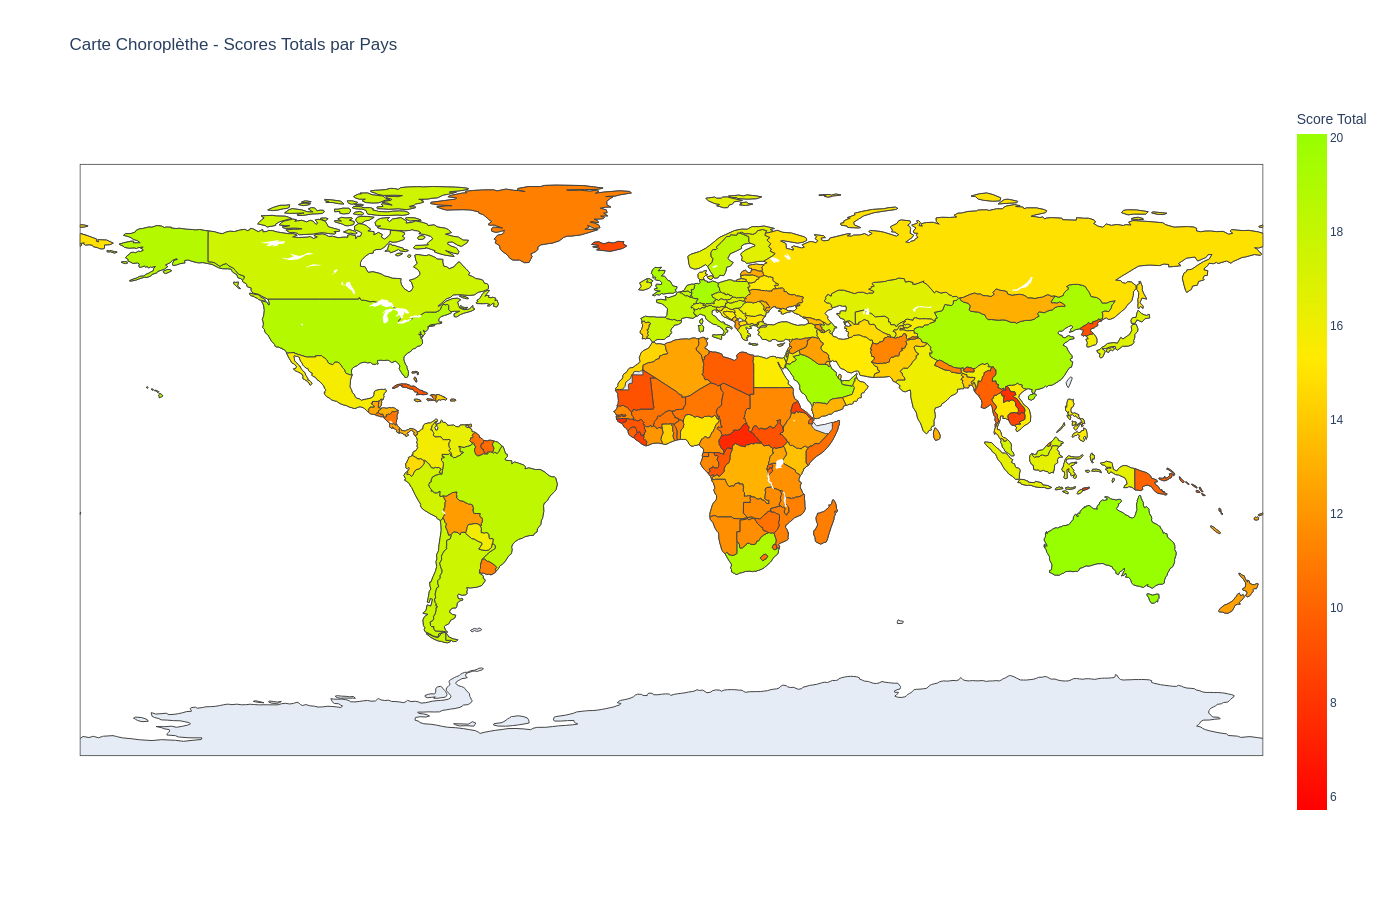

In [581]:
#utiliser la palette de couleurs 'turbo' intégrée avec la plage spécifique
color_scale = px.colors.sequential.Rainbow[::-1]  # Inverser l'échelle de couleur et utiliser la plage complète
color_scale = color_scale[int(0 * len(color_scale)):int((1-0.47) * len(color_scale))]  # Sélectionner la plage spécifique

#créer la carte choroplèthe avec la nouvelle échelle de couleur
fig = px.choropleth(
    df_4indics_sorted,
    locations='Country Code',
    color='Total',
    hover_name='Country Name',
    hover_data=['Region', 'Income Group', 'Population', 'Technologie', 'Education', 'Perspectives'],
    color_continuous_scale=color_scale,  # Échelle de couleur 'turbo' avec plage spécifique
    title='Carte Choroplèthe - Scores Totals par Pays',
    labels={'Total': 'Score Total'}
)
#ajuster la taille de la carte en utilisant update_layout
fig.update_layout(width=1200, height=900)

# afficher la carte
fig.show()


In [582]:
import plotly.express as px
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

#créer l'application Dash
app = dash.Dash(__name__)

#utiliser la palette de couleurs 'turbo' intégrée
color_scale = px.colors.sequential.Turbo[::-1]  #inverser l'échelle de couleur
color_scale = color_scale[int(0 * len(color_scale)):int((1-0.37) * len(color_scale))]  #sélectionner la plage spécifique


#définir les options de la liste déroulante
region_options = [{'label': region, 'value': region} for region in df_4indics_sorted['Region'].unique()]

#ajouter l'option "Monde entier"
region_options.append({'label': 'Monde entier', 'value': 'Tous'})

#définir la mise en page de l'application Dash
app.layout = html.Div([
    dcc.Dropdown(
        id='region-dropdown',
        options=region_options,
        value='Europe & Central Asia',  #valeur par défaut
        multi=False,  #sélection unique
        style={'width': '50%'}
    ),
    dcc.Graph(id='choropleth-map')
])

#définir la fonction de mise à jour du graphique en fonction de la région sélectionnée
@app.callback(
    Output('choropleth-map', 'figure'),
    [Input('region-dropdown', 'value')]
)
def update_choropleth(selected_region):
    #filtrer le DataFrame en fonction de la région sélectionnée
    if selected_region == 'Tous':
        filtered_df = df_4indics_sorted
    else:
        filtered_df = df_4indics_sorted[df_4indics_sorted['Region'] == selected_region]

    #créer la carte choroplèthe avec la nouvelle échelle de couleur
    fig = px.choropleth(
        filtered_df,
        locations='Country Code',
        color='Total',
        hover_name='Country Name',
        hover_data=['Region', 'Income Group', 'Population', 'Technologie', 'Education', 'Perspectives'],
        color_continuous_scale=color_scale,  # Échelle de couleur 'turbo'
        title=f'Carte Choroplèthe - Scores Totals par Pays ({selected_region})',
        labels={'Total': 'Score Total'}
    )

    #ajuster la taille de la carte en utilisant update_layout
    fig.update_layout(width=1200, height=900)

    return fig

#lancer l'application Dash
if __name__ == '__main__':
    app.run_server(debug=True)


In [583]:
!pip freeze


ansi2html==1.9.1
anyio @ file:///work/ci_py311/anyio_1676823771847/work/dist
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///work/ci_py311/argon2-cffi-bindings_1676823553406/work
arrow==1.3.0
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
async-lru @ file:///croot/async-lru_1699554519285/work
attrs @ file:///croot/attrs_1695717823297/work
Babel @ file:///work/ci_py311/babel_1676825020543/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
beautifulsoup4 @ file:///croot/beautifulsoup4-split_1681493039619/work
bleach @ file:///opt/conda/conda-bld/bleach_1641577558959/work
blinker==1.7.0
Brotli @ file:///work/ci_py311/brotli-split_1676830125088/work
certifi @ file:///croot/certifi_1700501669400/work/certifi
cffi @ file:///croot/cffi_1700254295673/work
charset-normalizer @ file:///tmp/build/80754af9/charset-normalizer_1630003229654/work
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
comm @ file

In [584]:
import plotly.express as px
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

#créer l'application Dash
app = dash.Dash(__name__)

#utiliser la palette de couleurs 'turbo' intégrée
color_scale = px.colors.sequential.Turbo[::-1]  # Inverser l'échelle de couleur
color_scale = color_scale[int(0 * len(color_scale)):int((1-0.37) * len(color_scale))]  # Sélectionner la plage spécifique

#définir la mise en page de l'application Dash
app.layout = html.Div([
    #sélecteur pour la région
    dcc.Dropdown(
        id='region-dropdown',
        options=[
            {'label': region, 'value': region} for region in df_4indics_sorted['Region'].unique()
        ] + [{'label': 'Monde entier', 'value': 'Tous'}],  #ajouter l'option 'Monde entier'
        value='Tous',  #modifier la valeur par défaut à 'Tous'
        multi=False,  #sélection unique
        style={'width': '50%'}
    ),
    #sélecteur pour la catégorie de revenu (Income Group)
    dcc.Dropdown(
        id='income-group-dropdown',
        options=[
            {'label': income_group, 'value': income_group} for income_group in df_4indics_sorted['Income Group'].unique()
        ] + [{'label': 'Toutes les catégories', 'value': 'Toutes'}],  #ajouter l'option 'Toutes les catégories'
        value='Toutes',  #modifier la valeur par défaut à 'Toutes'
        multi=False,  #sélection unique
        style={'width': '50%'}
    ),
    dcc.Graph(id='choropleth-map')
])

#définir la fonction de mise à jour du graphique en fonction de la région et de la catégorie de revenu sélectionnées
@app.callback(
    Output('choropleth-map', 'figure'),
    [Input('region-dropdown', 'value'),
     Input('income-group-dropdown', 'value')]
)
def update_choropleth(selected_region, selected_income_group):
    #filtrer le DataFrame en fonction de la région et de la catégorie de revenu sélectionnées
    if selected_region == 'Tous' and selected_income_group == 'Toutes':
        filtered_df = df_4indics_sorted
    elif selected_region == 'Tous':
        filtered_df = df_4indics_sorted[df_4indics_sorted['Income Group'] == selected_income_group]
    elif selected_income_group == 'Toutes':
        filtered_df = df_4indics_sorted[df_4indics_sorted['Region'] == selected_region]
    else:
        filtered_df = df_4indics_sorted[(df_4indics_sorted['Region'] == selected_region) & (df_4indics_sorted['Income Group'] == selected_income_group)]

    #créer la carte choroplèthe avec la nouvelle échelle de couleur
    fig = px.choropleth(
        filtered_df,
        locations='Country Code',
        color='Total',
        hover_name='Country Name',
        hover_data=['Region', 'Income Group', 'Population', 'Technologie', 'Education', 'Perspectives'],
        color_continuous_scale=color_scale,  # Échelle de couleur 'turbo'
        title=f'Carte Choroplèthe - Scores Totals par Pays ({selected_region}, {selected_income_group})',
        labels={'Total': 'Score Total'}
    )

    #ajuster la taille de la carte en utilisant update_layout
    fig.update_layout(width=1000, height=700)

    return fig

#lancer l'application Dash
if __name__ == '__main__':
    app.run_server(debug=True)
